# Manuscript Analyses and Plots

In [74]:
import pandas as pd
import numpy as np

In [75]:
# updated 5 May 2023
#matplotlib
import matplotlib.animation as animation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.patches import Rectangle
from matplotlib.pyplot import *
import matplotlib.ticker as ticker

#matplotlib ~aesthetics~ updated 4 March 2024
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['font.weight'] = 'normal'
plt.rcParams['figure.figsize'] = [20, 12]
np.set_printoptions(suppress=True)
plt.rcParams["savefig.facecolor"]= '#FFFFFF'
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['font.size']= 24

# Set math text font to Arial
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['mathtext.it'] = 'Arial:italic'
mpl.rcParams['mathtext.bf'] = 'Arial:bold'

# Set global rcParams for tick linewidths
mpl.rcParams['xtick.major.width'] = 1  # x-axis major ticks
mpl.rcParams['ytick.major.width'] = 1  # y-axis major ticks

mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.major.size'] = 10

In [76]:
from rx_burn_datetime_index_config import *

# Functions

In [77]:
# Linear regression with no constant, 95% CI
import statsmodels.api as sm
from scipy import stats

def linReg95(X,Y):
    mask = ~np.isnan(X) & ~np.isnan(Y)
    X = X[mask]
    Y = Y[mask]
    model = sm.OLS(Y,X)
    r = model.fit()
    
    m = r.params[0]
    r2 = r.rsquared

    m_u = r.conf_int().values[0,0]
    m_l = r.conf_int().values[0,1]
    
    return m,m_l,m_u,r2,r

def OLSconstCI(X,Y):
    mask = ~np.isnan(X) & ~np.isnan(Y) #& (X < 5) & (X > 0) & (Y < 5) & (Y > 0)
    X = X[mask]
    Y = Y[mask]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    r = model.fit()
    
    s = r.params[1]
    b = r.params[0]
    r2 = r.rsquared
    #s_u = r.conf_int().values[1,0]
    #s_l = r.conf_int().values[1,1]
    #b_u = r.conf_int().values[0,0]
    #b_l = r.conf_int().values[0,1]
    
    return s,b,r2,r

# Pearson correlation coefficient
def pearson(X,Y):
    mask = ~np.isnan(X) & ~np.isnan(Y)
    X = X[mask]
    Y = Y[mask]
    p = stats.pearsonr(X,Y)
    return p[0]

In [78]:
# colors
a1c = '#FF1493'
a2c = '#CD5C5C'
a3c = '#663399'
a4c = '#006400'

co = '#0000CD'
co2 = '#DC143C'
uv = '#FF4500'
BC6 = '#000080'
abcd = '#2E8B57'
mce = '#4B0082'

brc = '#8B4513'

aerial = '#8A2BE2'

# Import Data

In [79]:
# Full aethalometer data
fname = '/Users/jdabutler/Documents/+github/rx burn/aligned CSV/'
AE33hz = pd.read_csv(fname+'ground_AE33_1Hz_align.csv')
AE33hz['datetime'] = pd.to_datetime(AE33hz['datetime'])

cols = ['datetime','BB(%)','Status','BC1','BC2','BC6']

#drop data where AE33 not sampling
AE33 = AE33hz.loc[AE33hz.Status.isin([0,128]),cols]

# convert from ng/m3 to ug/m3
ng2ug = 1000
AE33['BC1'] = AE33['BC1'] / ng2ug
AE33['BC2'] = AE33['BC2'] / ng2ug
AE33['BC6'] = AE33['BC6'] / ng2ug

AE33.set_index('datetime',inplace=True)

<AxesSubplot:xlabel='datetime'>

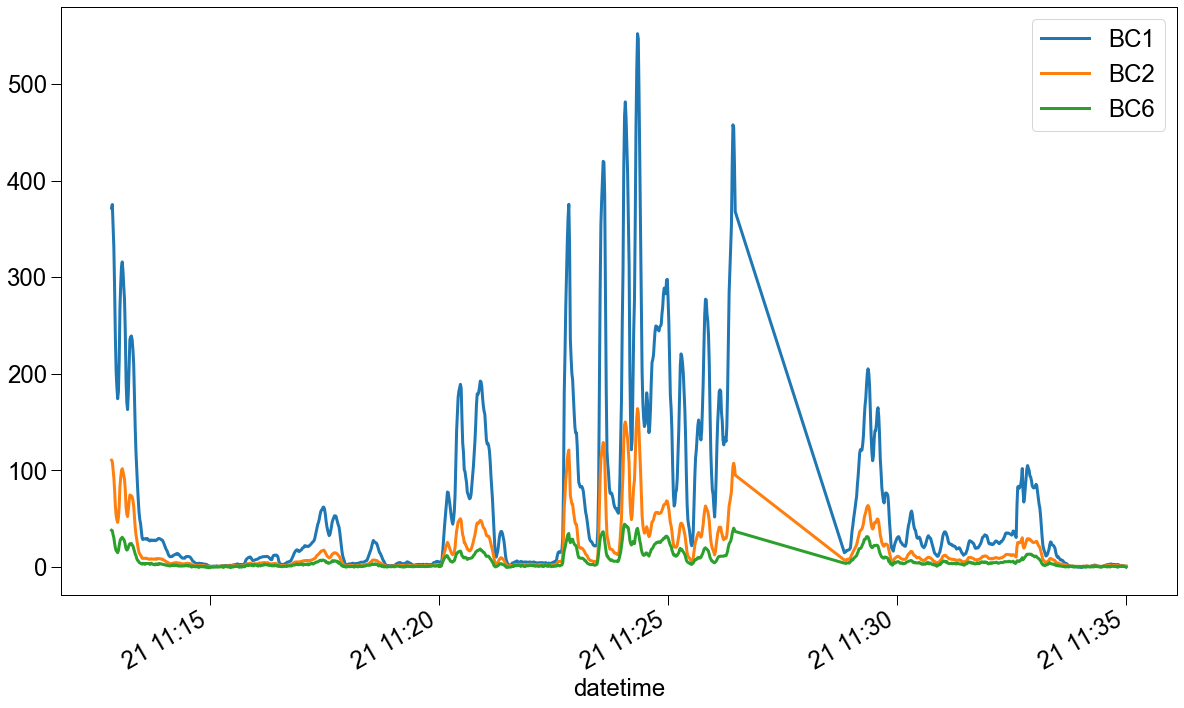

In [80]:
fig,ax=plt.subplots()

AE33.loc[d2S:d2b].plot(ax=ax,y=['BC1','BC2','BC6'])

In [81]:
# aligned gas and ground BC data
data = pd.read_csv('/Users/jdabutler/Documents/+github/rx burn/aligned CSV/' +'aligned_1Hz_gas&BC_06-18-2024.csv')
data['datetime'] = pd.to_datetime(data.datetime)
data.tail()

# minutely MCE
MCE_T = pd.read_csv(fname+'MCE_integrated_minutely.csv')
MCE_T['datetime'] = pd.to_datetime(MCE_T['datetime'])
MCE_T.set_index('datetime',inplace=True)

# sampling location start and end times
dfS = pd.read_csv('/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_field data/sampling_locs_times.csv')
dfS['start time'] = pd.to_datetime(dfS['start time'])
dfS['end time'] = pd.to_datetime(dfS['end time'])

# drone emission factors
drone_raw = pd.read_csv('/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_EF datasets/droneEFs.csv')

# convert datetimes to proper dtype
drone_raw['start'] = pd.to_datetime(drone_raw['start'])
drone_raw['ending'] = pd.to_datetime(drone_raw['ending'])

drone = drone_raw[['MCE (UCR)','BC_EF','flight_time']].rename({'MCE (UCR)':'MCE'},axis=1)

# drone emission factors
drone_raw = pd.read_csv('/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_EF datasets/droneEFs.csv')

# convert datetimes to proper dtype
drone_raw['start'] = pd.to_datetime(drone_raw['start'])
drone_raw['ending'] = pd.to_datetime(drone_raw['ending'])

drone = drone_raw[['MCE (UCR)','BC_EF','flight_time']].rename({'MCE (UCR)':'MCE'},axis=1)

# AAE dataset at 1 Hz
AAE_raw = pd.read_csv('/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/AAE datasets/AAE_1Hz.csv')

# convert to datetime dtype
AAE_raw['datetime'] = pd.to_datetime(AAE_raw['datetime'])

AAEdt = AAE_raw.set_index('datetime')

#drop during background samples
#AAE.drop(AAE[d1E:d2b].index,inplace=True)
AAEdt.drop(AAEdt[d2E:d3b].index,inplace=True)
AAEdt.drop(AAEdt[d3e:d4b1].index,inplace=True)

# Brown Carbon calculation

In [82]:
AE33['BrC1'] = AE33['BC1'] - AE33['BC6']
AE33['BrC2'] = AE33['BC2'] - AE33['BC6']

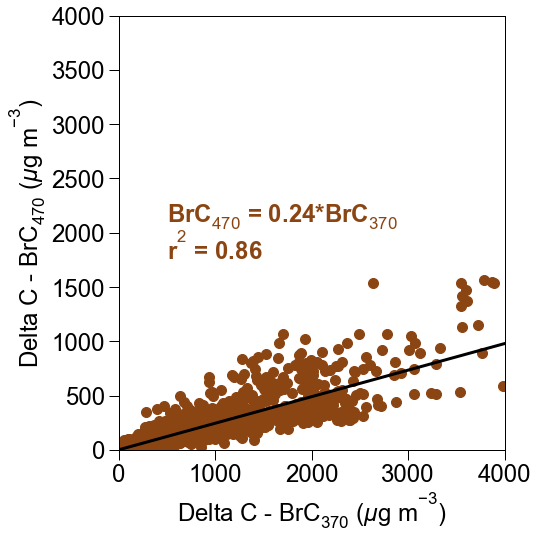

In [83]:
m,m_l,m_u,r2,r = linReg95(AE33.BrC1,AE33.BrC2)

fig,ax = plt.subplots(figsize=(8,8))

ax.plot(AE33.BrC1,AE33.BrC2,'o',color= '#8B4513')

x = np.array([0,4000])
ax.plot(x,x*m,'-',color='k')

ax.set_xlim([0,4000])
ax.set_ylim([0,4000])

ax.annotate('BrC$_{{470}}$ = {:.2f}*BrC$_{{370}}$'.format(m),(500,2100),fontweight='bold',color= '#8B4513') 
ax.annotate('r$^2$ = {:.2f}'.format(r2),(500,1750),fontweight='bold',color= '#8B4513') 
ax.set_xlabel('Delta C - BrC$_{{370}}$ ($\mu$g m$^{-3}$)')
ax.set_ylabel('Delta C - BrC$_{{470}}$ ($\mu$g m$^{-3}$)')


manuPath = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
fig.tight_layout()
#fig.savefig(manuPath+'BrC_by_DeltaC_compare.png')

# AAE Final Data Manipulation

In [84]:
# constants
wl = [370,470,520,590,660,880,950] #wavelengths of AE33
macs = [18.47,14.54,13.14,11.58,10.35,7.77,7.19] #mass absorption cross section
log_wl = np.log(wl)

# create absoprtion dataframe
dfB = AAEdt[['b_370', 'b_470', 'b_520', 'b_590', 'b_660', 'b_880', 'b_950','AAE_7pt']]
cols_to_check = ['b_370', 'b_470', 'b_520', 'b_590', 'b_660', 'b_880', 'b_950']
dfB = dfB[(dfB[cols_to_check] > 0).all(axis=1)]
dfB = dfB.dropna()

dfB.columns

Index(['b_370', 'b_470', 'b_520', 'b_590', 'b_660', 'b_880', 'b_950',
       'AAE_7pt'],
      dtype='object')

## AAE 6 and 7 wavelength

In [85]:
# define linear regression function to calculate AAE
def AAE(b_abs,wl):
    
    log_wl = np.log(wl)
    log_b = np.log(b_abs)
        
    log_wl = sm.add_constant(log_wl)

    model = sm.OLS(log_b,log_wl)
    r = model.fit()
    
    m = r.params[1]
    b = r.params[0]
    r2 = r.rsquared
    mu = r.conf_int().values[1,0]
    ml = r.conf_int().values[1,1]
    AAE = -m
    AAE_u = -mu
    AAE_l = -ml
    
    return AAE

In [86]:
wl2 = [470,520,590,660,880,950]

dfB['AAE_6pt'] = dfB[['b_' + str(wl2[i]) for i in range(6)]].apply(AAE,axis=1,wl=wl2)
dfB

b_370       b_470       b_520       b_590  \
datetime                                                              
2021-04-20 12:02:51  7697982.01  5944460.90  4975185.06  4258822.92   
2021-04-20 12:02:52  7405601.91  5800282.26  4855821.30  4146439.02   
2021-04-20 12:02:53  7069946.60  5548376.76  4637211.12  3955044.78   
2021-04-20 12:02:54  6596671.32  5225559.68  4380876.00  3736993.38   
2021-04-20 12:02:55  6240237.26  5024137.06  4231973.52  3626242.26   
...                         ...         ...         ...         ...   
2021-04-23 15:13:03    73178.14    44056.20    29683.26    16038.30   
2021-04-23 15:13:04    98352.75    48694.46    28408.68    22407.30   
2021-04-23 15:13:05   126297.86    54946.66    39472.56    27722.52   
2021-04-23 15:13:06   193085.38    64092.32    38868.12    30409.08   
2021-04-23 15:13:07   224779.90    71667.66    40628.88    31810.26   

                          b_660       b_880       b_950   AAE_7pt   AAE_6pt  
datetime                                                                     
2021-04-20 12:02:51  3546023.85  2431334.01  2283500.86  1.331570  1.360842  
2021-04-20 12:02:52  3450565.80  2357829.81  2204274.25  1.332237  1.374952  
2021-04-20 12:02:53  3277782.90  2235195.90  2087882.53  1.342761  1.389094  
2021-04-20 12:02:54  3107142.45  2128987.77  1988056.57  1.322486  1.373203  
2021-04-20 12:02:55  3019767.75  2069593.89  1938970.44  1.295165  1.356856  
...                         ...         ...         ...       ...       ...  
2021-04-23 15:13:03    16466.85     9564.87    12719.11  2.039253  1.793771  
2021-04-23 15:13:04    11529.90    14001.54     8527.34  2.392887  2.036148  
2021-04-23 15:13:05    16332.30    13721.82    14566.94  2.308082  1.897014  
2021-04-23 15:13:06    21196.80    14320.11    13049.85  2.686531  2.107202  
2021-04-23 15:13:07    23525.55    18850.02    16249.40  2.537743  1.830913  

[45500 rows x 9 columns]

In [87]:
# calculate two point AAEs
dfB['AAE_470-880'] = - np.log(dfB['b_470']/dfB['b_880']) / np.log(wl[1]/wl[5])
dfB['AAE_370-880'] = - np.log(dfB['b_370']/dfB['b_880']) / np.log(wl[0]/wl[5])
dfB['AAE_880-950'] = - np.log(dfB['b_880']/dfB['b_950']) / np.log(wl[5]/wl[6]) # BC AAE
dfB['AAE_370-470'] = - np.log(dfB['b_370']/dfB['b_470']) / np.log(wl[0]/wl[1]) # BrC AAE
dfB['AAE_470-660'] = - np.log(dfB['b_470']/dfB['b_660']) / np.log(wl[1]/wl[4])

dfB['WDA'] = dfB['AAE_370-880'] - dfB['AAE_880-950']
dfB['BC_AAE'] = dfB['AAE_880-950']+dfB['WDA']

#minutely absorption dataframe
dfBmin = dfB.resample('1T').mean()
dfBmin['Count'] = dfB[['b_880']].resample('1T').count()
# 90% observations per minute threshold
threshold = 54 # 54/60 is 90%
dfBmin = dfBmin.loc[dfBmin['Count']>54]

# calculate two point AAEs after minutely average absorption data
dfBmin['AAE_470-880'] = - np.log(dfBmin['b_470']/dfBmin['b_880']) / np.log(wl[1]/wl[5])
dfBmin['AAE_370-880'] = - np.log(dfBmin['b_370']/dfBmin['b_880']) / np.log(wl[0]/wl[5])
dfBmin['AAE_880-950'] = - np.log(dfBmin['b_880']/dfBmin['b_950']) / np.log(wl[5]/wl[6]) # BC AAE
dfBmin['AAE_370-470'] = - np.log(dfBmin['b_370']/dfBmin['b_470']) / np.log(wl[0]/wl[1]) # BrC AAE
dfBmin['AAE_470-660'] = - np.log(dfBmin['b_470']/dfBmin['b_660']) / np.log(wl[1]/wl[4])

dfBmin['WDA'] = dfBmin['AAE_370-880'] - dfBmin['AAE_880-950']
dfBmin['BC_AAE'] = dfBmin['AAE_880-950']+dfBmin['WDA']

wl = [370,470,520,590,660,880,950] #wavelengths of AE33
wl2 = wl2 = [470,520,590,660,880,950]
dfBmin['AAE_7pt'] = dfBmin[['b_'+str(wl[i]) for i in range(7)]].apply(AAE,axis=1,wl=wl)
dfBmin['AAE_6pt'] = dfBmin[['b_' + str(wl2[i]) for i in range(6)]].apply(AAE,axis=1,wl=wl2)

In [88]:
path = '/Users/jdabutler/Documents/+github/rx burn/AAE datasets/'
dfB.to_csv(path + 'AAE_1Hz_2025-02-24_test.csv') # 1 Hz AAEs calculated, fitler with data threshold applied, then resampled
#dfBmin.reset_index().to_csv(path + 'AAE_1min_2025-02-25.csv') #filter with data threshold applied to 1 Hz absorption data, resampled, then AAEs calculated

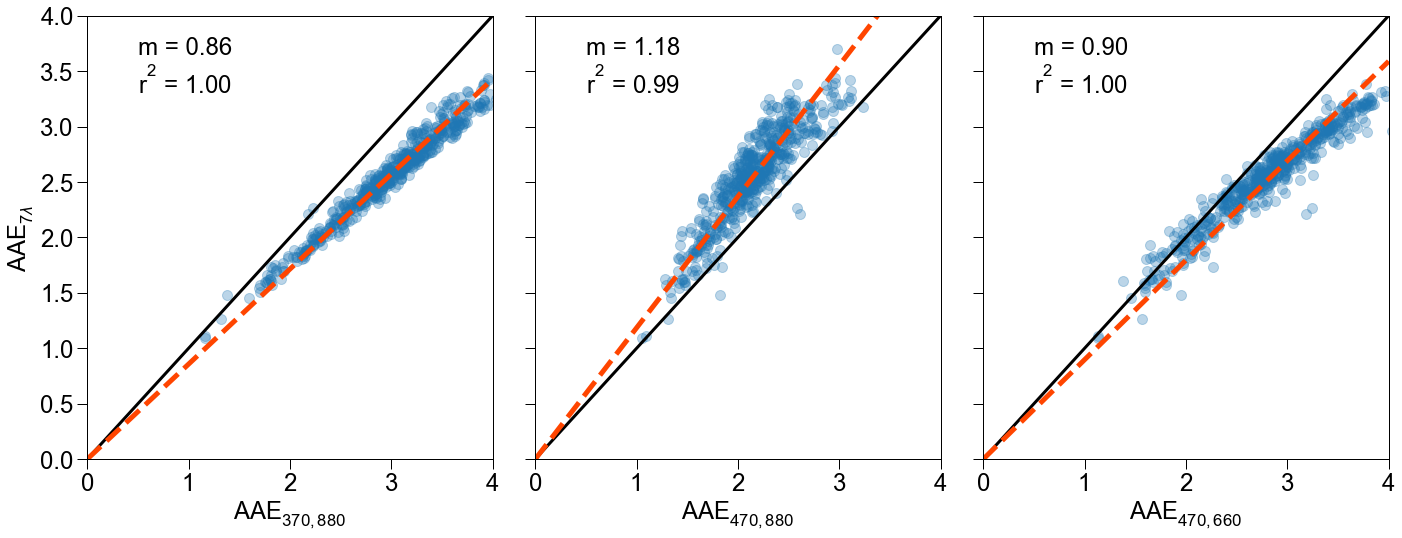

In [89]:
fig,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(20,8))

al = 0.3
ax[0].plot(dfBmin['AAE_370-880'],dfBmin['AAE_7pt'],'o',alpha = al)
ax[1].plot(dfBmin['AAE_470-880'],dfBmin['AAE_7pt'],'o',alpha = al)
ax[2].plot(dfBmin['AAE_470-660'],dfBmin['AAE_7pt'],'o',alpha = al)

ax[0].set_xlim([0,4])
ax[0].set_ylim([0,4])

xlabels = ['AAE$_{370,880}$','AAE$_{470,880}$','AAE$_{470,660}$']
cols = ['AAE_370-880','AAE_470-880','AAE_470-660']
x = np.arange(0,4.5,0.5)

for i in np.arange(3):
    ax[i].plot([0,4],[0,4],'-k')
    ax[i].set_xlabel(xlabels[i])
    m,m_l,m_u,r2,r = linReg95(dfBmin[cols[i]],dfBmin['AAE_7pt'])
    ax[i].plot(x,x*m,'--',color = '#FF4500',lw=5)
    ax[i].annotate('m = {:.2f}\nr$^2$ = {:.2f}'.format(m,r2),xy=(0.5,3.3))

ax[0].set_ylabel('AAE$_{{7\lambda}}$')
fig.tight_layout()

manuPath = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(manuPath + 'AAE_compare.png')

(0.0, 6.0)

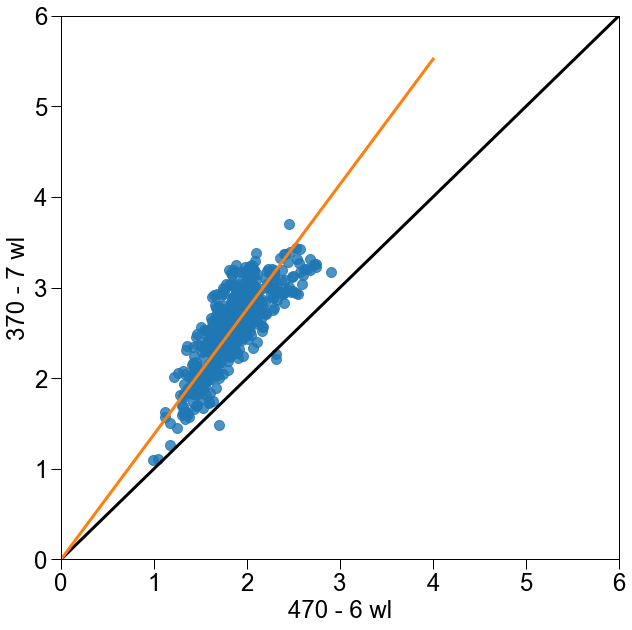

In [90]:
fig,ax = plt.subplots(figsize=(10,10))

ax.plot(dfBmin['AAE_6pt'],dfBmin['AAE_7pt'],'o',alpha=0.8)
ax.plot([0,6],[0,6],'-k')

m,m_l,m_u,r2,r = linReg95(dfBmin['AAE_6pt'],dfBmin['AAE_7pt'])
x = np.arange(5)
y = x*m
plot(x,y)

ax.set_xlabel('470 - 6 wl')
ax.set_ylabel('370 - 7 wl')

ax.set_xlim([0,6])
ax.set_ylim([0,6])

(0.0, 6.0)

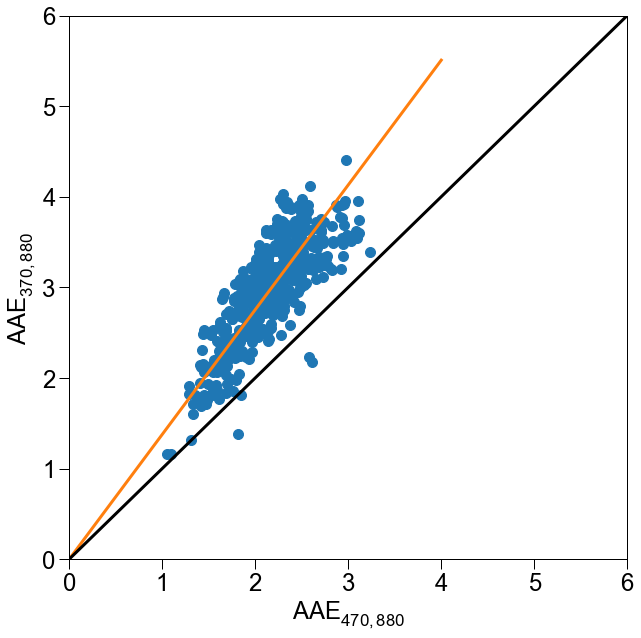

In [91]:
fig,ax = plt.subplots(figsize=(10,10))

ax.plot(dfBmin['AAE_470-880'],dfBmin['AAE_370-880'],'o')
m,m_l,m_u,r2,r = linReg95(dfBmin['AAE_470-880'],dfBmin['AAE_370-880'])
x = np.arange(5)
y = x*m
plot(x,y)

ax.plot([0,6],[0,6],'-k')

ax.set_ylabel('AAE$_{370,880}$')
ax.set_xlabel('AAE$_{470,880}$')

ax.set_xlim([0,6])
ax.set_ylim([0,6])

In [92]:
#AAE above 1.5
filt = dfB['AAE_7pt']>1.5
len(dfB.loc[filt])/len(dfB)

0.9428571428571428

# EF and AAE Literature Excel to CSV 

In [93]:
# Define the path to your Excel file and the sheet name
excel_file_path = '/Users/jdabutler/Documents/+github/rx burn/literature emission factors/BC_literature_EFs_fromSERAothers.xlsx'

sheet_name = ['EF compare','AAE','Andreae 2019']
# Read the specific sheet from the Excel file

for s in sheet_name:
    print(s)

    df = pd.read_excel(excel_file_path, sheet_name=s)
    
    # Export the DataFrame to a CSV file
    csv_file_path = '/Users/jdabutler/Documents/+github/rx burn/literature emission factors/'
    df.to_csv(csv_file_path + s + '.csv', index=False)

    print(f"Sheet '{s}' from '{excel_file_path}' has been exported to '{csv_file_path}' successfully.")

EF compare
Sheet 'EF compare' from '/Users/jdabutler/Documents/+github/rx burn/literature emission factors/BC_literature_EFs_fromSERAothers.xlsx' has been exported to '/Users/jdabutler/Documents/+github/rx burn/literature emission factors/' successfully.
AAE
Sheet 'AAE' from '/Users/jdabutler/Documents/+github/rx burn/literature emission factors/BC_literature_EFs_fromSERAothers.xlsx' has been exported to '/Users/jdabutler/Documents/+github/rx burn/literature emission factors/' successfully.
Andreae 2019
Sheet 'Andreae 2019' from '/Users/jdabutler/Documents/+github/rx burn/literature emission factors/BC_literature_EFs_fromSERAothers.xlsx' has been exported to '/Users/jdabutler/Documents/+github/rx burn/literature emission factors/' successfully.


In [94]:
BClit = pd.read_csv(csv_file_path+sheet_name[0]+'.csv')
AAElit = pd.read_csv(csv_file_path+sheet_name[1]+'.csv')
dfBB = df

# SI Timeseries

In [95]:
to_drop = [pd.to_datetime('2021-04-22 10:42:00'),pd.to_datetime('2021-04-23 10:12:00'),pd.to_datetime('2021-04-23 10:42:00'),pd.to_datetime('2021-04-23 11:12:00')]

# Preliminary timeseries plots for each day
cols = ['datetime','CO_e','CO2H_e','BC1','BC6','Status','ATN','BC']
dfP = data[cols].copy()
dfP.loc[:,'BrC_3'] = dfP.loc[:,'BC1'] - dfP.loc[:,'BC6']
dfP.head()

datetime  CO_e  CO2H_e  BC1  BC6  Status      ATN        BC  \
0 2021-04-20 11:58:01   NaN     NaN  0.0  0.0     3.0      NaN       NaN   
1 2021-04-20 11:58:02   NaN     NaN  0.0  0.0     1.0      NaN       NaN   
2 2021-04-20 11:58:09   NaN     NaN  0.0  0.0     1.0  4.79926  2323.693   
3 2021-04-20 11:58:10   NaN     NaN  0.0  0.0     1.0  5.74995  3132.078   
4 2021-04-20 11:58:11   NaN     NaN  0.0  0.0     1.0  7.35173  5347.295   

   BrC_3  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

In [96]:
def getDailyDf(df):
    if not isinstance(df.index, pd.DatetimeIndex) and 'datetime' in df.columns:
        df = df.set_index('datetime')
    elif not (isinstance(df.index,pd.DatetimeIndex)) & ('datetime' not in df.columns):
        print('Datetime not set as index or a column name')
        return
    
    d1 = df.loc[d1be:d1E]
    d2 = df.loc[d2b:d2E]
    d3 = df.loc[d3b:d3e]
    d4 = df.loc[d4b1:d4e]
    
    return d1,d2,d3,d4

In [97]:
# minutely dataframe of aligend gas and BC data
temp = dfP.loc[dfP.Status.isin([0,128])]
dfPmin = temp.set_index('datetime').resample('1T').mean()
#dfPmin.dropna(how='all',inplace=True)

# apply compensation parameter to ABCD BC data
a = 0.5
dfPmin['BC_a'] = dfPmin['BC'] / ((a*np.exp(-dfPmin.ATN/100))+(1-a)) # minutely AAP applied

#dfPmin['count_abcd'] = dfP.set_index('datetime')['BC'].resample('1T').count() # resample at 1 min and calculate count
dfPmin.loc[(dfPmin['BC_a']<-5),'BC_a']=np.nan # drop any ABCD measurement below -5 ug/m3 

## Plots

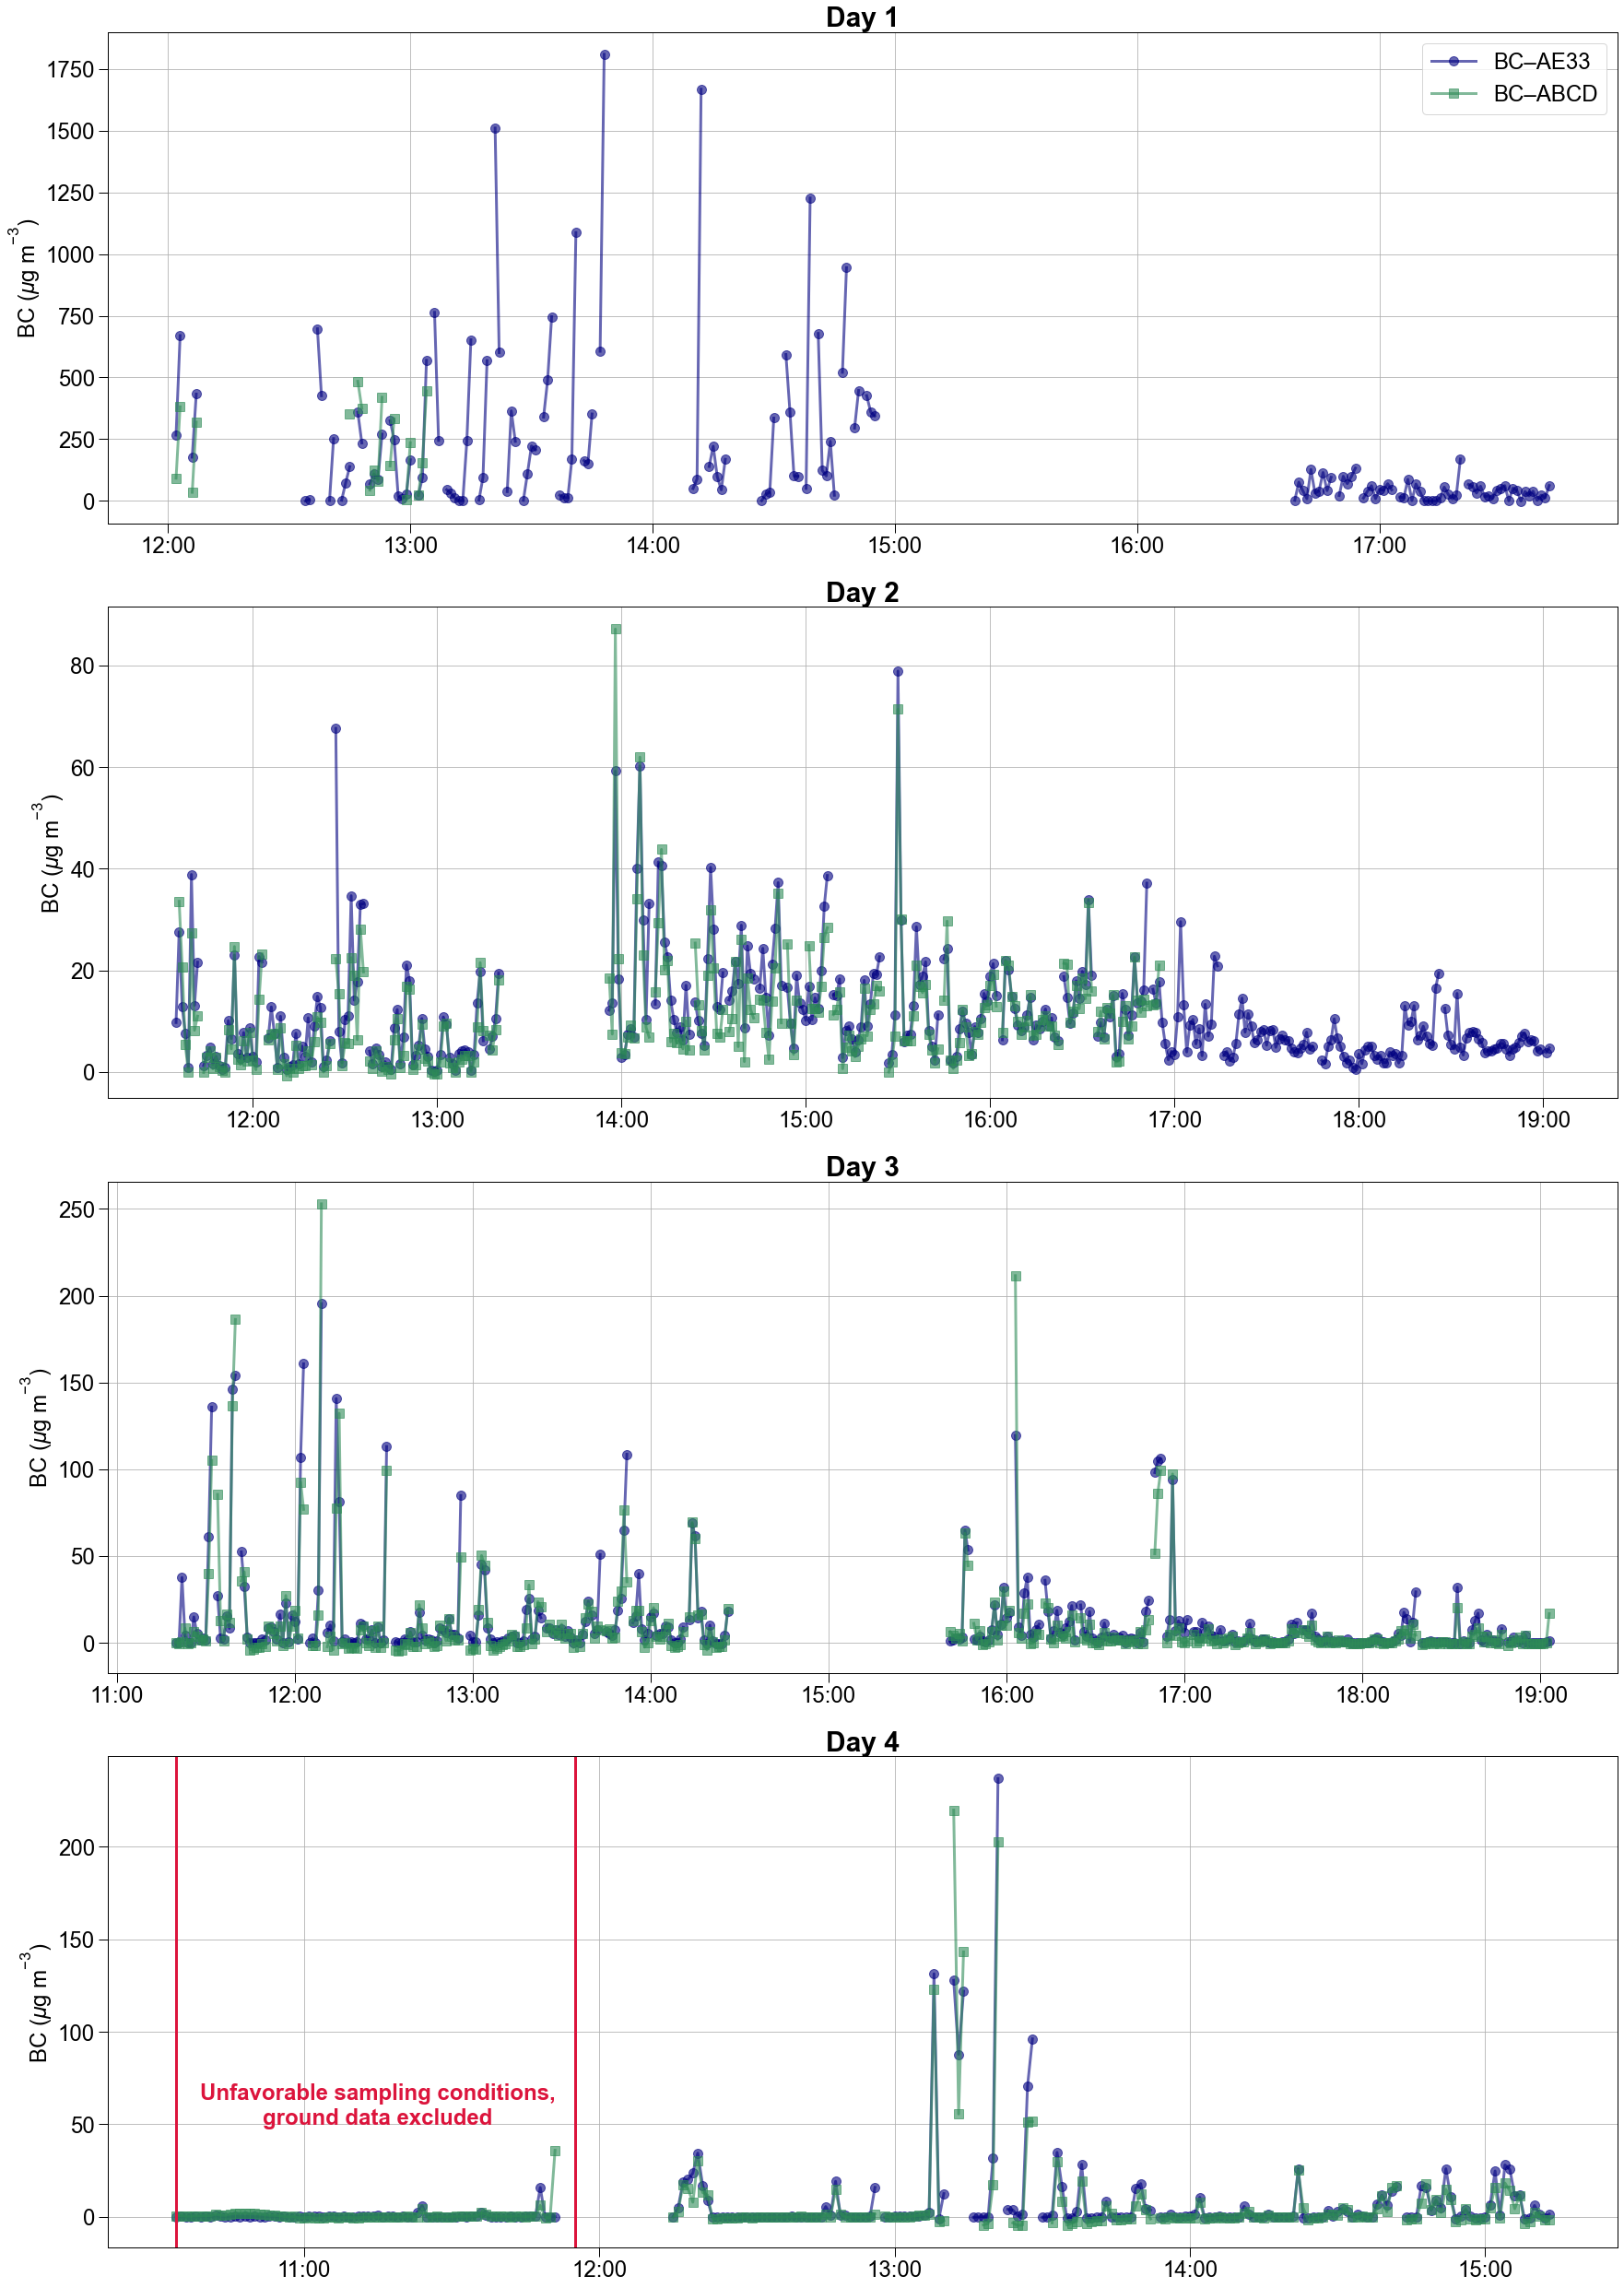

In [98]:
d1,d2,d3,d4 = getDailyDf(dfPmin)

timeFormat = DateFormatter('%H:%M')
fig,ax = plt.subplots(4,1,figsize=(25,35))

alpha = 0.6

ax[0].plot(d1['BC6'],'o-',color=BC6,alpha = alpha,label='BC–AE33')
ax[1].plot(d2['BC6'],'o-',color=BC6,alpha = alpha)
ax[2].plot(d3['BC6'],'o-',color=BC6,alpha = alpha)
ax[3].plot(d4['BC6'],'o-',color=BC6,alpha = alpha)

ax[0].plot(d1['BC_a'],'s-',color=abcd,alpha = alpha,label='BC–ABCD')
ax[1].plot(d2['BC_a'],'s-',color=abcd,alpha = alpha)
ax[2].plot(d3['BC_a'],'s-',color=abcd,alpha = alpha)
ax[3].plot(d4['BC_a'],'s-',color=abcd,alpha = alpha)

ax[0].legend()
#for i in [1,2,3]:
#    ax[i].set_ylim([-5,250])

for i in np.arange(4):
    ax[i].grid(True)
    ax[i].xaxis.set_major_formatter(timeFormat)
    ax[i].set_title('Day '+ str(i+1),fontsize=30,fontweight='bold') 
    ax[i].set_ylabel('BC ($\mu$g m$^{-3}$)')

## dropped sample
ax[3].axvline(dfS.loc[7,'start time'],color='#DC143C')
ax[3].axvline(dfS.loc[7,'end time'],color='#DC143C')
ax[3].annotate('Unfavorable sampling conditions,\nground data excluded',xy=(pd.to_datetime('2021-04-23 11:15:00'),50),
               fontsize = 24,fontweight='bold',color='#DC143C',ha='center')    
    

fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
fig.savefig(path+'BC TS.png')
#plt.close()

In [99]:
MCE_Tf = dfPmin.join(MCE_T['MCE'],on='datetime',how='left')
MCE_Tf.loc[np.isnan(MCE_Tf.Status),'MCE'] = np.nan

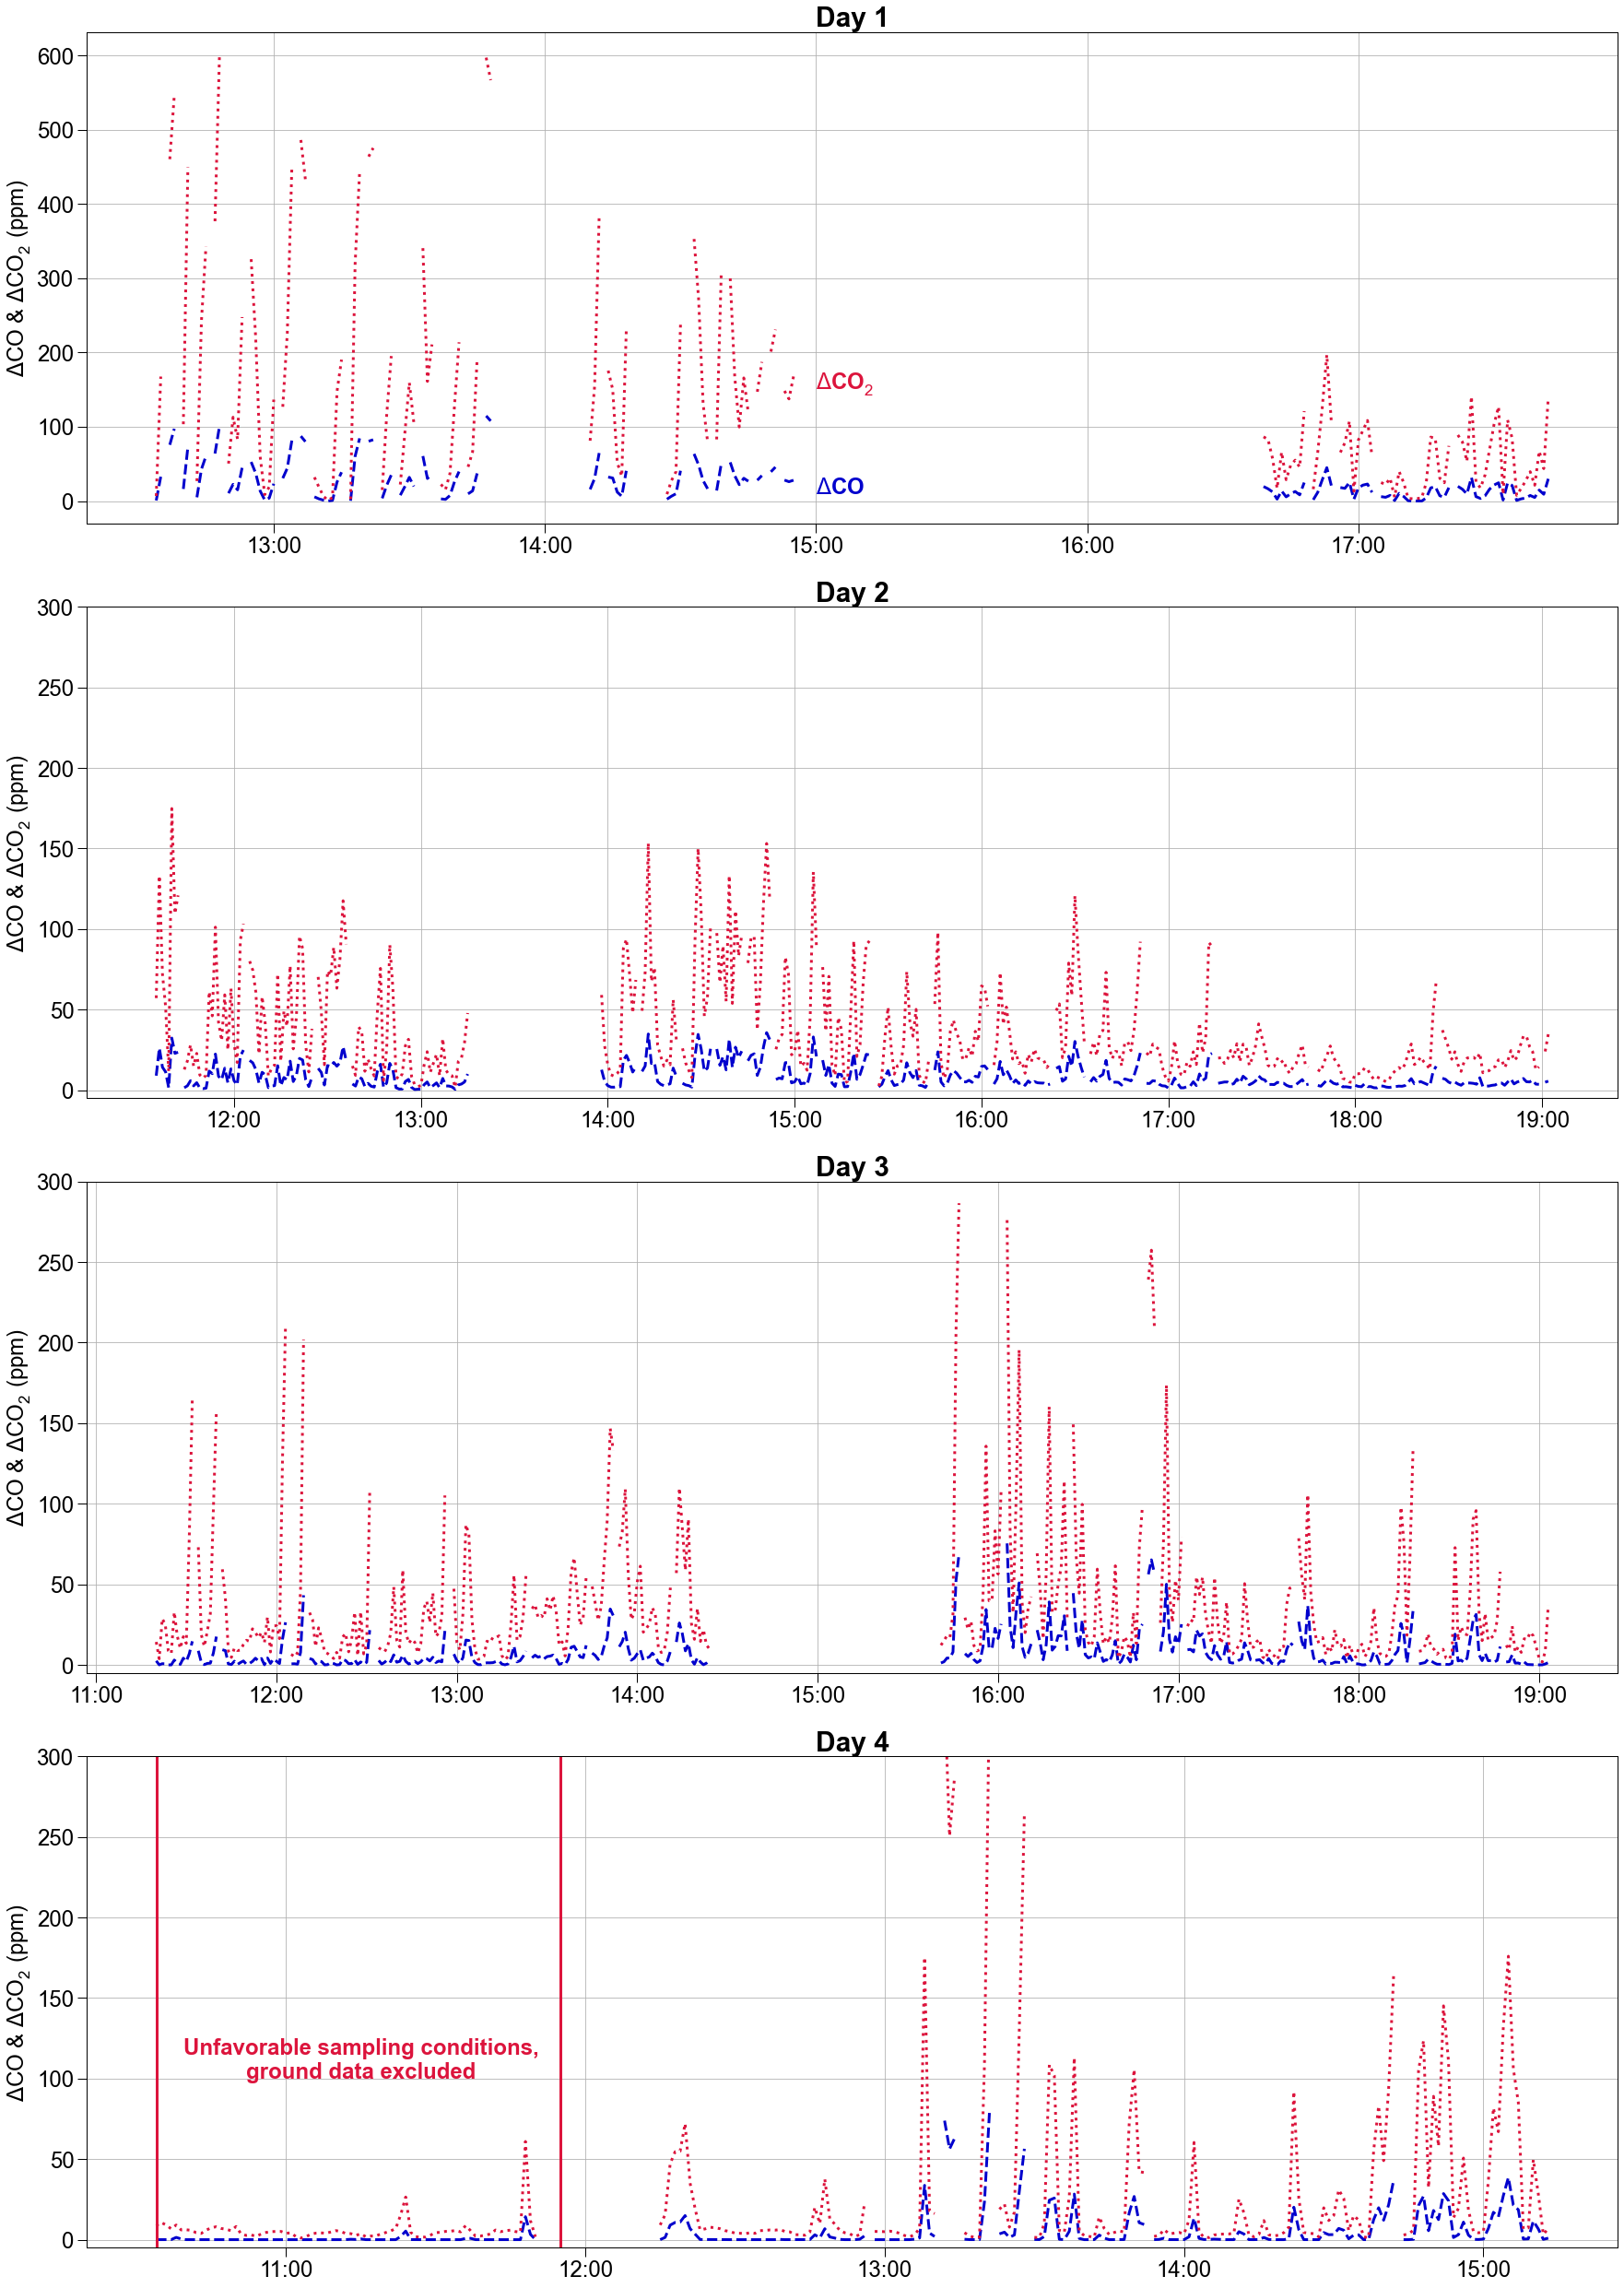

In [100]:
d1,d2,d3,d4 = getDailyDf(dfPmin)

timeFormat = DateFormatter('%H:%M')
fig,ax = plt.subplots(4,1,figsize=(25,35))

ax[0].plot(d1['CO_e'],'--',color=co,label='$\Delta$CO')
ax[1].plot(d2['CO_e'],'--',color=co)
ax[2].plot(d3['CO_e'],'--',color=co)
ax[3].plot(d4['CO_e'],'--',color=co)

ax[0].plot(d1['CO2H_e'],':',color=co2,label='$\Delta$CO$_2$')
ax[1].plot(d2['CO2H_e'],':',color=co2)
ax[2].plot(d3['CO2H_e'],':',color=co2)
ax[3].plot(d4['CO2H_e'],':',color=co2)

ax[0].annotate('$\Delta$CO',xy=(pd.to_datetime('04-20-21 15:00:00'),10),fontweight='bold',color=co)
ax[0].annotate('$\Delta$CO$_2$',xy=(pd.to_datetime('04-20-21 15:00:00'),150),fontweight='bold',color=co2)
#ax[0].annotate('MCE',xy=(pd.to_datetime('04-20-21 15:00:00'),420),fontweight='bold',color=mce)
#ax[3].axvspan(pd.to_datetime('2021-04-23 10:12:00'),pd.to_datetime('2021-04-23 11:42:00'),color='r',alpha=0.3)

# mc1,mc2,mc3,mc4 = getDailyDf(MCE_Tf)
# ax0 = ax[0].twinx()
# ax0.plot(mc1['MCE'],color=mce)
# ax0.set_ylabel('MCE',color=mce)

# ax1 = ax[1].twinx()
# ax1.plot(mc2['MCE'],color=mce)
# ax1.set_ylabel('MCE',color=mce)

# ax2 = ax[2].twinx()
# ax2.plot(mc3['MCE'],color=mce)
# ax2.set_ylabel('MCE',color=mce)

# ax3 = ax[3].twinx()
# ax3.plot(mc4['MCE'],color=mce)
# ax3.set_ylabel('MCE',color=mce)

# for axis in [ax0,ax1,ax2,ax3]:
#     axis.set_ylim([0.5,1.0])

for i in np.arange(4):
    ax[i].grid(True)
    ax[i].xaxis.set_major_formatter(timeFormat)
    ax[i].set_title('Day '+ str(i+1),fontsize=30,fontweight='bold') 
    ax[i].set_ylabel('$\Delta$CO & $\Delta$CO$_2$ (ppm)')
    
    
for i in [1,2,3]:
    ax[i].set_ylim([-5,300])
    
## dropped sample
ax[3].axvline(dfS.loc[7,'start time'],color='#DC143C')
ax[3].axvline(dfS.loc[7,'end time'],color='#DC143C')
ax[3].annotate('Unfavorable sampling conditions,\nground data excluded',xy=(pd.to_datetime('2021-04-23 11:15:00'),100),
               fontsize = 24,fontweight='bold',color='#DC143C',ha='center')
    
fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
fig.savefig(path+'Gases TS.png')

# Final Ground BC and BrC EFs

## AE33

In [101]:
df33 = dfP.loc[dfP.Status.isin([0,128]),['datetime','CO_e','CO2H_e','BC6','Status','BrC_3']] # sample only AE33 dataframe
df33dt = df33.set_index('datetime') # sample only AE33 dataframe with datetime index

#create minutely sampling dataframe
df33min = df33[['datetime','CO_e','CO2H_e','BC6']].set_index('datetime').resample('1T').mean()
df33min['BC6_count'] = df33[['datetime','BC6']].set_index('datetime').resample('1T').count()

#apply sample count per minute threshold
#ae33_thres = 50
#df33min = df33min.loc[(df33min.BC6_count>ae33_thres)&(df33min.BC6>0)]

# find times when AE33 changed Status for start and ends of sampling
dfP_dt = dfP.set_index('datetime')
status_change = dfP_dt.Status.shift() != dfP_dt.Status
change = dfP_dt.loc[status_change]
change = change[~np.isnan(change.Status)]
## replace 

# AE33 sampling start and end times
times0 = change.index[change.Status.isin([0,128])]
times1 = change.index[change.Status.isin([1,3,129,131])]

# drop Status changes during 
start_stat = [0.0,128.0]
for t in times1:
    idx = change.index.get_loc(t)
    
    if change.iloc[idx-1].Status not in start_stat:
        times1 = times1.drop(t)

In [102]:
df33dt.loc[(df33dt.CO2H_e < 2) &(df33dt.CO2H_e>0)]

CO_e  CO2H_e    BC6  Status   BrC_3
datetime                                                
2021-04-20 13:11:49  0.24     1.0 -0.274     0.0   2.573
2021-04-20 13:11:56  0.10     1.0  0.176     0.0   1.744
2021-04-20 13:11:57  0.10     1.0  0.607     0.0   1.259
2021-04-20 13:11:58  0.10     1.0 -0.249     0.0   1.953
2021-04-20 13:11:59  0.10     1.0  0.272     0.0   1.648
...                   ...     ...    ...     ...     ...
2021-04-23 14:37:50  0.01     1.0  0.409   128.0  -3.921
2021-04-23 14:37:51  0.01     1.0 -0.374   128.0  -2.862
2021-04-23 14:37:55  0.12     1.0  0.418   128.0  -3.630
2021-04-23 14:37:56  0.12     1.0  0.098   128.0  -2.573
2021-04-23 15:12:35  0.01     1.0 -0.988   128.0 -11.937

[790 rows x 5 columns]

In [103]:
#mask = df33min.reset_index()['datetime'].diff().dt.total_seconds() > 120
#dt = df33min.index[mask]

import warnings

i = 0

# Emission Factor Calculation constants
T = 298 # Kelvin
P = 101325 # Pa
MW_c = 12 #g
R = 8.314 #ideal gas constant [m3*Pa/mol*K]
wc = 0.5 #weight fraction of carbon in the fuel
PPM = 10**6 #conversion factor from ppm to mol ratio

# define save path
path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/plots/integration by sampling loc/'


# initialize EF result dataframes
EF_ATN = pd.DataFrame(columns=['MCE','BC_EF','BrC_EF','num_Hz','BC_int','C_int'])
EF1 = pd.DataFrame(columns=['MCE','BC_EF','BrC_EF','rBC','rBrC','ATN_t'])
EF5 = pd.DataFrame(columns=['MCE','BC_EF','BrC_EF','rBC','rBrC','ATN_t'])
EF10 = pd.DataFrame(columns=['MCE','BC_EF','BrC_EF','rBC','rBrC','ATN_t'])
# initialize time bases
minute_dict = {'1T':1,'5T':5,'10T':10}

i = 0
for s,e in zip(dfS['start time'],dfS['end time']):
    print(i,s,e)
    
    if i ==7:
        i += 1
        continue
    
    
    #create arrays of start and end times (integration bounds) for AE33 sampling at each sampling location
    starts = times0[(times0>s)&(times0<e)]
    ends = times1[(times1>s)&(times1<e)]
        
    #check if AE33 sampled at 30-min sample start. Add 30 min sample start to starts if so
    if s in df33dt.index:
        starts = starts.insert(0,s)
    
    #check if AE33 sampled at 30-min sample start. Add 30 min sample end to ends if so
    if e in df33dt.index:
        ends = ends.insert(-1,e)
        #if len(ends) == 0:
        #    ends = ends.insert(0,e)
    #else:
    #    ends = ends.insert(-1,e)
        
    
    if (len(starts) - len(ends)) != 0:
        print(len(starts),len(ends))
        print('Starts and Ends do not align')
        
    
    # =================================== PLOT ========================================= #
    # ================================================================================== #
    fig,ax = plt.subplots(3,1,sharex=True)

    m0 = (times0>s)&(times0<e)
    for t in starts:
        ax[0].axvline(t,color = '#7CFC00')

    m1 = (times1>s)&(times1<e)
    for t in ends:
        ax[0].axvline(t,color = '#FF7F50')

    ax[0].plot(df33dt.loc[s:e,'BC6'],'o',color=BC6,alpha=0.3)
    #ax[0].plot(df.loc[:,'BC_c'],'o',color=abcd,alpha=0.3)
    ax[1].plot(df33dt.loc[s:e,'CO_e'],'o',color=co,alpha=0.3)
    ax[2].plot(df33dt.loc[s:e,'CO2H_e'],'o',color=co2,alpha=0.3)

    ax[0].axvline(s,color='k')
    ax[0].axvline(e,color='k')

    labels = ['BC [$\mu$g/m$^3$]','$\Delta$CO [ppm]','$\Delta$CO$_2$ [ppm]']
    for j in np.arange(3):
        ax[j].set_ylabel(labels[j],fontsize=28)

    ax[-1].set_xlabel('Time',fontsize=28)
    myFmt = mdates.DateFormatter('%H:%M:%S')
    ax[-1].xaxis.set_major_formatter(myFmt)

    fig.tight_layout()
    fig.savefig('/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/plots/integration by sampling loc'+str(s)+'.png')
    
    plt.close()
    # ================================================================================== #
    # Emission Factor calculation
    # ================================================================================== #
    
    # BY SAMPLING LOCATION
    land = pd.DataFrame(columns=df33dt.columns).drop('Status',axis=1) # landing pad for integrated value within 30 minute sample window
    total_obs = 0
    for k,v in enumerate(starts):
        # sampling location ============================================================= # 
        #obs = df33dt.loc[v:ends[k],'BC6'].count() #number of observations (previously included np.nan values)
        df_temp = df33dt.loc[v:ends[k]].dropna(how='any')
        #print(obs)
        if df_temp.empty:
            continue
        
        threshold = 0.4
        logicBC = (df_temp['BC6']<threshold) | (np.isnan(df_temp['BC6']))
        logicBrC = (df_temp['BrC_3']<threshold)
        
        # change BC and BrC values below LOD to zero values
        df_temp.loc[logicBC,'BC6'] = 0
        df_temp.loc[logicBrC,'BrC_3'] = 0
        
        # set CO and CO2 to np.nan if no BC value to integrate
        df_temp.loc[logicBC,'CO2H_e'] = 0
        df_temp.loc[logicBC,'CO_e'] = 0
        
        samp = df_temp.reset_index()['datetime'].diff().dt.total_seconds().fillna(0).cumsum().values
        inte = df_temp.apply(np.trapz,x=samp)
        
        obs = len(df_temp.loc[(df_temp['BC6']>=threshold)&(~np.isnan(df_temp['BC6']))]) #obs is now only BC values that were integrated
        land.loc[k]= inte
        total_obs += obs
        
        # make a output plot #
        fig,ax = plt.subplots()
        
        df_temp[['CO_e','CO2H_e','BrC_3','BC6','Status']].plot(ax=ax)
        fig.tight_layout()
        path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/plots/ATN EF/'
        fig.savefig(path+str(v)+'.png')
        plt.close()
        
        
        # ================================================================================ #
        # By ATN cycle =================================================================== #
        
        EF_ATN.loc[v,'MCE'] = inte.CO2H_e / (inte.CO2H_e + inte.CO_e)
        EF_ATN.loc[v,'BC_EF'] = (inte.BC6*T/P*R*wc*PPM) / ((inte.CO_e + inte.CO2H_e)*MW_c*1000)
        EF_ATN.loc[v,'BrC_EF'] = (inte.BrC_3*T/P*R*wc*PPM) / ((inte.CO_e + inte.CO2H_e)*MW_c*1000)
        EF_ATN.loc[v,'num_Hz'] = obs
        
        EF_ATN.loc[v,'BC_int'] = inte.BC6
        EF_ATN.loc[v,'C_int'] = inte.CO2H_e + inte.CO_e
        #break
        # ================================================================================ #
        # By 1,5,&10 minute time basis =================================================== #
        minutes = len(df_temp)/60

        for key,num in minute_dict.items():
            EFc = (minutes  - (minutes%num))/num # count of number of EFs able to be calculated during ATN cycle
            #print(EFc)

            v_end = v + EFc*pd.Timedelta(minutes=num)
            rangeEF = pd.date_range(start=v,end=v_end,freq=key)

            for left,right in zip(rangeEF[:-1],rangeEF[1:]):
                #print(left,right)
                samp_x = df_temp.loc[left:right].reset_index()['datetime'].diff().dt.total_seconds().fillna(0).cumsum().values # values to integrate across
                int_y = df_temp.loc[left:right] # fitler dataframe for time window
                intR = df_temp[left:right].apply(np.trapz,x=samp_x) # integration result

                # calculate EF and save to proper data frame
                if key =='1T':
                    
                    # Suppress warnings temporarily
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore", category=RuntimeWarning)
                        EF1.loc[left,'MCE'] = intR.CO2H_e / (intR.CO2H_e + intR.CO_e)
                        EF1.loc[left,'BC_EF'] = (intR.BC6*T/P*R*wc*PPM) / ((intR.CO_e + intR.CO2H_e)*MW_c*1000)
                        EF1.loc[left,'BrC_EF'] = (intR.BrC_3*T/P*R*wc*PPM) / ((intR.CO_e + intR.CO2H_e)*MW_c*1000)
                    
                    #residual 
                    EF1.loc[left,'rBC'] = EF1.loc[left,'BC_EF'] - EF_ATN.loc[v,'BC_EF']
                    EF1.loc[left,'rBrC'] = EF1.loc[left,'BrC_EF'] - EF_ATN.loc[v,'BrC_EF']
                    EF1.loc[left,'ATN_t'] = EF_ATN.loc[v,'num_Hz'] / 60
                    
                    # normalized residiual (percentage difference)
                    EF1.loc[left,'refATN'] = EF1.loc[left,'rBC'] / EF_ATN.loc[v,'BC_EF']                    
                    
                elif key =='5T':
                    EF5.loc[left,'MCE'] = intR.CO2H_e / (intR.CO2H_e + intR.CO_e)
                    EF5.loc[left,'BC_EF'] = (intR.BC6*T/P*R*wc*PPM) / ((intR.CO_e + intR.CO2H_e)*MW_c*1000)
                    EF5.loc[left,'BrC_EF'] = (intR.BrC_3*T/P*R*wc*PPM) / ((intR.CO_e + intR.CO2H_e)*MW_c*1000)
                    
                    # residual calculation
                    EF5.loc[left,'rBC'] = EF5.loc[left,'BC_EF'] - EF_ATN.loc[v,'BC_EF']
                    EF5.loc[left,'rBrC'] = EF5.loc[left,'BrC_EF'] - EF_ATN.loc[v,'BrC_EF']
                    EF5.loc[left,'ATN_t'] = EF_ATN.loc[v,'num_Hz'] / 60
                    
                    EF5.loc[left,'refATN'] = EF5.loc[left,'rBC'] / EF_ATN.loc[v,'BC_EF'] 
                elif key =='10T':
                    EF10.loc[left,'MCE'] = intR.CO2H_e / (intR.CO2H_e + intR.CO_e)
                    EF10.loc[left,'BC_EF'] = (intR.BC6*T/P*R*wc*PPM) / ((intR.CO_e + intR.CO2H_e)*MW_c*1000)
                    EF10.loc[left,'BrC_EF'] = (intR.BrC_3*T/P*R*wc*PPM) / ((intR.CO_e + intR.CO2H_e)*MW_c*1000)
                    
                    # residual calculation
                    EF10.loc[left,'rBC'] = EF10.loc[left,'BC_EF'] - EF_ATN.loc[v,'BC_EF']
                    EF10.loc[left,'rBrC'] = EF10.loc[left,'BrC_EF'] - EF_ATN.loc[v,'BrC_EF']
                    EF10.loc[left,'ATN_t'] = EF_ATN.loc[v,'num_Hz'] / 60
                    
                    EF10.loc[left,'refATN'] = EF10.loc[left,'rBC'] / EF_ATN.loc[v,'BC_EF'] 
        
        
    #debug break   
    #break
    
    # sum after looping through each sampling location
    dfS.loc[i,land.columns] = land.sum()
    dfS.loc[i,'obs_Hz'] = total_obs
        #print(obs,total_obs)
    
    # Stop loop to debug
    #if i ==1:
    #    break
    
    
    # advance the loop counter
    i += 1
    
     # ================================================================================== #

        
# sampling location emission factor calculation
dfS['MCE'] = dfS.CO2H_e / (dfS.CO2H_e + dfS.CO_e)
dfS['BC_EF'] = (dfS.BC6*T/P*R*wc*PPM) / ((dfS.CO_e + dfS.CO2H_e)*MW_c*1000)
dfS['BrC_EF'] = (dfS.BrC_3*T/P*R*wc*PPM) / ((dfS.CO_e + dfS.CO2H_e)*MW_c*1000)

EF1 = EF1.apply(pd.to_numeric)
EF5 = EF5.apply(pd.to_numeric)
EF10 = EF10.apply(pd.to_numeric)
EF_ATN = EF_ATN.apply(pd.to_numeric)

EF_ATN['ending'] = EF_ATN.index + pd.to_timedelta(EF_ATN.num_Hz,unit='s');

0 2021-04-20 11:56:00 2021-04-20 15:01:00
1 2021-04-20 16:33:00 2021-04-20 18:00:00
2 2021-04-21 11:07:00 2021-04-21 11:34:00
3 2021-04-21 11:35:00 2021-04-21 13:30:00
4 2021-04-21 13:53:00 2021-04-21 19:03:00
5 2021-04-22 11:20:00 2021-04-22 14:40:00
6 2021-04-22 15:36:00 2021-04-22 19:15:00
7 2021-04-23 10:34:00 2021-04-23 11:55:00
8 2021-04-23 12:09:00 2021-04-23 15:30:00


# SI Temporal Basis and Residual Analysis

## Mean Comparison

In [104]:
dfmean = pd.DataFrame(columns=['start','fixed','ATN','minute','countATN','countMin'])


for i,row in dfS.iterrows():
    if i ==7:
        continue
    #print(row['start time'],row['end time'])
    s = row['start time']
    e = row['end time']
    
    # sampling location residual
    EF1.loc[s:e,'sampR'] = EF1.loc[s:e,'BC_EF'] - row['BC_EF']
    EF_ATN.loc[s:e,'res'] = EF_ATN.loc[s:e,'BC_EF'] - row['BC_EF']
    
    #means 
    dfmean.loc[i,'start'] = s
    dfmean.loc[i,'fixed'] = row['BC_EF']
    dfmean.loc[i,'ATN'] = np.mean(EF_ATN.loc[s:e,'BC_EF'])
    dfmean.loc[i,'minute'] = np.mean(EF1.loc[s:e,'BC_EF'])
    
    #weighted average
    dfmean.loc[i,'weightATN'] = sum(EF_ATN.loc[s:e,'BC_EF']*EF_ATN.loc[s:e,'num_Hz'])/row['obs_Hz']
    #print(sum(EF_ATN.loc[s:e,'num_Hz'])/row['obs_Hz'])
    
    #counts
    dfmean.loc[i,'countMin'] = len(EF1.loc[s:e,'BC_EF'])
    dfmean.loc[i,'countATN'] = len(EF_ATN.loc[s:e,'BC_EF'])
    
    #print('Sampling Location {}'.format(i   #print(np.mean(EF_ATN.loc[s:e,'BC_EF']),row['BC_EF']) 
    
dfmean[['fixed','ATN','minute','countATN','countMin']] = dfmean[['fixed','ATN','minute','countATN','countMin']].apply(pd.to_numeric,errors='coerce')
dfmean['ATN_res'] = dfmean.ATN - dfmean.fixed
dfmean['min_res'] = dfmean.minute - dfmean.fixed
dfmean['weight_res'] = dfmean.weightATN - dfmean.fixed

means = dfmean.describe()
means

fixed       ATN    minute   countATN    countMin  weightATN  \
count  8.000000  8.000000  8.000000   8.000000    8.000000   8.000000   
mean   0.403056  0.447375  0.378823  10.875000  116.625000   0.426255   
std    0.345898  0.403656  0.334306   8.078852   82.107834   0.384801   
min    0.138441  0.138441  0.111184   1.000000   18.000000   0.138441   
25%    0.171054  0.178915  0.165933   5.750000   46.750000   0.168331   
50%    0.262390  0.293115  0.256597  10.000000  121.500000   0.274480   
75%    0.488558  0.546217  0.423025  12.500000  159.250000   0.517045   
max    1.157940  1.345581  1.059411  27.000000  258.000000   1.270764   

        ATN_res   min_res  weight_res  
count  8.000000  8.000000    8.000000  
mean   0.044319 -0.024233    0.023199  
std    0.063986  0.068397    0.039976  
min    0.000000 -0.115907   -0.020504  
25%    0.001897 -0.066115    0.005165  
50%    0.017193 -0.030900    0.012090  
75%    0.063035  0.017209    0.028487  
max    0.187641  0.085589    0.112824

In [105]:
# Define the start and end times for the filter
start_time = "2021-04-21 12:37"
end_time = "2021-04-21 13:00"

# Filter the DataFrame using loc for the datetime index
EF1.loc[start_time:end_time]

MCE     BC_EF    BrC_EF       rBC      rBrC  \
2021-04-21 12:38:51  0.788608  0.192562  1.059302 -0.022761  0.251991   
2021-04-21 12:39:51  0.829187  0.125223  1.272105 -0.090099  0.464793   
2021-04-21 12:40:51  0.835033  0.074925  0.710858 -0.140397 -0.096453   
2021-04-21 12:41:51  0.841004  0.065094  0.477651 -0.150229 -0.329661   
2021-04-21 12:42:51  0.818965  0.081974  0.641125 -0.133348 -0.166187   
2021-04-21 12:43:51  0.844538  0.111408  0.847578 -0.103914  0.040266   
2021-04-21 12:44:51  0.847339  0.081098  0.756222 -0.134224 -0.051090   
2021-04-21 12:45:51  0.802955  0.158034  1.165477 -0.057288  0.358166   
2021-04-21 12:46:51  0.827589  0.135408  0.704498 -0.079915 -0.102814   
2021-04-21 12:47:51  0.783290  0.225176  0.506508  0.009854 -0.300804   
2021-04-21 12:48:51  0.844083  0.242479  0.686402  0.027157 -0.120910   
2021-04-21 12:49:51  0.846564  0.195355  0.930510 -0.019967  0.123198   
2021-04-21 12:50:51  0.836448  0.267817  0.995535  0.052494  0.188223   
2021-04-21 12:51:51  0.827783  0.101046  0.069242 -0.114276 -0.738070   
2021-04-21 12:52:51  0.913658  0.357851  0.348735  0.142529 -0.458577   
2021-04-21 12:53:51  0.934587  0.559960  0.574385  0.344638 -0.232927   
2021-04-21 12:54:51  0.845565  0.381558  1.175897  0.166235  0.368586   
2021-04-21 12:55:51  0.826966  0.128915  0.628482 -0.086407 -0.178830   
2021-04-21 12:56:51  0.831551  0.258756  0.246151  0.043434 -0.561161   
2021-04-21 12:57:51  0.879419  0.224814  0.067625  0.009491 -0.739687   
2021-04-21 12:58:51  0.814553  0.229602  0.000000  0.014279 -0.807312   
2021-04-21 12:59:51  0.823633  0.202030  0.000000 -0.013292 -0.807312   
2021-04-21 13:00:51  0.826981  0.174810  0.637387 -0.040513 -0.169925   

                         ATN_t    refATN     sampR  
2021-04-21 12:38:51  31.283333 -0.105705  0.025651  
2021-04-21 12:39:51  31.283333 -0.418439 -0.041688  
2021-04-21 12:40:51  31.283333 -0.652033 -0.091986  
2021-04-21 12:41:51  31.283333 -0.697692 -0.101817  
2021-04-21 12:42:51  31.283333 -0.619297 -0.084937  
2021-04-21 12:43:51  31.283333 -0.482598 -0.055502  
2021-04-21 12:44:51  31.283333 -0.623363 -0.085812  
2021-04-21 12:45:51  31.283333 -0.266058 -0.008876  
2021-04-21 12:46:51  31.283333 -0.371140 -0.031503  
2021-04-21 12:47:51  31.283333  0.045763  0.058265  
2021-04-21 12:48:51  31.283333  0.126120  0.075568  
2021-04-21 12:49:51  31.283333 -0.092730  0.028445  
2021-04-21 12:50:51  31.283333  0.243794  0.100906  
2021-04-21 12:51:51  31.283333 -0.530721 -0.065864  
2021-04-21 12:52:51  31.283333  0.661932  0.190940  
2021-04-21 12:53:51  31.283333  1.600567  0.393050  
2021-04-21 12:54:51  31.283333  0.772030  0.214647  
2021-04-21 12:55:51  31.283333 -0.401292 -0.037995  
2021-04-21 12:56:51  31.283333  0.201717  0.091846  
2021-04-21 12:57:51  31.283333  0.044080  0.057903  
2021-04-21 12:58:51  31.283333  0.066316  0.062691  
2021-04-21 12:59:51  31.283333 -0.061731  0.035120  
2021-04-21 13:00:51  31.283333 -0.188149  0.007899

In [106]:
EF_ATN.loc[start_time:end_time]

MCE     BC_EF    BrC_EF  num_Hz      BC_int  \
2021-04-21 12:38:51  0.833846  0.215322  0.807312    1877  11857.3595   

                         C_int              ending       res  
2021-04-21 12:38:51  56104.455 2021-04-21 13:10:08  0.048412

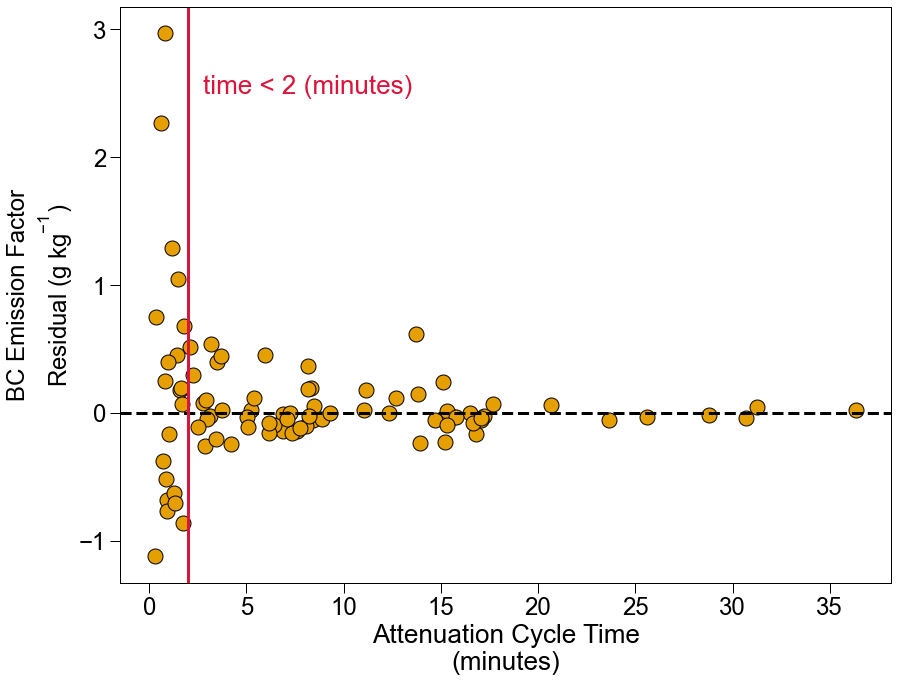

In [107]:
fig,ax = plt.subplots(figsize=(13,10))

ax.plot(EF_ATN.num_Hz/60,EF_ATN.res,'o',color='#E69F00',ms = 15,markeredgecolor='k')

vthres = 2
ax.axhline(y=0,ls='--',color='k')
ax.axvline(x=vthres,ls='-',color='#DC143C')

ax.set_xlabel('Attenuation Cycle Time\n(minutes)',fontsize=26)
ax.annotate('time < {} (minutes)'.format(vthres),xy = (vthres+0.75,2.5),fontsize=26,color='#DC143C')
ax.set_ylabel('BC Emission Factor\nResidual (g kg$^{-1}$)')

fig.tight_layout()
path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
fig.savefig(path+'ATNcycle_groundAE33.png')

In [108]:
delta =  dfS['end time'] - dfS['start time']
locTimes = delta.dt.total_seconds()/60

locTimes.describe()

count      9.000000
mean     158.333333
std       87.425683
min       27.000000
25%       87.000000
50%      185.000000
75%      201.000000
max      310.000000
dtype: float64

## Define EF_ATNt (with threshold applied)

In [109]:
vthres = 2
EF_ATNt = EF_ATN.loc[EF_ATN.num_Hz>60*vthres] # EF_ATN with threshold applied
EF_ATNt.loc[EF_ATNt.num_Hz<120]

#path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/'
#EF_ATNt.to_csv(path+'Blodgett_BC-BrC_EFs_2025-04-14.csv')

Empty DataFrame
Columns: [MCE, BC_EF, BrC_EF, num_Hz, BC_int, C_int, ending, res]
Index: []

/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_56592/3512524520.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(yticks)


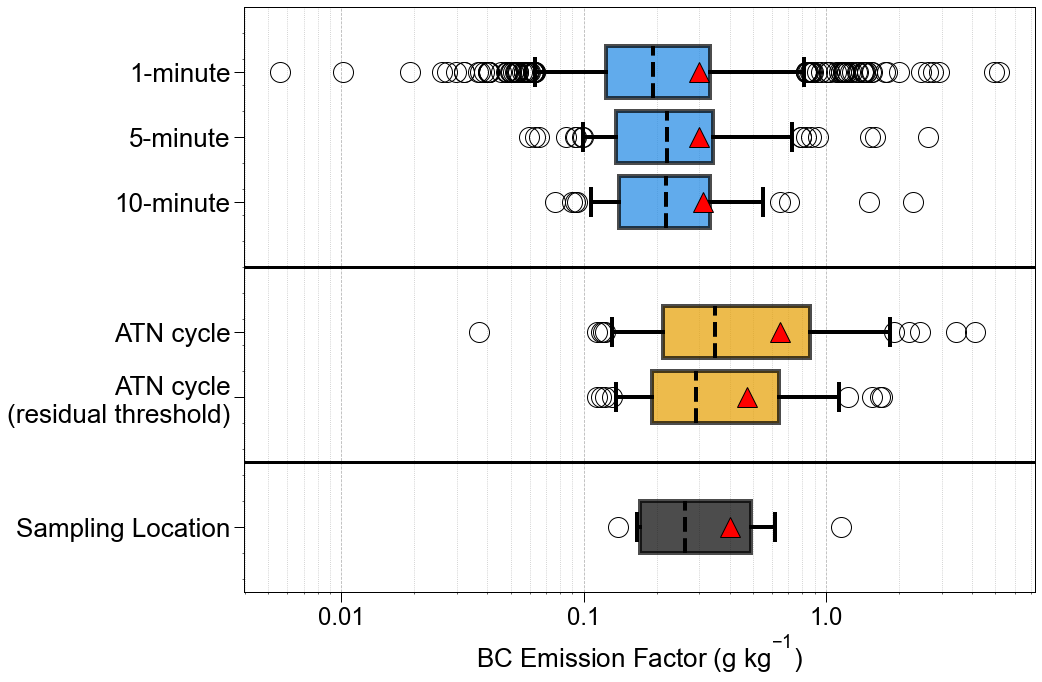

In [110]:
fig,ax = plt.subplots(figsize=(15,10))

# box and whisker
lw = 4
boxprops=dict(linewidth=lw)
medianprops=dict(linewidth=lw,linestyle='--',color='k')
whiskerprops = dict(linewidth=lw)
capprops = dict(linewidth=lw)
meanprops = dict(markersize=20,markerfacecolor='r',markeredgecolor='k')
flierprops = dict(markersize=20)

pos = [0.25,0.75,1,1.5,1.75,2]
dfs = [dfS['BC_EF'].dropna(),EF_ATN.loc[EF_ATN.num_Hz>60*vthres,'BC_EF'],EF_ATN['BC_EF'],EF10['BC_EF'],EF5['BC_EF'],EF1['BC_EF'].dropna()]
box = ax.boxplot(dfs,  
                 positions=pos,whis=[5,95],showfliers=True,showmeans=True,
                 boxprops=boxprops,flierprops=flierprops,
                 medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops,meanprops=meanprops,patch_artist=True,widths=0.2,vert=False)

ax.set_xscale('log')
ax.set_xlabel('BC Emission Factor (g kg$^{-1}$)',fontsize=26)

# Turn on minor ticks for the y-axis
ax.minorticks_on()
# Customize major grid lines (y-axis only)
ax.grid(axis='x', linestyle='--', alpha=0.95, which='major')
# Customize minor grid lines (y-axis only)
ax.grid(axis='x', linestyle=':', alpha=0.8, which='minor')
yticks = ax.get_xticks()
ax.set_xticklabels(yticks)

# add vertical line separators, set x lims
ax.axhline(y=0.5,ls='-',color='k')
ax.axhline(y=1.25,ls='-',color='k')
ax.set_ylim([0,2.25])

# Set categorical labels 
labels = ['Sampling Location','ATN cycle\n(residual threshold)','ATN cycle','10-minute','5-minute','1-minute']
# Rotate x-axis labels
ax.set_yticklabels(labels, rotation=0,fontsize=26, ha='right')  # Rotate 45 degrees and align right

colors = ['k','#E69F00','#E69F00','#1E88E5','#1E88E5','#1E88E5']
for i,p in enumerate(pos):
    box['boxes'][i].set(facecolor=colors[i],alpha=0.7)


fig.tight_layout()
path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(path+'timeBasisComparison.png')

In [111]:
# Combine labels and dfs into a dictionary
EF_dict = dict(zip(labels, dfs))

mct = pd.DataFrame(index = EF_dict.keys())

for key,value in EF_dict.items():
    print(key)
    mct.loc[key,'average'] = value.describe()['mean']
    mct.loc[key,'median'] = value.describe()['50%']

mct

Sampling Location
ATN cycle
(residual threshold)
ATN cycle
10-minute
5-minute
1-minute


average    median
Sampling Location                0.403056  0.262390
ATN cycle\n(residual threshold)  0.470263  0.289665
ATN cycle                        0.647931  0.349671
10-minute                        0.310624  0.219444
5-minute                         0.298992  0.221266
1-minute                         0.300164  0.192910

## Combined Plot

In [112]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_56592/573060162.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(yticks)


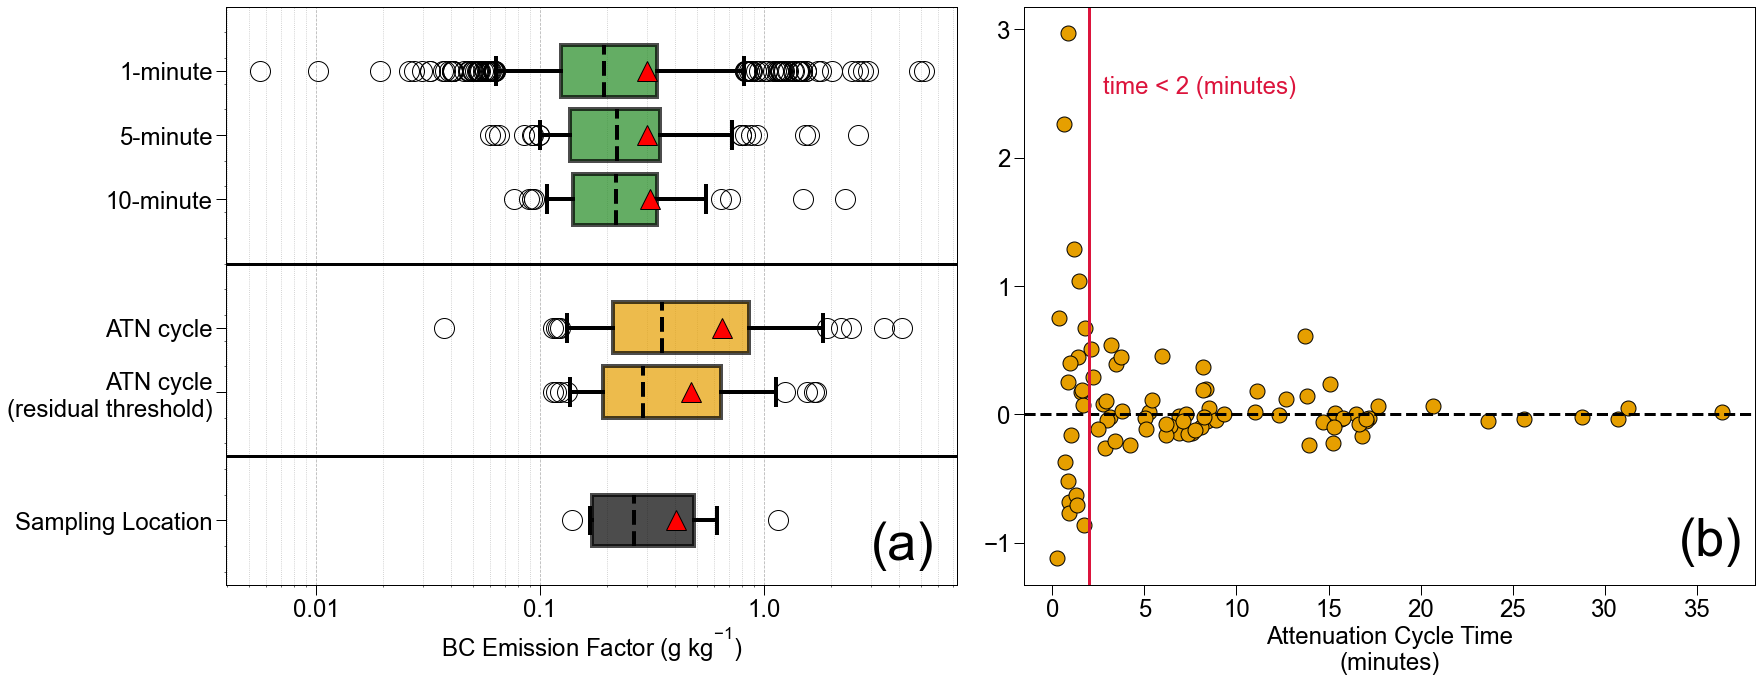

In [113]:
fig,ax = plt.subplots(1,2,figsize=(25,10))

# box and whisker
lw = 4
boxprops=dict(linewidth=lw)
medianprops=dict(linewidth=lw,linestyle='--',color='k')
whiskerprops = dict(linewidth=lw)
capprops = dict(linewidth=lw)
meanprops = dict(markersize=20,markerfacecolor='r',markeredgecolor='k')
flierprops = dict(markersize=20)

pos = [0.25,0.75,1,1.5,1.75,2]
dfs = [dfS['BC_EF'].dropna(),EF_ATN.loc[EF_ATN.num_Hz>60*vthres,'BC_EF'],EF_ATN['BC_EF'],EF10['BC_EF'],EF5['BC_EF'],EF1['BC_EF'].dropna()]
box = ax[0].boxplot(dfs,  
                 positions=pos,whis=[5,95],showfliers=True,showmeans=True,
                 boxprops=boxprops,flierprops=flierprops,
                 medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops,meanprops=meanprops,patch_artist=True,widths=0.2,vert=False)

ax[0].set_xscale('log')
ax[0].set_xlabel('BC Emission Factor (g kg$^{-1}$)',fontsize=24)

# Turn on minor ticks for the y-axis
ax[0].minorticks_on()
# Customize major grid lines (y-axis only)
ax[0].grid(axis='x', linestyle='--', alpha=0.95, which='major')
# Customize minor grid lines (y-axis only)
ax[0].grid(axis='x', linestyle=':', alpha=0.8, which='minor')
yticks = ax[0].get_xticks()
ax[0].set_xticklabels(yticks)

# add vertical line separators, set x lims
ax[0].axhline(y=0.5,ls='-',color='k')
ax[0].axhline(y=1.25,ls='-',color='k')
ax[0].set_ylim([0,2.25])

# Set categorical labels 
labels = ['Sampling Location','ATN cycle\n(residual threshold)','ATN cycle','10-minute','5-minute','1-minute']
# Rotate x-axis labels
ax[0].set_yticklabels(labels, rotation=0,fontsize=24, ha='right')  # Rotate 45 degrees and align right

#colors = ['k','#E69F00','#E69F00','#1E88E5','#1E88E5','#1E88E5']
colors = ['k','#E69F00','#E69F00','#228B22','#228B22','#228B22']
for i,p in enumerate(pos):
    box['boxes'][i].set(facecolor=colors[i],alpha=0.7)
    
# ------------------------------------------------------------------------------------------------------------- #

ax[1].plot(EF_ATN.num_Hz/60,EF_ATN.res,'o',color='#E69F00',ms = 15,markeredgecolor='k')

vthres = 2
ax[1].axhline(y=0,ls='--',color='k')
ax[1].axvline(x=vthres,ls='-',color='#DC143C')

ax[1].set_xlabel('Attenuation Cycle Time\n(minutes)',fontsize=24)
ax[1].annotate('time < {} (minutes)'.format(vthres),xy = (vthres+0.75,2.5),fontsize=24,color='#DC143C')
#ax[1].set_ylabel('BC Emission Factor\nResidual (g kg$^{-1}$)',fontsize=24)

# ------------------------------------------------------------------------------------------------------------- #
letters = ['(a)','(b)']

ax[0].annotate('(a)',xy=(3,0.1),fontsize=52)
ax[1].annotate('(b)',xy=(34,-1.1),fontsize=52)


fig.tight_layout()
path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
fig.savefig(path+'Fig2_prelim.png')

## Cauchy Distribution

0.007921067048960001


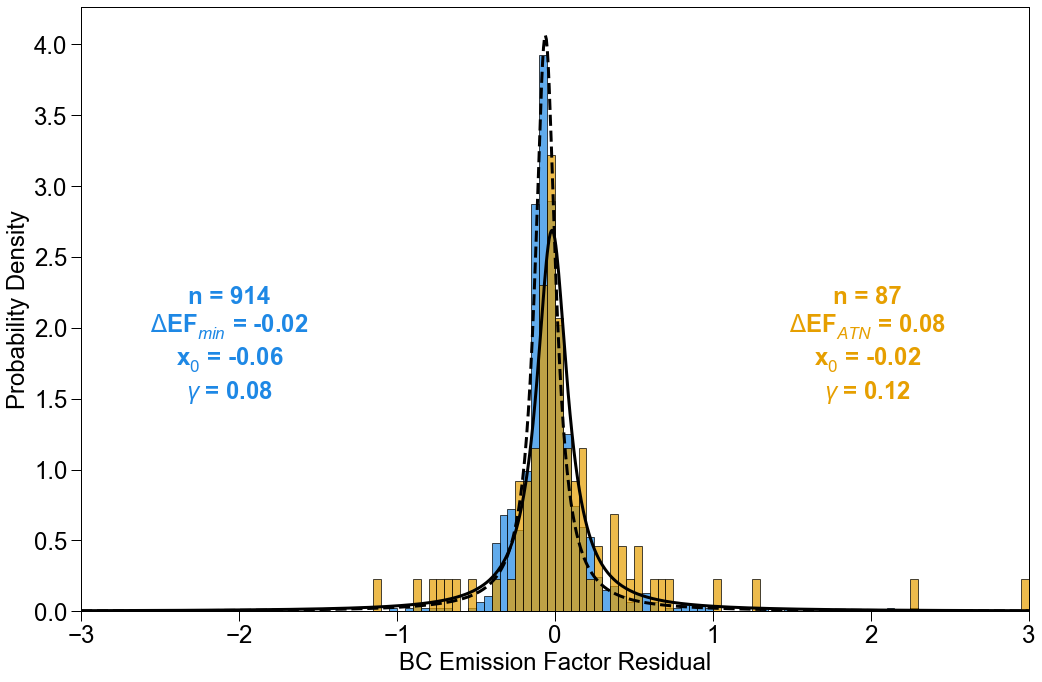

In [114]:
from scipy.stats import cauchy,kstest,weibull_min

fig,ax=plt.subplots(figsize=(15,10))

bins = np.arange(-4,4.1,0.05)
al = 0.7
#ax.hist(EF1.rBC,alpha = al,density=True,edgecolor='k',bins=bins)
ax.hist(EF1.sampR,alpha = al,density=True,edgecolor='k',bins=bins,color='#1E88E5')
ax.hist(EF_ATN.res,alpha = al,density=True,edgecolor='k',bins=bins,color='#E69F00')

ax.set_xlim([-3,3])
ax.set_xlabel('BC Emission Factor Residual')
ax.set_ylabel('Probability Density')

x = np.linspace(-3,3,1001)

# Plot normal distributions
loc1,scale1 = cauchy.fit(EF1.sampR.dropna())
pdf1 = cauchy.pdf(x,loc1,scale1)
avg1 = np.mean(EF1.sampR.dropna())
ax.plot(x,pdf1,'--',color='k')
count1 = len(EF1.sampR.dropna())

# Perform the KS test
ks_stat, p_value = kstest(EF1.sampR.dropna(),'cauchy', args=(loc1, scale1))
print(p_value)

# Plot normal distributions
loc2,scale2 = cauchy.fit(EF_ATN.res.dropna())
pdf2 = cauchy.pdf(x,loc2,scale2)
avg2 = np.mean(EF_ATN.res.dropna())
count2 = len(EF_ATN.res.dropna())
ax.plot(x,pdf2,'-',color='k')

ax.annotate('n = {}\n$\Delta$EF$_{{min}}$ = {:.2f}\nx$_0$ = {:.2f}\n$\gamma$ = {:.2f}'.format(count1,avg1,loc1,scale1),xy = (-2+loc1,1.5),color='#1E88E5',fontweight='bold',ha='center')
ax.annotate('n = {}\n$\Delta$EF$_{{ATN}}$ = {:.2f}\nx$_0$ = {:.2f}\n$\gamma$ = {:.2f}'.format(count2,avg2,loc2,scale2),xy = (2+loc2,1.5),color='#E69F00',fontweight='bold',ha='center')

fig.tight_layout()
path = '/Users/jdabutler/Library/Mobile Documents/com~apple~CloudDocs/Documents/_CURRENT WORK/_ch 1/plots_shortcut/'
#fig.savefig(path+'residuals_cauchy.png')

In [115]:
from scipy.stats import exponweib

def normParam(data):
    data = data.dropna()
    count = len(data)
    # Fit the skew normal distribution
    loc,scale = stats.cauchy.fit(data)

    # Extract parameters
    mu = loc       # Mean
    std = scale    # Standard deviation
    #skew = shape   # Skewness parameter
    kurt = stats.kurtosis(data)
    
    # Generate x values for the plot
    x = np.linspace(mu - 3*std, mu + 3*std, 100)

    # Calculate the corresponding y values for the normal distribution
    y = stats.gumbel_r.pdf(x, mu, std)
    
    return mu,std,skew,kurt,x,y
    

In [116]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm","lognorm","cauchy", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    
    return best_dist, best_p, params

In [117]:
best_dist,best_p,params = get_best_distribution(EF1.sampR.dropna())

p value for norm = 6.914278244246876e-33
p value for lognorm = 9.212416743982348e-17
p value for cauchy = 0.007921067048960001
p value for exponweib = 7.930848125491703e-19
p value for weibull_max = 0.0
p value for weibull_min = 1.833995285867163e-48
p value for pareto = 1.3128364901958464e-167
p value for genextreme = 7.607214961250099e-22
Best fitting distribution: cauchy
Best p value: 0.007921067048960001
Parameters for the best fit: (-0.060413438648929035, 0.07836869402424246)


In [118]:
data = EF_ATN.res.dropna()

dist_names = ["cauchy"]
dist_results = []
params = {}
for dist_name in dist_names:
    dist = getattr(st, dist_name)
    print(dist)
    param = dist.fit(data)

    params[dist_name] = param
    # Applying the Kolmogorov-Smirnov test
    D, p = st.kstest(data, dist_name, args=param)
    print("p value for "+dist_name+" = "+str(p))

p value for cauchy = 0.4497379480469865


In [119]:
kurt = stats.kurtosis(data)
kurt

11.619968655570071

In [120]:
EF_ATN.loc[(EF_ATN.num_Hz < 60*3)&(EF_ATN.BC_EF>1.5)]

MCE     BC_EF    BrC_EF  num_Hz      BC_int  \
2021-04-20 13:24:51  0.846386  1.833859  2.271008     106  30202.9045   
2021-04-20 13:33:51  0.843622  2.446275  2.787183      70  37791.2625   
2021-04-20 13:43:51  0.834965  1.670527  2.253598     125  29778.3605   
2021-04-20 13:47:51  0.839571  1.905154  3.353537      21  25855.3430   
2021-04-20 14:10:51  0.843195  1.607770  2.444829      85  29805.0920   
2021-04-20 14:38:51  0.859973  3.422408  3.109326      37  39250.8995   
2021-04-20 14:47:51  0.844617  4.128287  2.878626      50  42421.5755   
2021-04-20 14:50:51  0.834711  1.555495  2.967000      59  23964.6835   
2021-04-20 14:53:51  0.844912  2.200801  2.277822      88  32166.4795   

                         C_int              ending       res  
2021-04-20 13:24:51  16779.585 2021-04-20 13:26:37  0.675919  
2021-04-20 13:33:51  15739.270 2021-04-20 13:35:01  1.288335  
2021-04-20 13:43:51  18161.250 2021-04-20 13:45:56  0.512587  
2021-04-20 13:47:51  13826.700 2021-04-20 13:48:12  0.747214  
2021-04-20 14:10:51  18887.085 2021-04-20 14:12:16  0.449830  
2021-04-20 14:38:51  11684.665 2021-04-20 14:39:28  2.264468  
2021-04-20 14:47:51  10469.245 2021-04-20 14:48:41  2.970347  
2021-04-20 14:50:51  15696.450 2021-04-20 14:51:50  0.397555  
2021-04-20 14:53:51  14890.905 2021-04-20 14:55:19  1.042861

# Subsample EF vs MCE

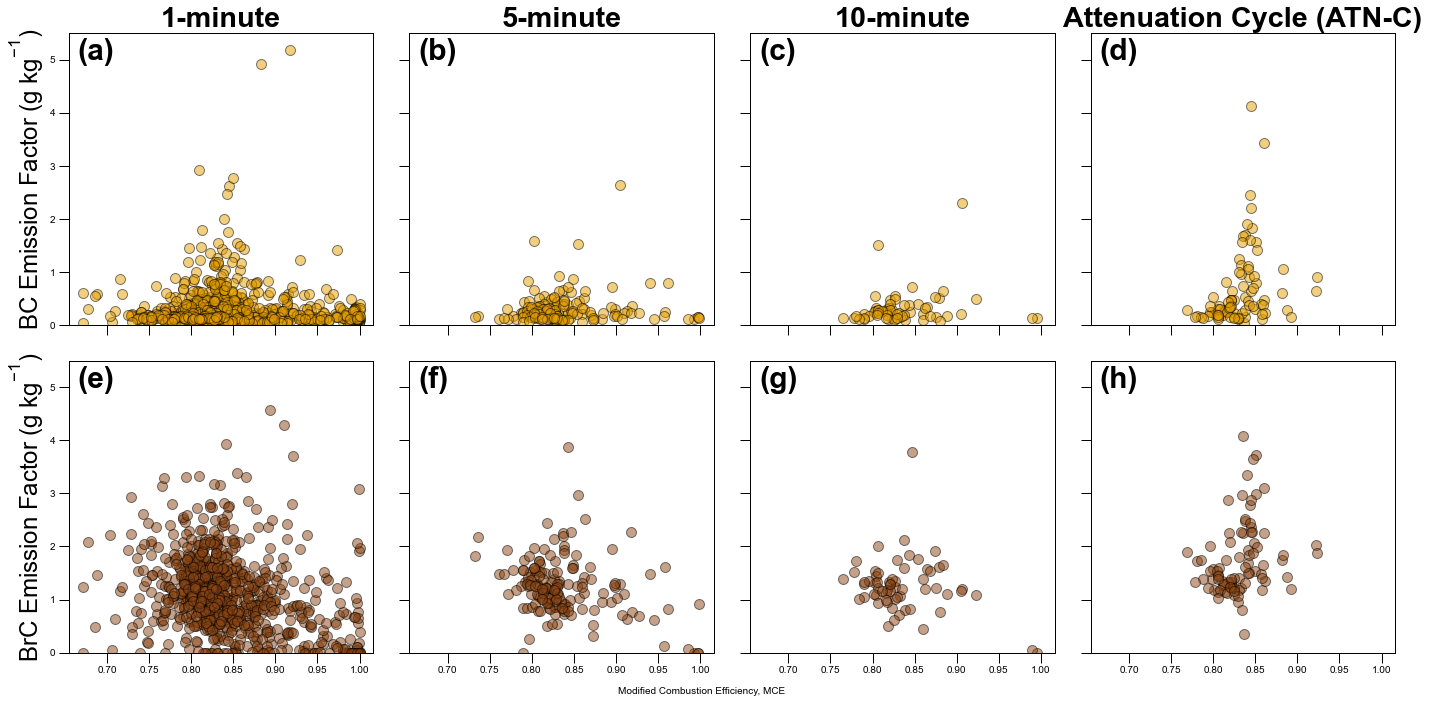

In [121]:
fig,ax = plt.subplots(2,4,sharex=True,sharey=True,figsize=(20,10))

alp = 0.5
fs = 10

ax = ax.flatten()

ground = '#E69F00'

ax[0].plot(EF1.MCE,EF1.BC_EF,'o',color=ground,label = 'Ground BC EF',markeredgecolor='k',alpha=alp)
ax[1].plot(EF5.MCE,EF5.BC_EF,'o',color=ground,label = 'Ground BC EF',markeredgecolor='k',alpha=alp)
ax[2].plot(EF10.MCE,EF10.BC_EF,'o',color=ground,label = 'Ground BC EF',markeredgecolor='k',alpha=alp)
ax[3].plot(EF_ATN.MCE,EF_ATN.BC_EF,'o',color=ground,label='Ground BC EF',markeredgecolor='k',alpha=alp)

ax[4].plot(EF1.MCE,EF1.BrC_EF,'o',color=brc,label = 'Ground BC EF',markeredgecolor='k',alpha=alp)
ax[5].plot(EF5.MCE,EF5.BrC_EF,'o',color=brc,label = 'Ground BC EF',markeredgecolor='k',alpha=alp)
ax[6].plot(EF10.MCE,EF10.BrC_EF,'o',color=brc,label = 'Ground BC EF',markeredgecolor='k',alpha=alp)
ax[7].plot(EF_ATN.MCE,EF_ATN.BrC_EF,'o',color=brc,label='Ground BC EF',markeredgecolor='k',alpha=alp)

titles = ['1-minute','5-minute','10-minute','Attenuation Cycle (ATN-C)']
for i,t in enumerate(titles):
     ax[i].set_title(t,fontweight='bold')

ylabels = ['BC Emission Factor (g kg$^{-1}$)','BrC Emission Factor (g kg$^{-1}$)']#,'BrC to BC EF ratio']
for i,y in enumerate([0,4]):
    ax[y].set_ylabel(ylabels[i])

    
letters = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
for j in range(8):
    ax[j].tick_params(axis='both', labelsize=fs)
    ax[j].annotate(letters[j],xy=(0.665,5),fontsize=30,fontweight='bold')

# Add a common x-label below the figure
fig.text(0.5, 0.01, 'Modified Combustion Efficiency, MCE', ha='center', fontsize=fs)
ax[0].set_ylim([0 ,5.5])
    
fig.tight_layout()

path='/Users/jdabutler/Library/Mobile Documents/com~apple~CloudDocs/Documents/_CURRENT WORK/_ch 1/plots_shortcut/'
#fig.savefig(path+'EF_1-5-10-ATN.png')

# Combustion Conditions Box Plots (Main Text)

In [122]:
# Filter DataFrames for MCE < 0.9 and MCE >= 0.9
dfs = [EF1, EF5, EF10, EF_ATNt,drone]
f_dfs = {'Smolder': [], 'Flaming': []}
names = ['1-min','5-min','10-min','ATN','Aerial']

BCsumStat = pd.DataFrame()
for i, df in enumerate(dfs):
    f_dfs['Smolder'].append(df.loc[df['MCE'] < 0.9,])
    f_dfs['Flaming'].append(df.loc[df['MCE'] >= 0.9])
    df_store = df.describe()
    BCsumStat.loc[:,names[i]] = df.describe()['BC_EF']
    print(names[i])
    for key, df_list in f_dfs.items():
        print(f"Processing {key} dataframes")
        for idx,df in enumerate(df_list):
            BCsumStat.loc[:,names[idx]+'_'+str(key)]=df.describe()['BC_EF']

1-min
Processing Smolder dataframes
Processing Flaming dataframes
5-min
Processing Smolder dataframes
Processing Flaming dataframes
10-min
Processing Smolder dataframes
Processing Flaming dataframes
ATN
Processing Smolder dataframes
Processing Flaming dataframes
Aerial
Processing Smolder dataframes
Processing Flaming dataframes


Smolder: 2.2568999999999995 3% EF$_{2.5}$ = 75.22999999999999
Flaming: 0.31650000000000034 3% EF$_{2.5}$ = 10.550000000000011
Smolder: 15.046 20% EF$_{2.5}$ = 75.22999999999999
Flaming: 2.1100000000000025 20% EF$_{2.5}$ = 10.550000000000011


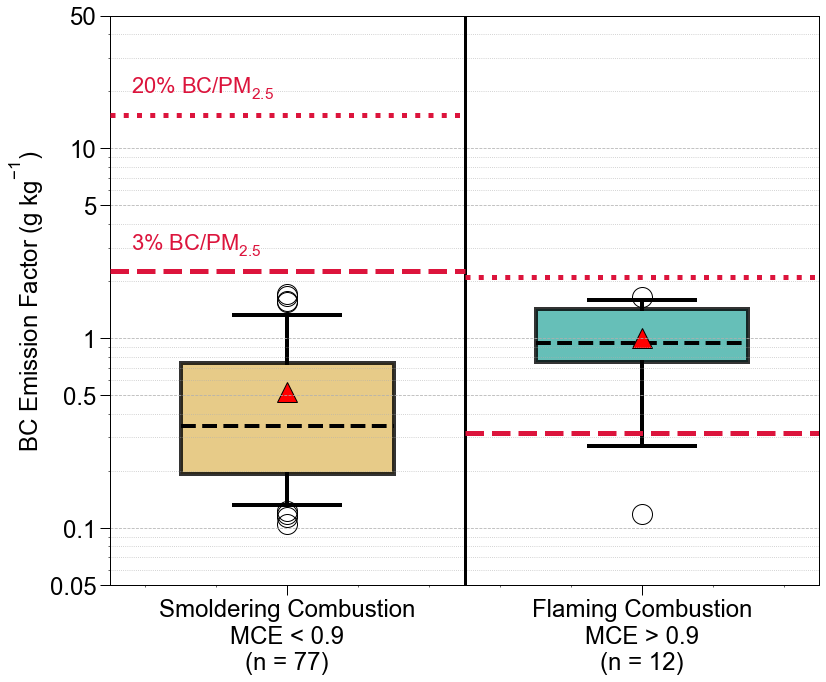

In [123]:
flier_logic=True

fig,ax=plt.subplots(figsize=(12,10))

# box and whisker
lw = 4
boxprops=dict(linewidth=lw)
medianprops=dict(linewidth=lw,linestyle='--',color='k')
whiskerprops = dict(linewidth=lw)
capprops = dict(linewidth=lw)
meanprops = dict(markersize=20,markerfacecolor='r',markeredgecolor='k')
flierprops = dict(markersize=20)
fl = '#FF4500'
smo = '#FFD700'

pos = [0.25,0.75]

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(pos)
    ax.set_xticklabels(labels,fontsize=24)
    ax.set_xlim(0,1)
    #ax.set_ylim(0,3)
    ax.set_yscale('log')


MCEsm = 0.67
MCEfl = 0.95
pm_fl = 230 - (MCEfl*231)
pm_sm = 230 - (MCEsm*231)

hlc = '#DC143C'
bcPM = [0.05,0.1,0.2]
x_sm = [0,0.5]
x_fl = [0.5,1]


linestyle = ['--']             # ,'-.',':'
bc_label = ['20% BC']          # 5% BC','10% BC',
ratios = [0.03,0.2]
rat = ['3%','20%']
lines = ['--',':']
for i,r in enumerate(ratios):
    ax.plot(x_sm,[r*pm_sm,r*pm_sm],ls = lines[i],color=hlc,lw=5,zorder=5)
    print('Smolder: ' + str(r*pm_sm) + ' ' + rat[i] + r' EF$_{2.5}$ = '+str(pm_sm))
    ax.plot(x_fl,[r*pm_fl,r*pm_fl],ls = lines[i],color=hlc,lw=5,zorder=5)
    print('Flaming: ' + str(r*pm_fl) + ' ' + rat[i]+ r' EF$_{2.5}$ = '+str(pm_fl))
    ax.annotate(rat[i] + ' BC/PM$_{2.5}$',xy=(0.03,1.3*r*pm_sm),color=hlc,fontsize=22,ha='left')


# plot this one as points f_dfs['Flaming'][3]['BC_EF']

# combine ground and aerial samples
smolder  = np.array(f_dfs['Smolder'][3]['BC_EF'])
smolder = np.append(smolder,f_dfs['Smolder'][4]['BC_EF'])

flaming = np.array(f_dfs['Flaming'][3]['BC_EF'].values)
flaming = np.append(flaming,f_dfs['Flaming'][4]['BC_EF'])

box = ax.boxplot([smolder, flaming],
                 positions=pos,whis=[5,95],showfliers=flier_logic,showmeans=True,
                 boxprops=boxprops,flierprops=flierprops,
                 medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops,meanprops=meanprops,patch_artist=True,widths=0.3,zorder=0)


labels = ['Smoldering Combustion\nMCE < 0.9\n(n = 77)','Flaming Combustion\nMCE > 0.9\n(n = 12)']
set_axis_style(ax,labels)

text_below=0.03
ax.axvline(x=1.25,color='k')
ax.set_ylabel('BC Emission Factor (g kg$^{-1}$)',fontsize=24)
#ax.annotate('Smoldering Regime\n(MCE<0.9)',xy=(0.,0.1),xycoords='data',xytext=(0.75,text_below), ha='center',fontsize=30,fontweight='bold',color = smo)
#ax.annotate('Flaming Regime\n(MCE>0.9)',xy=(1.75,0.1),xycoords='data',xytext=(1.75,text_below), ha='center',fontsize=30,fontweight='bold',color = fl)

# Set custom y-ticks
y_ticks = [0.05,0.1, 0.5, 1, 5, 10, 50]
ax.set_yticks(y_ticks)

# Set custom y-tick labels
y_labels = ['0.05','0.1', '0.5', '1', '5', '10', '50']
ax.set_yticklabels(y_labels)

fcolors = ['#E1BE6A','#40B0A6']
for i,f in enumerate(fcolors):
    box['boxes'][i].set(facecolor=f,alpha=0.8)  

ax.axvline(x=0.5,color='k')   

# Turn on minor ticks for the y-axis
ax.minorticks_on()
# Customize major grid lines (y-axis only)
ax.grid(axis='y', linestyle='--', alpha=0.95, which='major')
# Customize minor grid lines (y-axis only)
ax.grid(axis='y', linestyle=':', alpha=0.8, which='minor')

fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
fig.savefig(path+'EF_FOFEM_combine.png')

In [124]:
print(np.mean(flaming),np.std(flaming),len(flaming))

1.0022392576502483 0.4834532526015057 12


In [125]:
print(np.mean(smolder),np.std(smolder),len(smolder))

0.521066845582014 0.42176429432133966 77


In [126]:
EF_ATNt.loc[EF_ATNt.MCE<0.9]

MCE     BC_EF    BrC_EF  num_Hz      BC_int  \
2021-04-20 12:50:51  0.842696  0.897452  1.503807     173  24026.2745   
2021-04-20 12:55:51  0.848970  0.916573  2.064026     253  30074.8770   
2021-04-20 13:09:51  0.851037  1.552972  3.733560     208  21214.5410   
2021-04-20 13:28:51  0.831161  1.236514  1.797067     165  27610.4060   
2021-04-20 13:37:51  0.837687  1.697946  2.518545     190  28761.1810   
...                       ...       ...       ...     ...         ...   
2021-04-23 13:23:51  0.820123  0.344431  2.084089     175   7774.3955   
2021-04-23 13:30:51  0.806031  0.190854  1.385638     426   7943.7255   
2021-04-23 13:54:51  0.819450  0.145589  1.231054     918   6476.6180   
2021-04-23 14:44:51  0.829990  0.122939  1.064904     466   6095.9925   
2021-04-23 15:03:51  0.824552  0.131380  1.156582     305   5137.9360   

                         C_int              ending       res  
2021-04-20 12:50:51  27275.545 2021-04-20 12:53:44 -0.260488  
2021-04-20 12:55:51  33429.910 2021-04-20 13:00:04 -0.241367  
2021-04-20 13:09:51  13917.730 2021-04-20 13:13:19  0.395032  
2021-04-20 13:28:51  22749.510 2021-04-20 13:31:36  0.078574  
2021-04-20 13:37:51  17257.630 2021-04-20 13:41:01  0.540006  
...                        ...                 ...       ...  
2021-04-23 13:23:51  22996.545 2021-04-23 13:26:46  0.102142  
2021-04-23 13:30:51  42405.315 2021-04-23 13:37:57 -0.051435  
2021-04-23 13:54:51  45323.080 2021-04-23 14:10:09 -0.096701  
2021-04-23 14:44:51  50518.680 2021-04-23 14:52:37 -0.119350  
2021-04-23 15:03:51  39843.455 2021-04-23 15:08:56 -0.110909  

[64 rows x 8 columns]

## With Subsamples

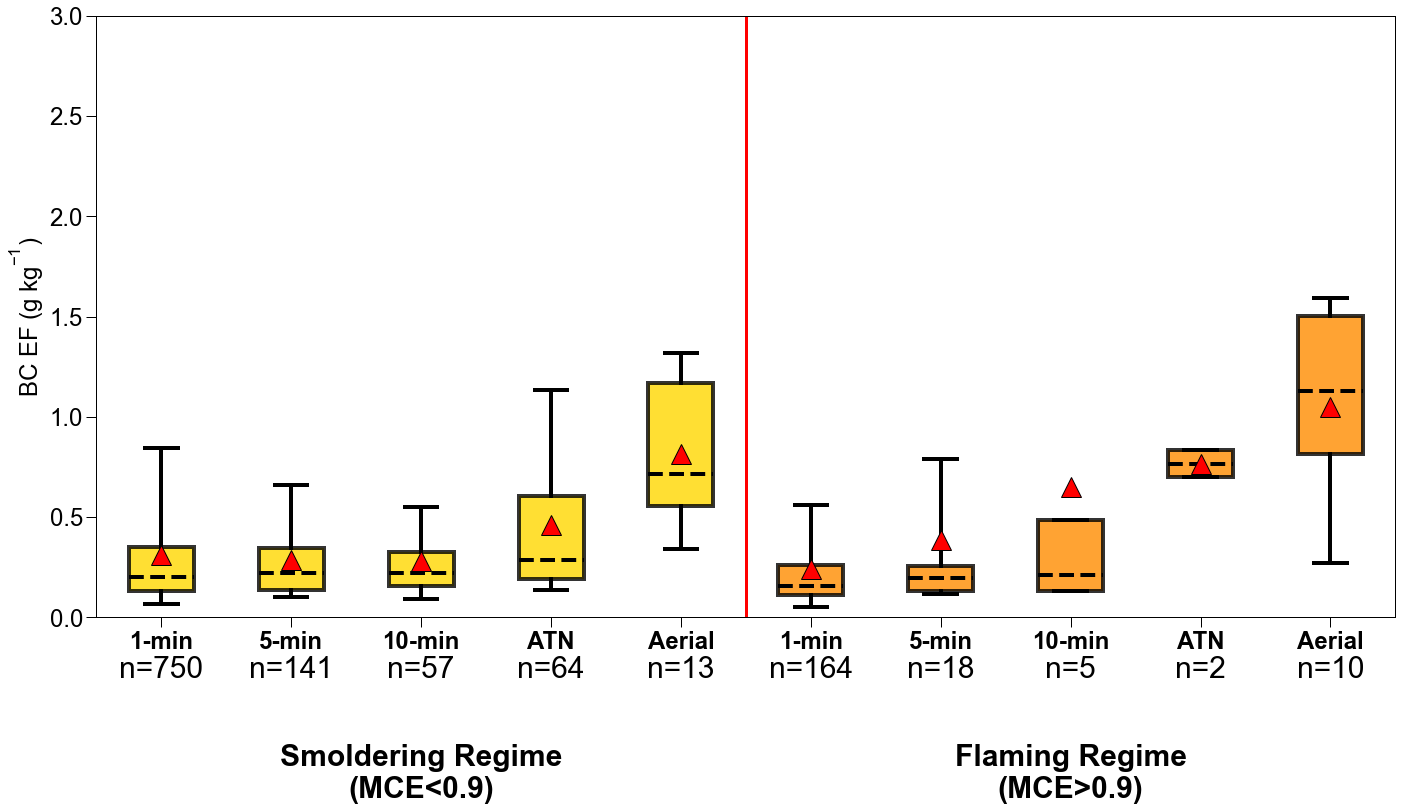

In [127]:
flier_logic = False

pos = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9]

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(pos)
    ax.set_xticklabels(labels,fontweight='bold')
    ax.set_xlim(0.0, 2 )
    ax.set_ylim(0,3)


fig,ax=plt.subplots()

fl = '#FF8C00'
smo = '#FFD700'

# box and whisker
lw = 4
boxprops=dict(linewidth=lw)
medianprops=dict(linewidth=lw,linestyle='--',color='k')
whiskerprops = dict(linewidth=lw)
capprops = dict(linewidth=lw)
meanprops = dict(markersize=20,markerfacecolor='r',markeredgecolor='k')
flierprops = dict(markersize=20)

box = ax.boxplot([f_dfs['Smolder'][0]['BC_EF'],f_dfs['Smolder'][1]['BC_EF'],f_dfs['Smolder'][2]['BC_EF'],f_dfs['Smolder'][3]['BC_EF'],f_dfs['Smolder'][4]['BC_EF'],
                 f_dfs['Flaming'][0]['BC_EF'],f_dfs['Flaming'][1]['BC_EF'],f_dfs['Flaming'][2]['BC_EF'],f_dfs['Flaming'][3]['BC_EF'],f_dfs['Flaming'][4]['BC_EF']],
                 positions=pos,whis=[5,95],showfliers=flier_logic,showmeans=True,
                 boxprops=boxprops,flierprops=flierprops,
                 medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops,meanprops=meanprops,patch_artist=True,widths=0.1)

labels = ['1-min','5-min','10-min','ATN','Aerial','1-min','5-min','10-min','ATN','Aerial']
set_axis_style(ax,labels)

text_below = -0.9

ax.axvline(x=1,color='r')
ax.set_ylabel('BC EF (g kg$^{-1}$)')
ax.annotate('Smoldering Regime\n(MCE<0.9)',xy=(0,0),xycoords='data',xytext=(0.5,text_below), ha='center',fontsize=30,fontweight='bold')
ax.annotate('Flaming Regime\n(MCE>0.9)',xy=(0,0),xycoords='data',xytext=(1.5,text_below), ha='center',fontsize=30,fontweight='bold')

#for i,c in enumerate(summary.columns):
#    ax.annotate('n={:.0f}'.format(summary.loc['count',c]),xy=(pos[i],1),xycoords='data',xytext=(pos[i],-0.6), ha='center',fontsize=30)
#    mu = summary.loc['mean',c]

fl = '#FF8C00'
smo = '#FFD700'
for i,p in enumerate(pos):
    if p < 1:
        box['boxes'][i].set(facecolor=smo,alpha=0.8)
        ax.annotate('n={:.0f}'.format(BCsumStat.loc['count',labels[i]+'_Smolder']),xy=(pos[i],1),xycoords='data',xytext=(pos[i],-0.3), ha='center',fontsize=30)
    if p > 1:
        box['boxes'][i].set(facecolor=fl,alpha=0.8)
        ax.annotate('n={:.0f}'.format(BCsumStat.loc['count',labels[i]+'_Flaming']),xy=(pos[i],1),xycoords='data',xytext=(pos[i],-0.3), ha='center',fontsize=30)
    #ax.annotate('n={:.0f}'.format(BCsumStat.loc['count',labels[i]]),xy=(pos[i],1),xycoords='data',xytext=(pos[i],-0.3), ha='center',fontsize=30)
        
fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(path+'EF_boxPlot.png')


#colors = ['#228B22',wf_color,nwf_color,wf_color,nwf_color,wf_color,nwf_color]

#for i,c in enumerate(colors):
    #v['bodies'][i].set_color(c)
    #v['bodies'][i].set_edgecolor('k')
    #box['whiskers'][i].set_color(c)
    #box['boxes'][i].set_color(c)
    #box['boxes'][i].set(facecolor=c,alpha=0.8)
    #box['medians'][i].set_color('k')
    
    


# Flight and sample times histogram

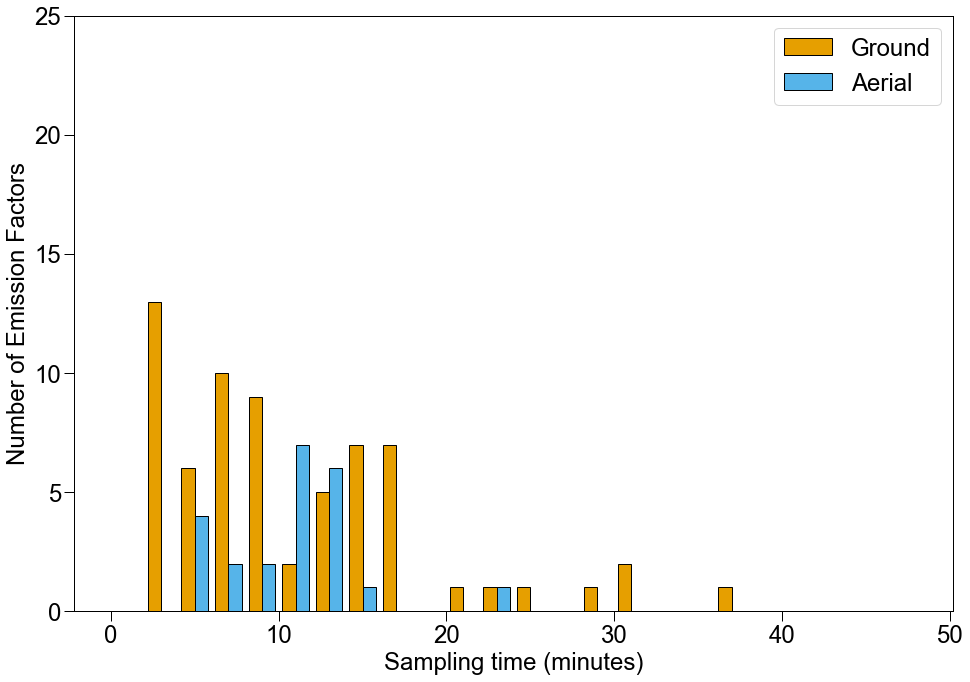

In [128]:
fig,ax = plt.subplots(figsize=(14,10))

#alp = 0.8
bins = np.arange(0,50,2)

ax.hist([EF_ATNt.num_Hz/60,drone.flight_time],edgecolor='k',color=['#E69F00','#56B4E9'],bins=bins,stacked=False,label = ['Ground','Aerial'])

ax.set_xlabel('Sampling time (minutes)')
ax.set_ylabel('Number of Emission Factors')
ax.legend()

ax.set_yticks(np.arange(0,30,5))
fig.tight_layout()

path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(path+'groundAerial_sampTimes.png')

In [129]:
min(EF_ATNt.num_Hz/60)

2.0833333333333335

In [130]:
EF_ATN['num_Hz'].mean() / 60

8.62873563218391

# ATN Cycle Time vs Emission Factor

Text(0, 0.5, 'BC EF')

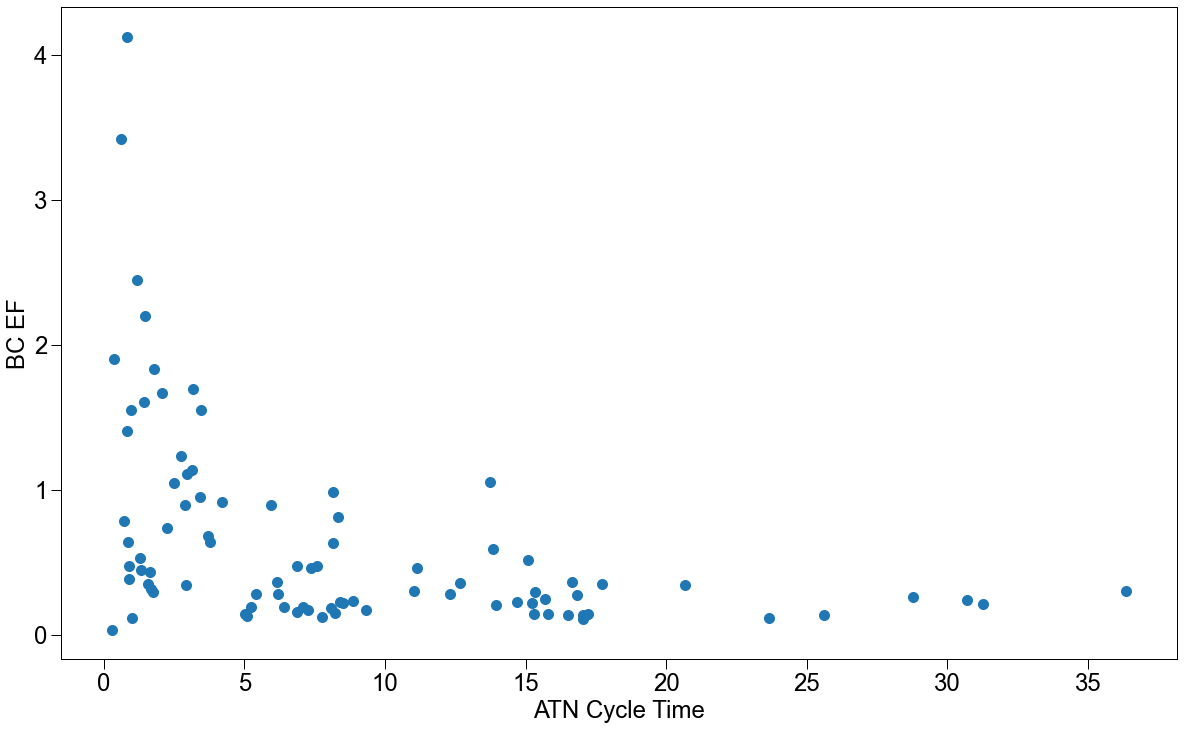

In [131]:
plt.plot(EF_ATN.num_Hz/60,EF_ATN.BC_EF,'o')
plt.xlabel('ATN Cycle Time')
plt.ylabel('BC EF')

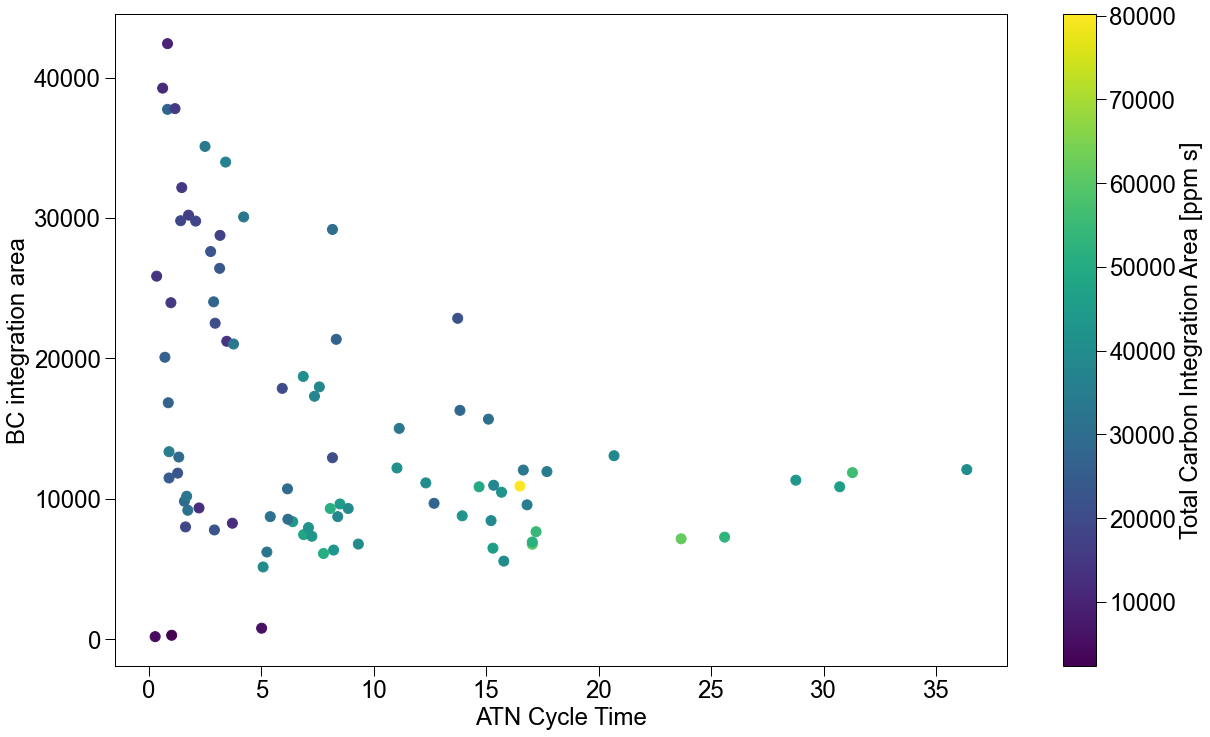

In [132]:
fig,ax = plt.subplots()

# Use scatter plot to set the color of points
scatter = ax.scatter(EF_ATN.num_Hz/60, EF_ATN.BC_int, c=EF_ATN.C_int, cmap='viridis')

ax.set_xlabel('ATN Cycle Time')
ax.set_ylabel('BC integration area')
# Add a color bar to indicate the values of BC_int
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Total Carbon Integration Area [ppm s]')

In [133]:
EF_ATN.loc[EF_ATN.BC_int<5000]

MCE     BC_EF    BrC_EF  num_Hz    BC_int     C_int  \
2021-04-20 12:34:51  0.836381  0.037128  0.346482      17  172.5425  4734.685   
2021-04-21 19:01:51  0.858478  0.120285  1.187365      61  272.6455  2309.320   
2021-04-22 18:49:51  0.892339  0.144083  1.206690     301  774.3510  5475.500   

                                 ending       res  
2021-04-20 12:34:51 2021-04-20 12:35:08 -1.120812  
2021-04-21 19:01:51 2021-04-21 19:02:52 -0.162206  
2021-04-22 18:49:51 2021-04-22 18:54:52 -0.028352

# AAE minutely calculation

## Sampling Location

In [134]:
# initalize sampling dataframe to include minutely averaged AAE mean and standard deviation 
dfS['AAE'] = np.nan
dfS['AAE_std'] = np.nan
dfS['MCE_std'] = np.nan


for i,row in dfS.iterrows():
    s = row['start time']
    e = row['end time']
    
    dfS.loc[i,'AAE'] = dfB.loc[s:e,'AAE_7pt'].mean()
    dfS.loc[i,'AAE_std'] = dfB.loc[s:e,'AAE_7pt'].std()
    dfS.loc[i,'MCE_std'] = MCE_T.loc[s:e,'MCE'].std()

## ATN Cycle

In [135]:
# initalize sampling dataframe to include minutely averaged AAE mean and standard deviation 
EF_ATN['AAE'] = np.nan
EF_ATN['AAE_std'] = np.nan
EF_ATN['MCE_std'] = np.nan


for idx,row in EF_ATN.iterrows():
    s = idx
    e = row['ending']
    
    EF_ATN.loc[idx,'AAE'] = dfB.loc[s:e,'AAE_7pt'].mean()
    EF_ATN.loc[idx,'AAE_std'] = dfB.loc[s:e,'AAE_7pt'].std()
    EF_ATN.loc[idx,'MCE_std'] = MCE_T.loc[s:e,'MCE'].std()

In [136]:
EF_ATN

MCE     BC_EF    BrC_EF  num_Hz      BC_int  \
2021-04-20 12:34:51  0.836381  0.037128  0.346482      17    172.5425   
2021-04-20 12:37:51  0.850636  0.784274  2.991494      43  20077.7115   
2021-04-20 12:40:51  0.860810  0.474535  2.255050      54  11477.6865   
2021-04-20 12:43:51  0.849866  0.298770  1.542314     104   9178.6295   
2021-04-20 12:47:51  0.856323  0.388985  1.488971      54  13349.4330   
...                       ...       ...       ...     ...         ...   
2021-04-23 13:23:51  0.820123  0.344431  2.084089     175   7774.3955   
2021-04-23 13:30:51  0.806031  0.190854  1.385638     426   7943.7255   
2021-04-23 13:54:51  0.819450  0.145589  1.231054     918   6476.6180   
2021-04-23 14:44:51  0.829990  0.122939  1.064904     466   6095.9925   
2021-04-23 15:03:51  0.824552  0.131380  1.156582     305   5137.9360   

                         C_int              ending       res       AAE  \
2021-04-20 12:34:51   4734.685 2021-04-20 12:35:08 -1.120812  3.761983   
2021-04-20 12:37:51  26082.250 2021-04-20 12:38:34 -0.373667  2.264974   
2021-04-20 12:40:51  24642.500 2021-04-20 12:41:45 -0.683405  2.575616   
2021-04-20 12:43:51  31299.640 2021-04-20 12:45:35 -0.859170  2.491153   
2021-04-20 12:47:51  34964.610 2021-04-20 12:48:45 -0.768956  2.353768   
...                        ...                 ...       ...       ...   
2021-04-23 13:23:51  22996.545 2021-04-23 13:26:46  0.102142  2.996626   
2021-04-23 13:30:51  42405.315 2021-04-23 13:37:57 -0.051435  3.056595   
2021-04-23 13:54:51  45323.080 2021-04-23 14:10:09 -0.096701  2.471840   
2021-04-23 14:44:51  50518.680 2021-04-23 14:52:37 -0.119350  3.021549   
2021-04-23 15:03:51  39843.455 2021-04-23 15:08:56 -0.110909  3.012517   

                      AAE_std   MCE_std  
2021-04-20 12:34:51  0.262607       NaN  
2021-04-20 12:37:51  0.797034       NaN  
2021-04-20 12:40:51  0.526231       NaN  
2021-04-20 12:43:51  0.415889  0.004171  
2021-04-20 12:47:51  0.284269       NaN  
...                       ...       ...  
2021-04-23 13:23:51  0.586217  0.015715  
2021-04-23 13:30:51  0.732644  0.083683  
2021-04-23 13:54:51  1.202157  0.061970  
2021-04-23 14:44:51  0.601284  0.069693  
2021-04-23 15:03:51  0.327362  0.056121  

[87 rows x 11 columns]

# Literature Comparison Plots

## 2025 BC EF vs MCE

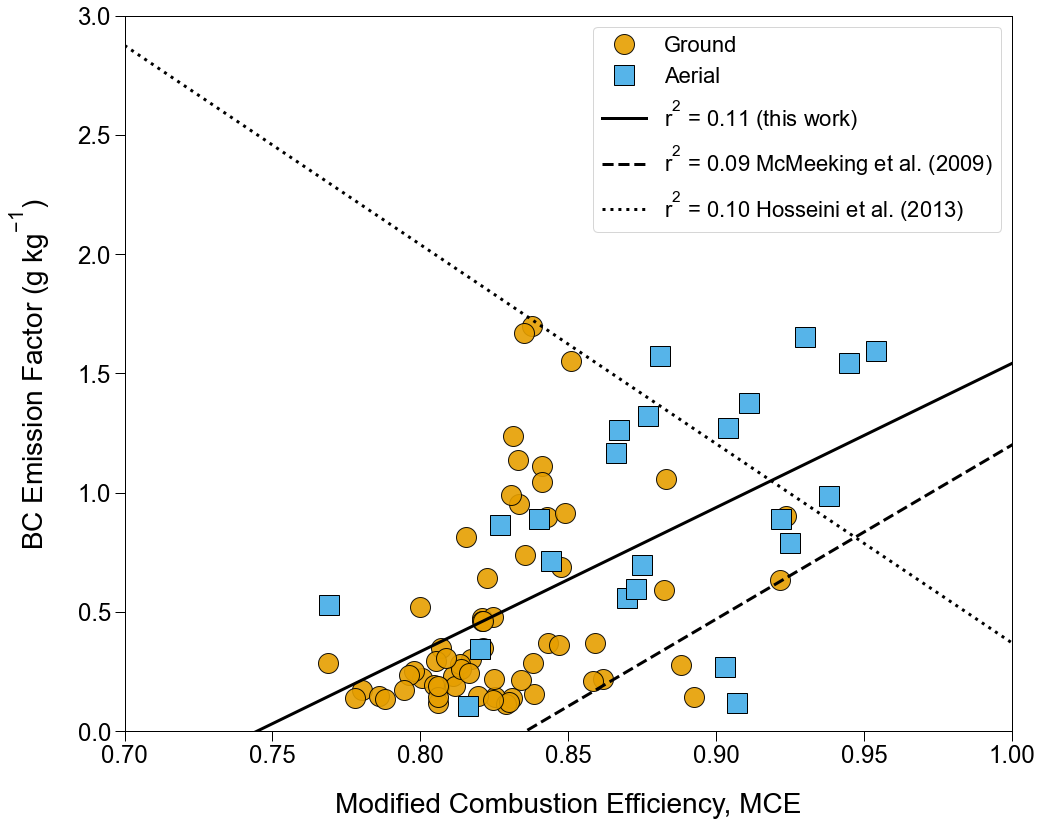

In [137]:
fig,ax = plt.subplots(figsize=(15,12))

# BC linear regression
BC_vals = EF_ATNt.BC_EF.values
BC_vals = np.append(BC_vals,drone.BC_EF.values)
MCE_vals = EF_ATNt.MCE
MCE_vals = np.append(MCE_vals,drone.MCE.values)
s,b,r2,r = OLSconstCI(MCE_vals,BC_vals)

# Black Carbon ----------------------------------------------------------------------------- #
ground_scatter = ax.plot(EF_ATN.loc[EF_ATN.num_Hz>60*vthres,'MCE'],EF_ATN.loc[EF_ATN.num_Hz>60*vthres,'BC_EF'],'o',color='#E69F00',label = 'Ground',ms = 20,markeredgecolor='k',alpha = 0.9) # ground AE33
aerial_scatter = ax.plot(drone.MCE,drone.BC_EF,'s',color='#56B4E9',ms=20,markeredgecolor='k',label='Aerial') # drone ABCD

ax.set_xlim([0.7,1])
ax.set_ylabel(r"BC Emission Factor (g kg$^{-1}$)",fontsize=28,labelpad=25,fontweight=None)

x = np.arange(0.7,1.1,0.1)
McM = 7.3 *x - 6.1
Hoss = -8.35*x + 8.72
But = s*x + b
line_but = ax.plot(x,But,'-k',label='r$^2$ = 0.11 (this work)'.format(s,abs(b)))
line_mcm = ax.plot(x,McM,'--k',label = 'r$^2$ = 0.09 McMeeking et al. (2009)')
line_hoss = ax.plot(x,Hoss,':k',label = 'r$^2$ = 0.10 Hosseini et al. (2013)')

ax.legend(fontsize=22)
ax.set_xlabel('Modified Combustion Efficiency, MCE',labelpad=25,fontsize=28,fontweight=None)
ax.set_ylim([0,3])
    
fig.tight_layout()
path='/Users/jdabutler/Documents/+github/rx burn/plots/'
fig.savefig(path+'Figure1_BCEFvsMCE_v2.png')

## BC EF

In [100]:
# May 2014 Montane average
May = BClit.loc[BClit.vegetationType=='average'].reset_index(drop=True)

# Selimovic Veg Species Type
SelVeg = BClit.loc[BClit.burnName.isin(['Douglas fir','Engelmann spruce','Lodgepole pine','Ponderosa pine'])].reset_index(drop=True)

# Selimovic Fuel Type
SelFuel = BClit.loc[BClit.burnName.isin(['Mixed conifer ecosystem','Canopy','Litter','Duff','Rotten Log'])]

# Aurell 2021
Aurell = BClit.loc[BClit.CiteShort=='Aurell et al., 2021'].reset_index(drop=True)

EFatnSum = EF_ATNt.describe()
droneSum = drone.describe()

# BrC EFs from Aurell et al. 2013
BrClit = BClit.loc[~np.isnan(BClit['BrC EF'])].reset_index(drop=True)

path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/'
#BrClit.to_csv(path + 'BrC_Literature.csv')

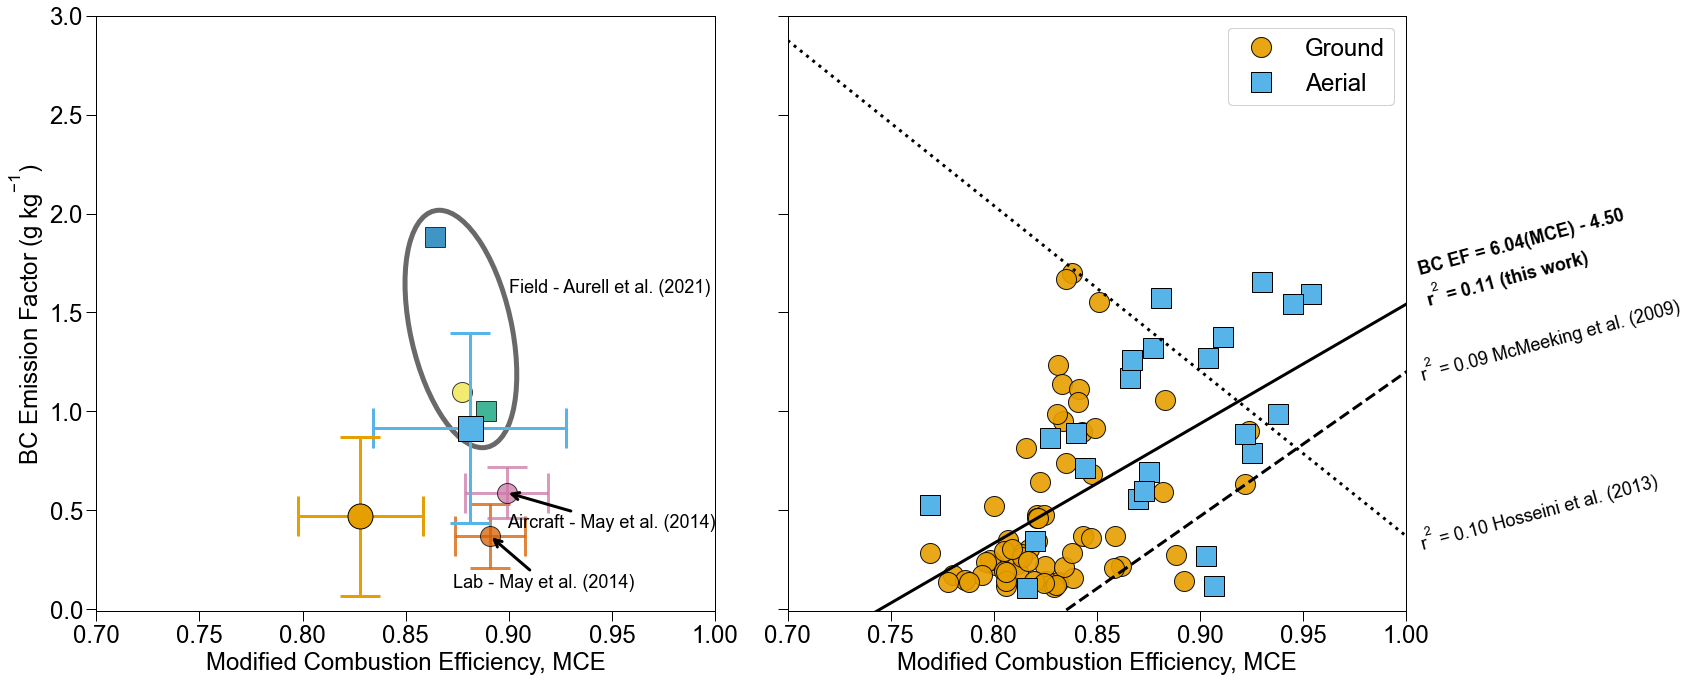

In [102]:
from matplotlib.patches import Ellipse

#BC_vals = EF_ATN.BC_EF.values
BC_vals = EF_ATNt.BC_EF.values
BC_vals = np.append(BC_vals,drone.BC_EF.values)
MCE_vals = EF_ATNt.MCE
MCE_vals = np.append(MCE_vals,drone.MCE.values)
s,b,r2,r = OLSconstCI(MCE_vals,BC_vals)


an_fs = 18 #text annotation font size 
# ---------------------------------------------------------------------------------------------------------------------------- #

fig,ax = plt.subplots(1,2,figsize=(24,10),sharey=True,sharex=True)
fig.subplots_adjust(wspace=0.425)

# Average of our field data
ax[0].errorbar(droneSum.loc['mean','MCE'],droneSum.loc['mean','BC_EF'],
               xerr=droneSum.loc['std','MCE'],yerr=droneSum.loc['std','BC_EF'],
               label = 'Aerial',color='#56B4E9',
               fmt='s',capsize=20,ms=25,capthick=3,markeredgecolor='k',zorder=10)


ax[0].errorbar(EFatnSum.loc['mean','MCE'],EFatnSum.loc['mean','BC_EF'],
               xerr=EFatnSum.loc['std','MCE'],yerr=EFatnSum.loc['std','BC_EF'],
               label = 'Ground',color='#E69F00',
               fmt='o',capsize=20,ms=25,capthick=3,markeredgecolor='k',zorder=10)



lit_alpha = 0.75
# Aurell 2021, State of science
labels = ['Aerial (Crown Burn)','Ground (Crown Burn)','Aerial (Knob Burn)']
syms = ['s','o','s']
colors = ['#009E73','#F0E442','#0072B2'] # change later???
for i,row in Aurell.iterrows():
    ax[0].plot(row.MCE,row['BC EF'],syms[i],alpha = lit_alpha,ms=20,color=colors[i],label=labels[i],markeredgecolor='k')


# May et al 2014, Lab and Aircraft averages
labels = ['Lab - May et al. (2014)','Aircraft - May et al. (2014)']
colors = ['#D55E00','#CC79A7']
for i,row in May.iterrows():
    ax[0].errorbar(row['MCE'],row['BC EF'],xerr=row['MCE STD'],yerr=row['BC STD'],label = labels[i],color=colors[i],
               fmt='o',capsize=20,ms=20,capthick=3,markeredgecolor='k',alpha = lit_alpha)
    if i%2==0:
        ax[0].annotate(labels[i],xy=(row['MCE'],row['BC EF']),xytext = (row['MCE']*0.98,row['BC EF']*0.3),fontsize=an_fs,arrowprops=dict(arrowstyle='->',lw=3,color='k'))
    else:
        ax[0].annotate(labels[i],xy=(row['MCE'],row['BC EF']),xytext = (row['MCE'],row['BC EF']*0.7),fontsize=an_fs,arrowprops=dict(arrowstyle='->',lw=3,color='k'))
        
        
#ax[0].legend(fontsize=20,loc='upper right')
ax[0].set_ylabel('BC Emission Factor (g kg$^{-1}$)')

# Collect handles and labels in the order you want
handles, labels = ax[0].get_legend_handles_labels()
custom_order = [3,4,0,1,2,5,6]  # Indices in the desired order

delta = 0.09
# Place an ellipse around the literature data
el_Aurell = Ellipse(xy = (Aurell.describe().loc['mean','MCE'],Aurell.describe().loc['mean','BC EF']+delta),
                    width = 0.05,
                    height = 1.2,
                    angle = 1,
                    edgecolor='#696969',
                    facecolor='none',
                    linewidth=5)
ax[0].add_patch(el_Aurell)

an_fs = 18
ax[0].annotate('Field - Aurell et al. (2021)',xy=(0.90,1.6),fontsize=an_fs)

# ---------------------------------------------------------------------------------------------------------------------------- #

ground_scatter = ax[1].plot(EF_ATN.loc[EF_ATN.num_Hz>60*vthres,'MCE'],EF_ATN.loc[EF_ATN.num_Hz>60*vthres,'BC_EF'],'o',color='#E69F00',label = 'Ground',ms = 20,markeredgecolor='k',alpha = 0.9) # ground AE33
aerial_scatter = ax[1].plot(drone.MCE,drone.BC_EF,'s',color='#56B4E9',ms=20,markeredgecolor='k',label='Aerial') # drone ABCD

ax[1].set_xlim([0.7,1])
ax[1].set_ylim([-0.01,3])

x = np.arange(0.7,1.1,0.1)
McM = 7.3 *x - 6.1
Hoss = -8.35*x + 8.72
But = s*x + b
line_but = ax[1].plot(x,But,'-k')
line_mcm = ax[1].plot(x,McM,'--k')
line_hoss = ax[1].plot(x,Hoss,':k')

# Create two separate legends
legend1 = ax[1].legend([ground_scatter[0], aerial_scatter[0]], ['Ground', 'Aerial'], fontsize=24, loc='upper right', ncol=1)
ax[1].add_artist(legend1)

#legend2 = ax.legend([line_but[0], line_mcm[0], line_hoss[0]], 
#                    ['r$^2$ = 0.11 | This work', 
#                     'r$^2$ = 0.09 | McMeeking et al. (2009)', 
#                     'r$^2$ = 0.10 | Hosseini et al. (2013)'], 
#                    fontsize=20,bbox_to_anchor=(0.47,1.15), loc='upper center',ncol=3)

an_fs = 18
rotate = 15
ax[1].annotate('BC EF = {:.2f}(MCE) - {:.2f}\nr$^2$ = 0.11 (this work)'.format(s,abs(b)), xy=(1,1.5),xytext=(1.005,1.53),fontweight='bold',fontsize=an_fs,rotation=rotate)
ax[1].annotate('r$^2$ = 0.09 McMeeking et al. (2009)', xy=(1,1.2),xytext=(1.005,1.15),fontsize=an_fs,rotation=rotate)
ax[1].annotate('r$^2$ = 0.10 Hosseini et al. (2013)', xy=(1,0.5),xytext=(1.005,0.3),fontsize=an_fs,rotation=rotate)

letters = ['(a)','(b)']
for j,l in enumerate(letters):
    ax[j].annotate(l,xy=(0.705,4),fontweight='bold',fontsize=56)
    ax[j].set_xlabel('Modified Combustion Efficiency, MCE')
    
fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(path+'BC EF_compare_FINAL.png',bbox_inches='tight')

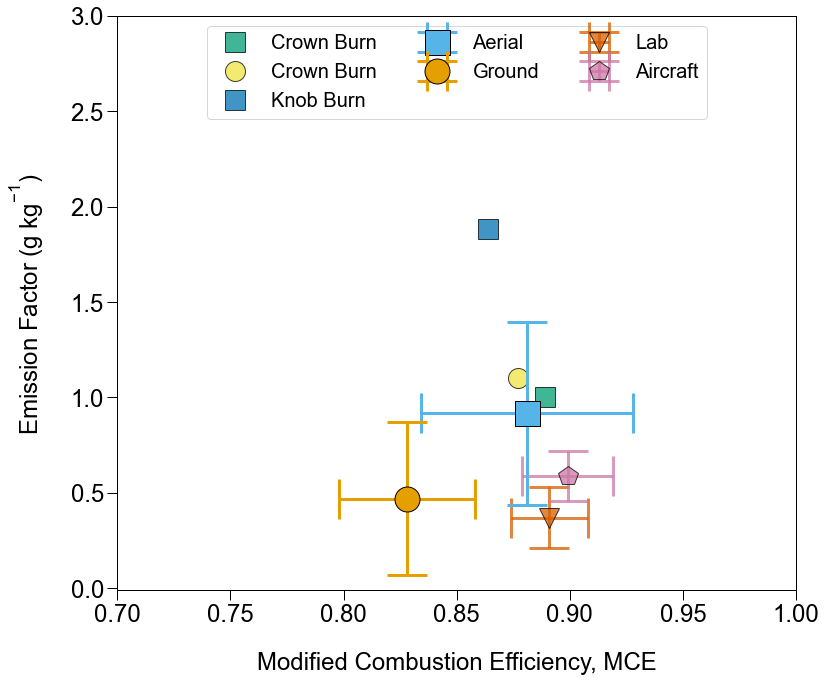

In [103]:
fig,ax = plt.subplots(figsize=(12,10))

# Average of our field data
ax.errorbar(droneSum.loc['mean','MCE'],droneSum.loc['mean','BC_EF'],
               xerr=droneSum.loc['std','MCE'],yerr=droneSum.loc['std','BC_EF'],
               label = 'Aerial',color='#56B4E9',
               fmt='s',capsize=20,ms=25,capthick=3,markeredgecolor='k',zorder=10)


ax.errorbar(EFatnSum.loc['mean','MCE'],EFatnSum.loc['mean','BC_EF'],
               xerr=EFatnSum.loc['std','MCE'],yerr=EFatnSum.loc['std','BC_EF'],
               label = 'Ground',color='#E69F00',
               fmt='o',capsize=20,ms=25,capthick=3,markeredgecolor='k',zorder=10)



lit_alpha = 0.75
# Aurell 2021, State of science
labels = ['Crown Burn','Crown Burn','Knob Burn']
syms = ['s','o','s']
colors = ['#009E73','#F0E442','#0072B2'] # change later???
for i,row in Aurell.iterrows():
    ax.plot(row.MCE,row['BC EF'],syms[i],alpha = lit_alpha,ms=20,color=colors[i],label=labels[i],markeredgecolor='k')


# May et al 2014, Lab and Aircraft averages
labels = ['Lab','Aircraft']
colors = ['#D55E00','#CC79A7']
fmts = ['v','p']
for i,row in May.iterrows():
    ax.errorbar(row['MCE'],row['BC EF'],xerr=row['MCE STD'],yerr=row['BC STD'],label = labels[i],color=colors[i],
               fmt=fmts[i],capsize=20,ms=20,capthick=3,markeredgecolor='k',alpha = lit_alpha)
        
        
ax.legend(fontsize=20,loc='upper center',ncol=3)
ax.set_ylabel(r"Emission Factor (g kg$^{-1}$)",fontsize=24,labelpad=25,fontweight=None)
ax.set_xlabel('Modified Combustion Efficiency, MCE',labelpad=25,fontweight=None)

ax.set_xlim([0.7,1])
ax.set_ylim([-0.01,3])

fig.tight_layout()
#fig.savefig('/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'+'BC_EF-context.png')

## BC and BrC EF vs MCE

Butler BrC r2 = 0.05735448390811326
Aurell BrC r2 = 0.8852250572179368


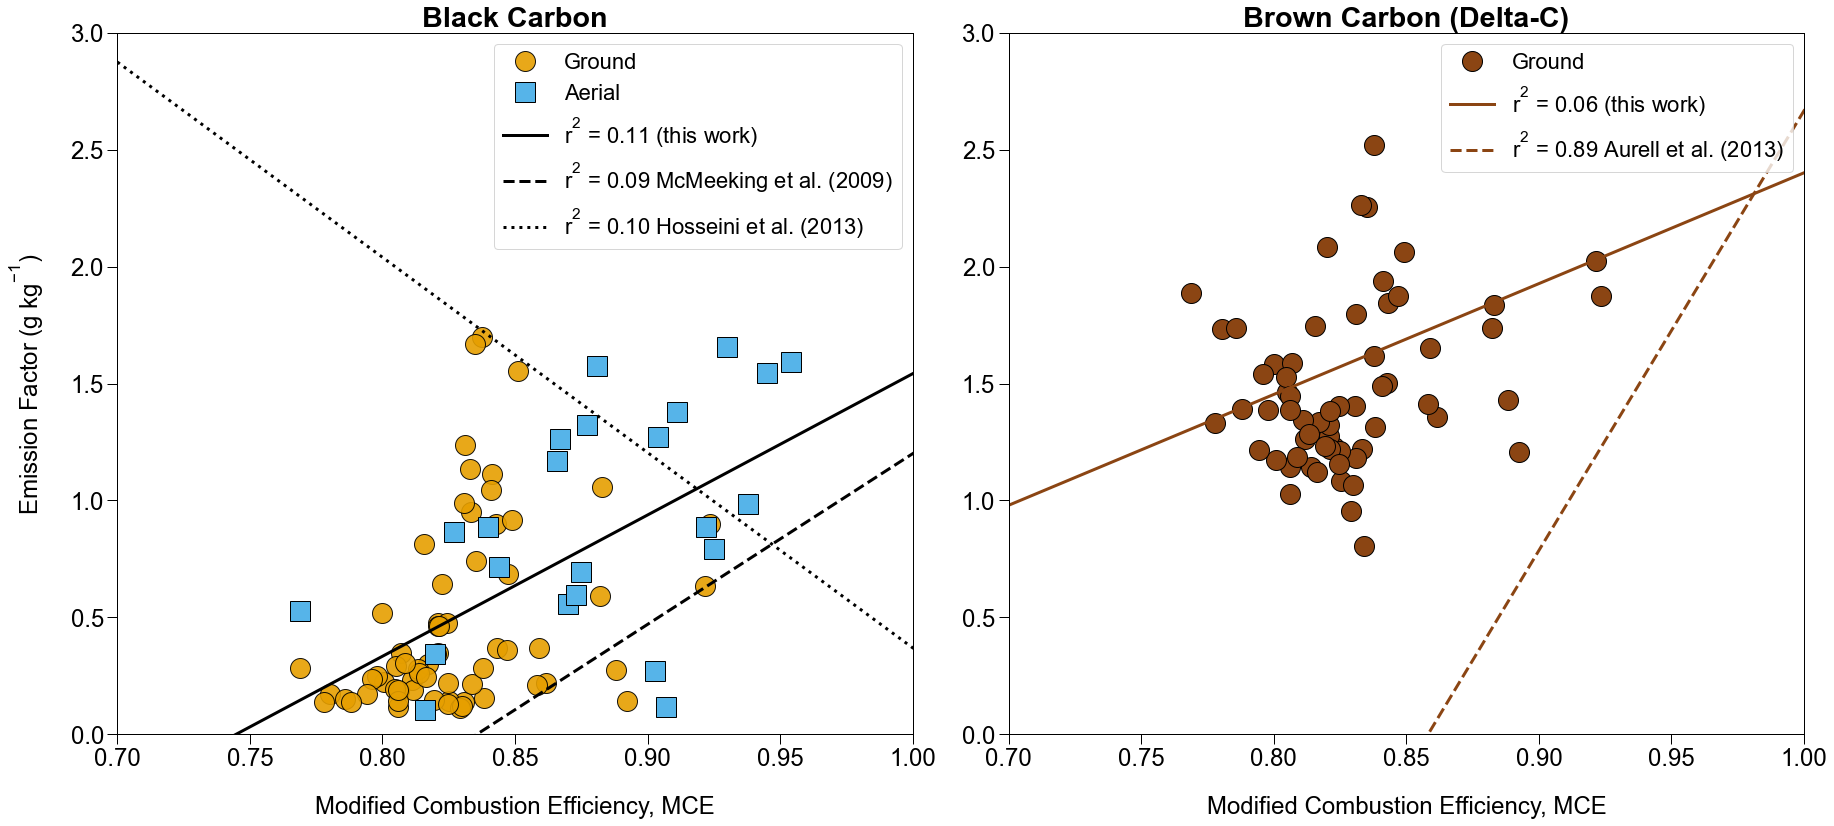

In [104]:
fig,ax = plt.subplots(1,2,figsize=(26,12),sharex=True)

# BC linear regression
BC_vals = EF_ATNt.BC_EF.values
BC_vals = np.append(BC_vals,drone.BC_EF.values)
MCE_vals = EF_ATNt.MCE
MCE_vals = np.append(MCE_vals,drone.MCE.values)
s,b,r2,r = OLSconstCI(MCE_vals,BC_vals)

# Black Carbon ----------------------------------------------------------------------------- #
ground_scatter = ax[0].plot(EF_ATN.loc[EF_ATN.num_Hz>60*vthres,'MCE'],EF_ATN.loc[EF_ATN.num_Hz>60*vthres,'BC_EF'],'o',color='#E69F00',label = 'Ground',ms = 20,markeredgecolor='k',alpha = 0.9) # ground AE33
aerial_scatter = ax[0].plot(drone.MCE,drone.BC_EF,'s',color='#56B4E9',ms=20,markeredgecolor='k',label='Aerial') # drone ABCD

ax[0].set_xlim([0.7,1])
ax[0].set_ylabel(r"Emission Factor (g kg$^{-1}$)",fontsize=24,labelpad=25,fontweight=None)

x = np.arange(0.7,1.1,0.1)
McM = 7.3 *x - 6.1
Hoss = -8.35*x + 8.72
But = s*x + b
line_but = ax[0].plot(x,But,'-k',label='r$^2$ = 0.11 (this work)'.format(s,abs(b)))
line_mcm = ax[0].plot(x,McM,'--k',label = 'r$^2$ = 0.09 McMeeking et al. (2009)')
line_hoss = ax[0].plot(x,Hoss,':k',label = 'r$^2$ = 0.10 Hosseini et al. (2013)')

ax[0].legend(fontsize=22)

# Brown Carbon ----------------------------------------------------------------------------- #
ax[1].plot(EF_ATNt.MCE,EF_ATNt.BrC_EF,'o',ms=20,color=brc,markeredgecolor='k',label='Ground')
#ax[1].plot(BrClit.MCE,BrClit['BrC EF'],'^',color='k',ms=20,markeredgecolor='k')

x = np.arange(0.7,1.1,0.1)
s,b,r2,r = OLSconstCI(EF_ATNt.MCE,EF_ATNt.BrC_EF)
But = s*x + b
line_but = ax[1].plot(x,But,'-',color=brc,label='r$^2$ = {:.2f} (this work)'.format(r2))
print('Butler BrC r2 = ' + str(r2))

sa,ba,r2a,ra = OLSconstCI(BrClit.MCE,BrClit['BrC EF'])
Aurell2 = sa*x+ba
ax[1].plot(x,Aurell2,'--',color=brc,label='r$^2$ = {:.2f} Aurell et al. (2013)'.format(r2a))
print('Aurell BrC r2 = ' + str(r2a))

ax[1].legend(fontsize=22,loc='upper right')

# labels for both subplots ----------------------------------------------------------------------------- #
letters = ['(a)','(b)']
titles = ['Black Carbon','Brown Carbon (Delta-C)']
for j,l in enumerate(letters):
    ax[j].set_title(titles[j],fontweight='bold')
    #ax[j].annotate(l,xy=(0.97,0.1),fontsize=56)
    ax[j].set_xlabel('Modified Combustion Efficiency, MCE',labelpad=25,fontweight=None)
    ax[j].set_ylim([0,3])
    
fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
fig.savefig(path+'BC-BrC EF vs MCE.png')

## AAE

In [105]:
AAElit.rename({'MCE ':'MCE'},axis=1,inplace=True)

# Selimovic Veg Types
AAEveg = AAElit.loc[AAElit.vegetationType.isin(['Douglas fir','Engelmann spruce','Lodgepole pine','Ponderosa pine'])].reset_index(drop=True)

# Selimovic Fuel Types
AAEfuel = AAElit.loc[AAElit.vegetationType.isin(['Mixed conifer ecosystem','Canopy','Litter','Duff','Rotten Log'])].reset_index(drop=True)

# Rx Burn and WF from Marasavin et al., 2023
RxWF = AAElit.loc[AAElit.fuelCategory.isin(['Prescribed fires','Wildfires'])].reset_index(drop=True)

# Aurell 2021 aerial measurements
A21 = AAElit.loc[AAElit.vegetationType.isin(['Knob burn','Crown burn'])].reset_index(drop=True)

Downwind Fixed
Prescribed Burn
Downwind Fixed
Wildfire


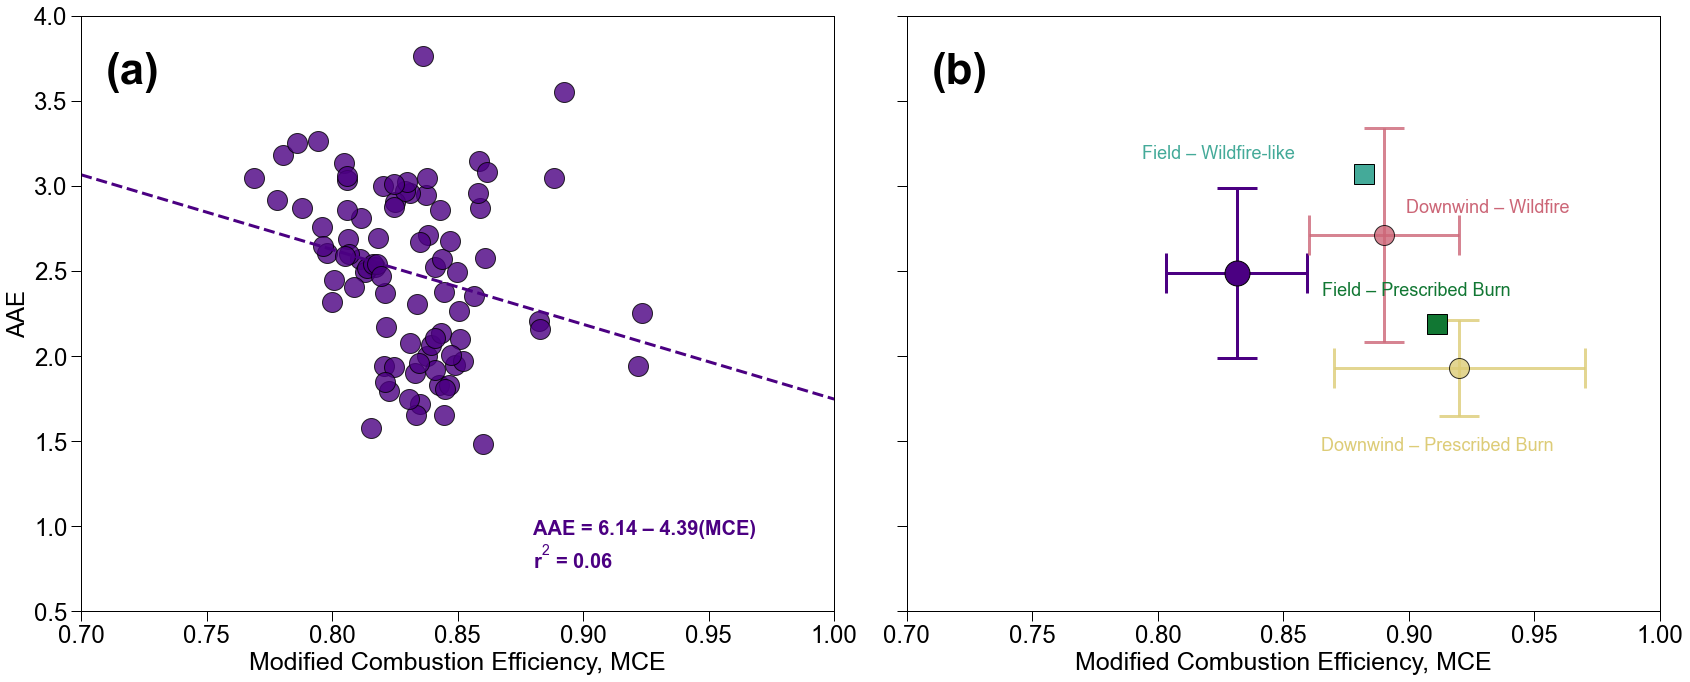

In [106]:
#calculate linear regression
s,b,r2,r = OLSconstCI(EF_ATN.MCE,EF_ATN.AAE)

fig,ax = plt.subplots(1,2,figsize=(24,10),sharex=True,sharey=True)

ax[0].plot(EF_ATN.MCE,EF_ATN.AAE,'o',color='#4B0082',markeredgecolor='k',alpha=0.8,ms=20)
ax[0].set_ylabel('AAE')
ax[0].set_xlim([0.7,1])
ax[0].set_ylim([0.5,4])

x = np.linspace(0.7,1,5)
AAE_model = s*x+b
ax[0].plot(x,AAE_model,'--',color='#4B0082')
an_fs = 20
ax[0].annotate('AAE = {:.2f} – {:.2f}(MCE)\nr$^2$ = {:.2f}'.format(b,abs(s),r2), xy=(0.88,0.75),fontweight='bold',fontsize=an_fs,color='#4B0082')
    
# ================================================================================== #
#ax[1].plot(EF_ATNt.MCE,EF_ATNt.AAE,'o',color='k',markeredgecolor='k',alpha=0.4,ms=20)

# Rx Burn and WF 
ax[1].errorbar(EF_ATN.describe().loc['mean','MCE'],EF_ATN.describe().loc['mean','AAE'],
               xerr=EF_ATN.describe().loc['std','MCE'],yerr=EF_ATN.describe().loc['std','AAE'],
               color='#4B0082',markeredgecolor='k',
               fmt='o',capsize=20,ms=25,capthick=3)

labels = RxWF.fuelCategory.unique()
colors = ['#DDCC77','#CC6677']
labels = ['Downwind Fixed\nPrescribed Burn','Downwind Fixed\nWildfire']
for i,row in RxWF.iterrows():
    ax[1].errorbar(row['MCE'],row.AAE,xerr=row['MCE STD'],yerr=row['AAE STD'],label=labels[i],color=colors[i],markeredgecolor='k',fmt='o',capsize=20,ms=20,capthick=3,alpha=0.8)
    print(labels[i])

an_fs = 18
ax[1].annotate('Downwind – Prescribed Burn',xy =(RxWF.loc[0,'MCE'],RxWF.loc[0,'AAE']),xytext = (RxWF.loc[0,'MCE']*0.94,RxWF.loc[0,'AAE']*0.75),fontsize=an_fs,color='#DDCC77')
ax[1].annotate('Downwind – Wildfire',xy =(RxWF.loc[1,'MCE'],RxWF.loc[1,'AAE']),xytext = (RxWF.loc[1,'MCE']*1.01,RxWF.loc[1,'AAE']*1.05),fontsize=an_fs,color='#CC6677')

# Aerial Measurements
labels = ['Aerial (Knob Burn)','Aerial (Crown Burn)']
colors = ['#117733','#44AA99'] # change later???
for i,row in A21.iterrows():
    ax[1].plot(row.MCE,row.AAE,'s',ms=20,label=labels[i],color = colors[i],markeredgecolor='k')
    
ax[1].annotate('Field – Prescribed Burn',xy =(A21.loc[0,'MCE'],A21.loc[0,'AAE']),xytext = (A21.loc[0,'MCE']*0.95,A21.loc[0,'AAE']*1.075),fontsize=an_fs,color='#117733',zorder=15)
ax[1].annotate('Field – Wildfire-like',xy =(A21.loc[1,'MCE'],A21.loc[1,'AAE']),xytext = (A21.loc[1,'MCE']*0.9,A21.loc[1,'AAE']*1.03),fontsize=an_fs,color='#44AA99')

# mixed conifer forest lab study
#ax[1].errorbar(mcf['MCE'],mcf['AAE'],xerr=mcf['MCE STD'],yerr=mcf['AAE STD'],color='k',ms=20,fmt='o',capsize=20,capthick=3)
#ax[1].annotate('Lab - Mixed-conifer\nforest',xy=(mcf['MCE'],mcf['AAE']),fontsize=an_fs,xytext = (mcf['MCE']*1.02,mcf['AAE']*0.92) )   
                
# ================================================================================== #
letters = ['(a)','(b)']
for j,l in enumerate(letters):
    ax[j].annotate(l,xy=(0.71,3.6),fontweight='bold',fontsize=44)
    ax[j].set_xlabel('Modified Combustion Efficiency, MCE',fontsize = 25) 
    
# ================================================================================== #
# labels for literature data
 

fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(path+'AAE_result_12-13-24.png')

### (old) Linear Correlation

In [131]:
compare = pd.merge(MCE_T,dfB[['WDA','AAE_7pt']],on='datetime')

In [132]:
compareC = pd.DataFrame(columns=compare.columns)
for s,e in zip(dfS['start time'],dfS['end time']):
    if s == dfS.loc[7,'start time']:
        continue
    else:
        compareC = pd.concat([compareC,compare.loc[s:e]],ignore_index=True)

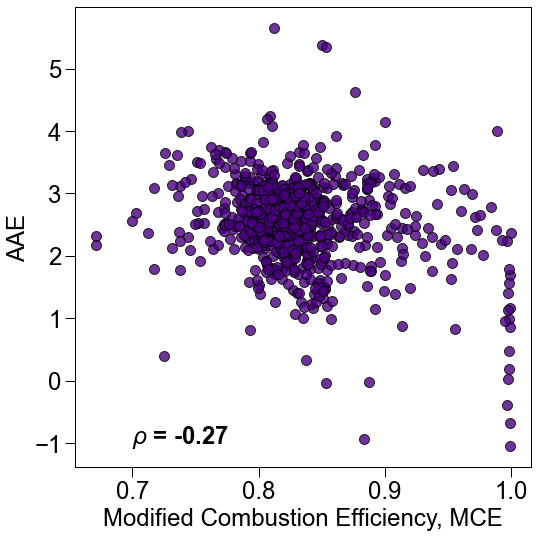

In [136]:
rho = pearson(compare.MCE,compare.AAE_7pt)

fig,ax=plt.subplots(figsize=(8,8))

ax.plot(compare.MCE,compare.AAE_7pt,'o',color='#4B0082',markeredgecolor='k',alpha=0.8)
ax.set_ylabel('AAE')
ax.set_xlabel('Modified Combustion Efficiency, MCE') 

ax.annotate(r'$\rho$ = {:.2f}'.format(rho),xy=(0.7,-1),fontweight='bold')

fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
fig.savefig(path+'AAE_pearson.png')

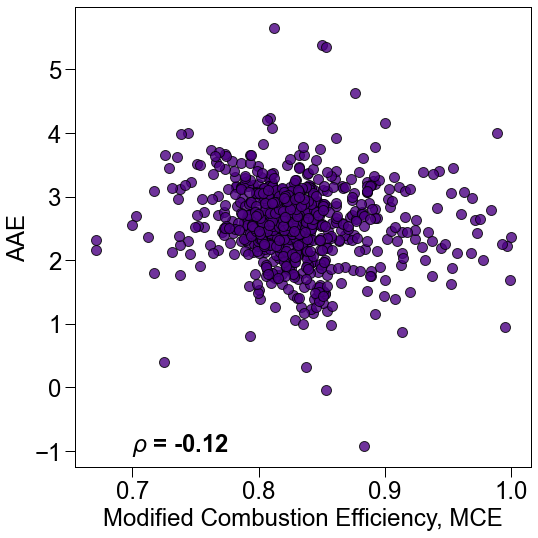

In [135]:
rho = pearson(compareC.MCE,compareC.AAE_7pt)

fig,ax=plt.subplots(figsize=(8,8))

ax.plot(compareC.MCE,compareC.AAE_7pt,'o',color='#4B0082',markeredgecolor='k',alpha=0.8)
ax.set_ylabel('AAE')
ax.set_xlabel('Modified Combustion Efficiency, MCE') 

ax.annotate(r'$\rho$ = {:.2f}'.format(rho),xy=(0.7,-1),fontweight='bold')

fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(path+'AAE_pearson_cleaned.png')

# Sampling Time Delta and Summary Stats

In [107]:
dfS['ground delta'] = dfS['end time'] - dfS['start time']
dfS

sampling location  day burn unit          start time            end time  \
0                  1    1         A 2021-04-20 11:56:00 2021-04-20 15:01:00   
1                  2    1         A 2021-04-20 16:33:00 2021-04-20 18:00:00   
2                  3    2         A 2021-04-21 11:07:00 2021-04-21 11:34:00   
3                  3    2         A 2021-04-21 11:35:00 2021-04-21 13:30:00   
4                  4    2         A 2021-04-21 13:53:00 2021-04-21 19:03:00   
5                  5    3         B 2021-04-22 11:20:00 2021-04-22 14:40:00   
6                  6    3         B 2021-04-22 15:36:00 2021-04-22 19:15:00   
7                  7    4         C 2021-04-23 10:34:00 2021-04-23 11:55:00   
8                  8    4         C 2021-04-23 12:09:00 2021-04-23 15:30:00   

         CO_e    CO2H_e          BC6         BrC_3   obs_Hz       MCE  \
0   92543.950  500958.5  674543.9245  1.234085e+06   2882.0  0.844071   
1   36673.170  170015.5  125534.2785  2.799206e+05   2525.0  0.822568   
2   13562.895   66649.5   10899.5570  9.292550e+04    990.0  0.830913   
3   44899.560  219574.5   43327.9915  2.750122e+05   4856.0  0.830231   
4  124830.100  529646.5  181468.2360  8.407021e+05  15736.0  0.809267   
5   40857.410  273463.5  137333.9830  5.342422e+05   7132.0  0.870014   
6   89331.150  340974.0   72828.8095  6.233854e+05   7448.0  0.792400   
7         NaN       NaN          NaN           NaN      NaN       NaN   
8   51572.760  240772.5   69523.5565  4.779391e+05   3473.0  0.823590   

      BC_EF    BrC_EF       AAE   AAE_std   MCE_std    ground delta  
0  1.157940  2.118463  2.034282  0.640161  0.029582 0 days 03:05:00  
1  0.618791  1.379802  1.913922  0.514252  0.040663 0 days 01:27:00  
2  0.138441  1.180299  2.913915  0.471391  0.032315 0 days 00:27:00  
3  0.166911  1.059418  2.667716  0.633409  0.025245 0 days 01:55:00  
4  0.282491  1.308719  2.502198  0.361669  0.030546 0 days 05:10:00  
5  0.445147  1.731663  2.655798  0.668718  0.050532 0 days 03:20:00  
6  0.172435  1.475973  2.982427  0.683911  0.068557 0 days 03:39:00  
7       NaN       NaN  1.153334  1.229275  0.049990 0 days 01:21:00  
8  0.242289  1.665616  2.768290  0.647156  0.080339 0 days 03:21:00

# EF evolution plots

## BC

yes
yes


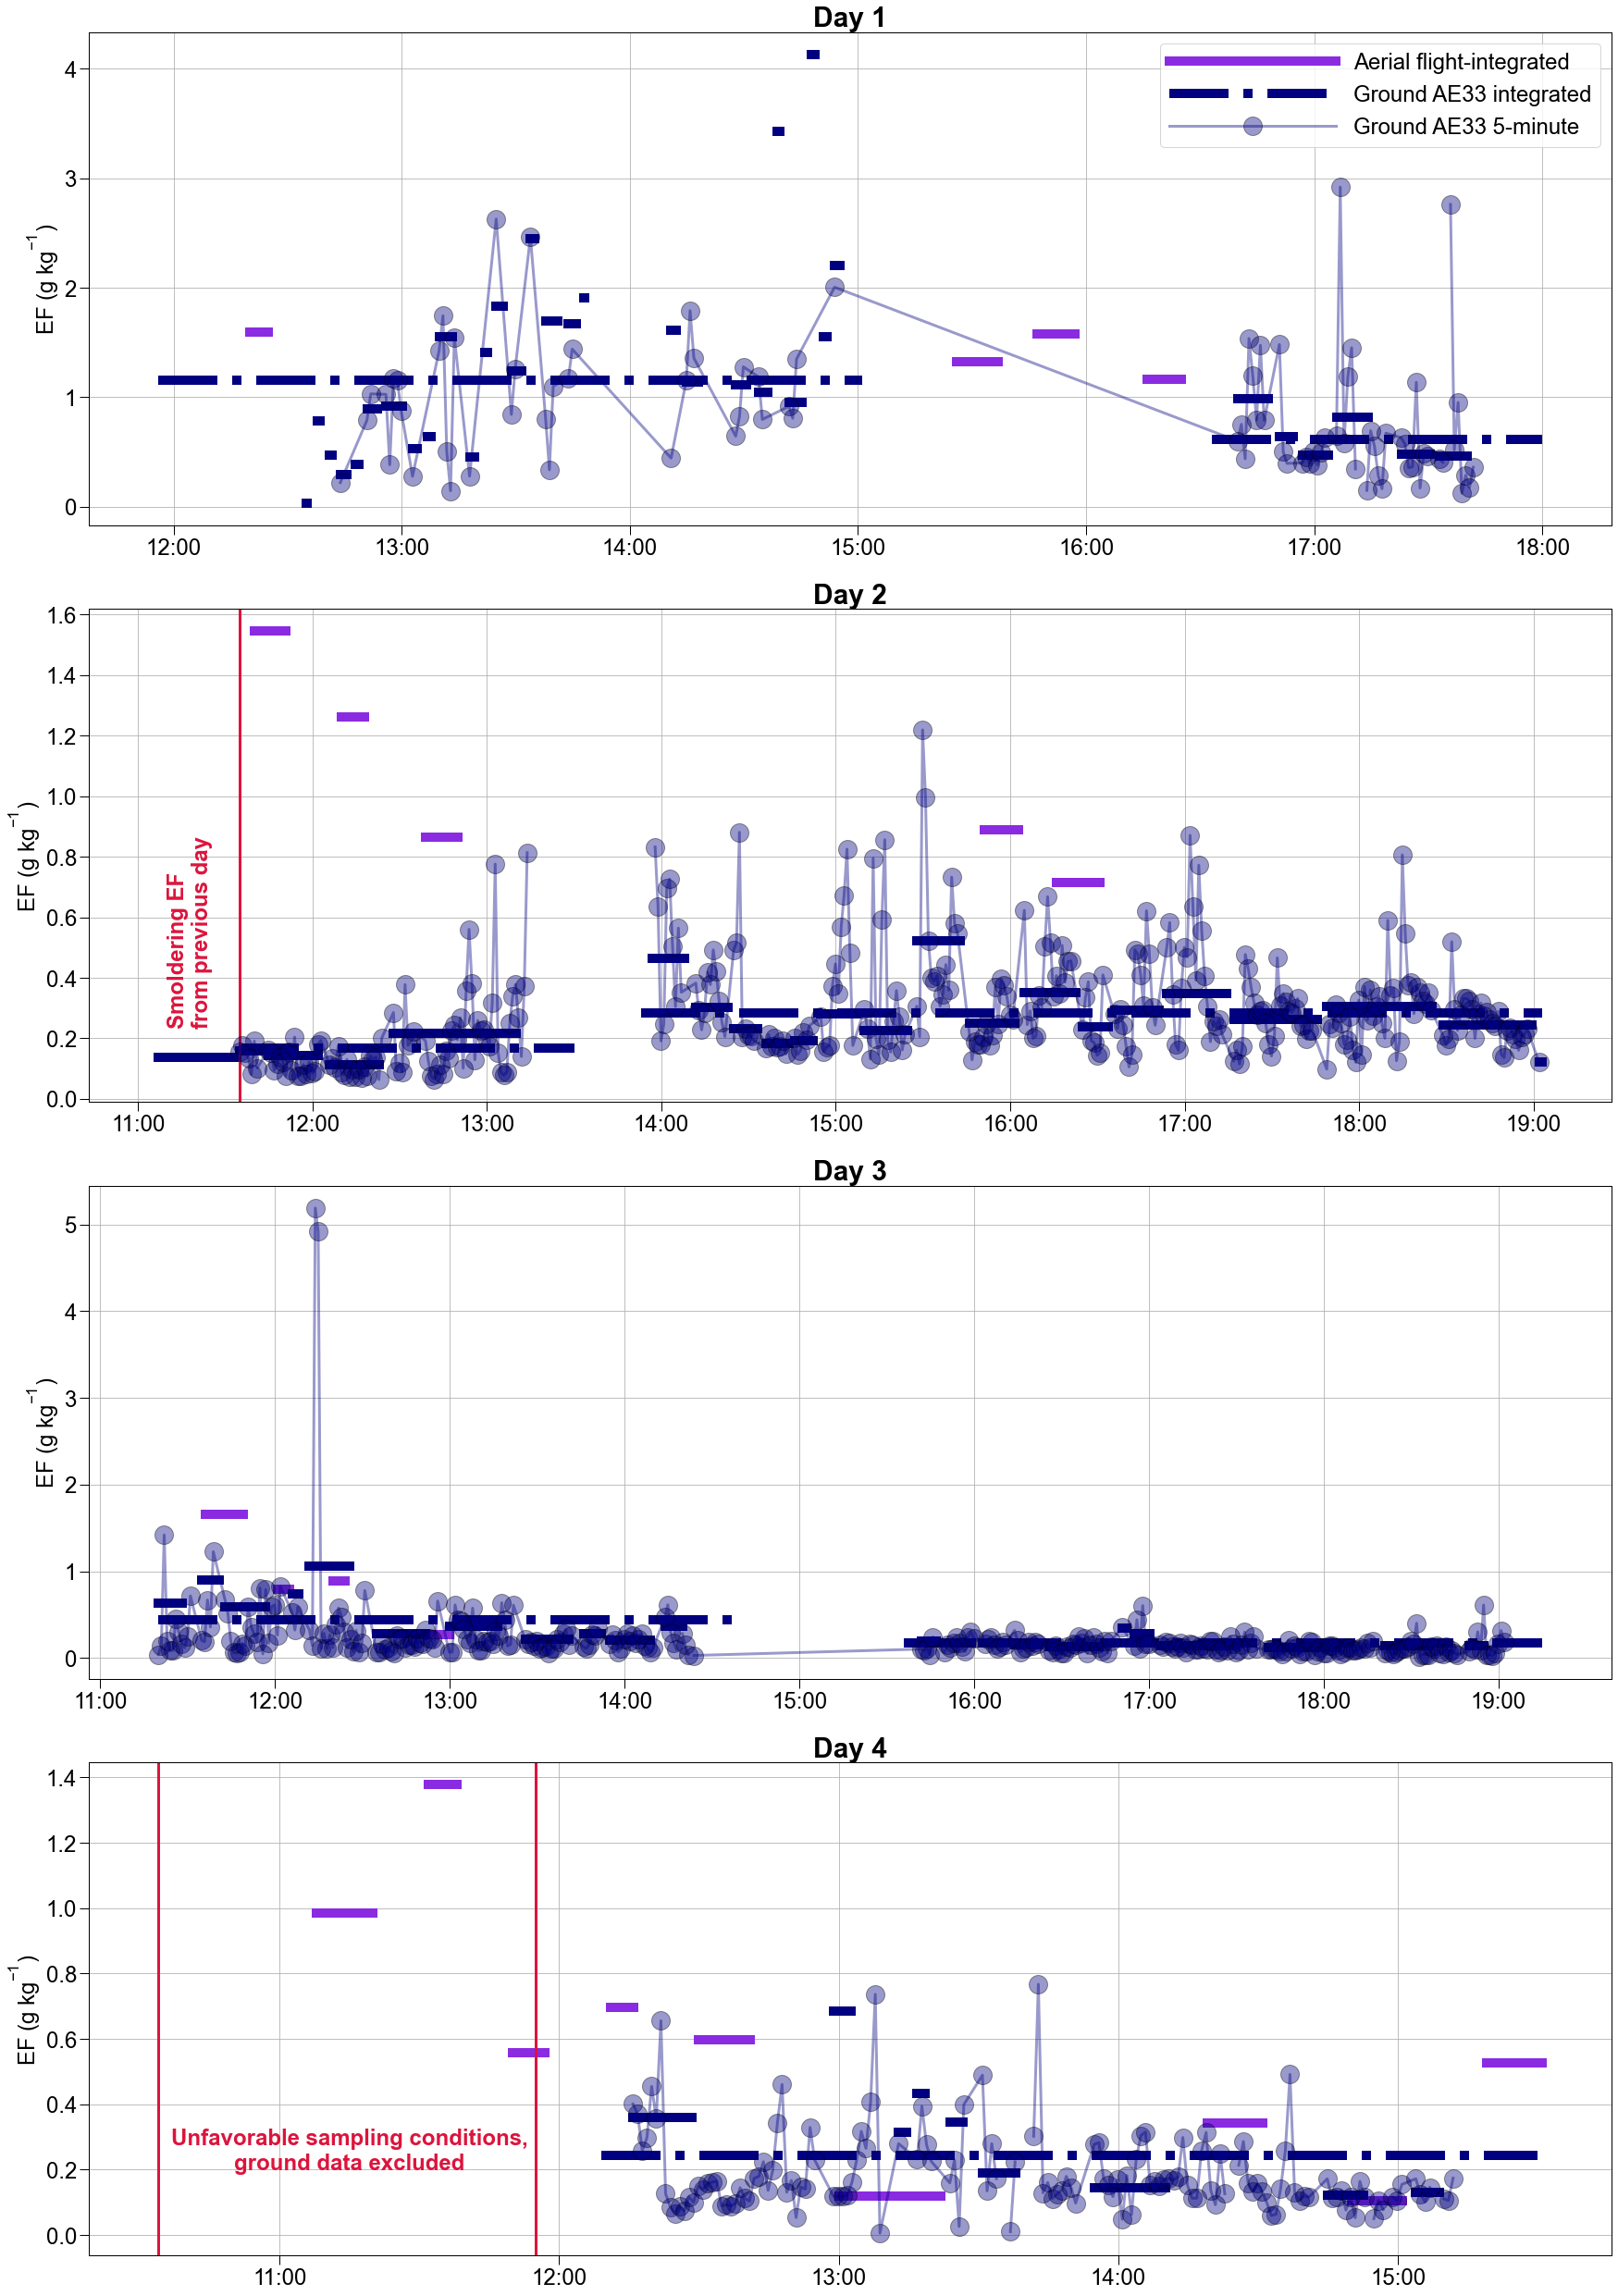

In [109]:
# ground 5-min EF by day
d1,d2,d3,d4 = getDailyDf(EF1)

# drone EF by day
dd1,dd2,dd3,dd4 = getDailyDf(drone_raw.set_index('start'))

# sampling location EF by day
dS1,dS2,dS3,dS4 = getDailyDf(dfS.set_index('start time'))

# ATN by day
ATN1,ATN2,ATN3,ATN4 = getDailyDf(EF_ATN)


timeFormat = DateFormatter('%H:%M')
fig,ax = plt.subplots(4,1,figsize=(25,35))#,sharey=True)

dfs = [d1,d2,d3,d4] # ground 5 minute
dds = [dd1,dd2,dd3,dd4] # drone EF by day
dSs = [dS1,dS2,dS3,dS4] # sampling location
ATNs = [ATN1,ATN2,ATN3,ATN4] 

# aerial by flight
k = 0
for i,df in enumerate(dds):
    for j,row in df.iterrows():
        if (i==0)&(k==0):
            ax[i].plot([row.name,row.ending],[row.BC_EF,row.BC_EF],ls='-',lw=10,color='#8A2BE2',label='Aerial flight-integrated')
            print('yes')
            k += 1
        else:
            ax[i].plot([row.name,row.ending],[row.BC_EF,row.BC_EF],ls='-',lw=10,color='#8A2BE2')

# ground by ATN
for i,df in enumerate(ATNs):
    for j,row in df.iterrows():
        #print('yes')
        ax[i].plot([j,row.ending],[row.BC_EF,row.BC_EF],ls='-',lw=10,color=BC6)
            
# # ground by samp loc
k = 0
l = 0
for i,df in enumerate(dSs):
    for j,row in df.iterrows():
        if (i==0)&(k==0):
            ax[i].plot([row.name,row['end time']],[row.BC_EF,row.BC_EF],'-.',lw=10,color=BC6,label='Ground AE33 integrated')
            #ax[i].plot([row.name,row['end time']],[row.BCabcd_EF,row.BCabcd_EF],'--',lw=10,color=abcd,label='Ground ABCD integrated')
            k+=1
            print('yes')
        elif(i==3)&(l==0): 
            l+=1
            continue
        else:
            ax[i].plot([row.name,row['end time']],[row.BC_EF,row.BC_EF],'-.',lw=10,color=BC6)
            #ax[i].plot([row.name,row['end time']],[row.BCabcd_EF,row.BCabcd_EF],'--',lw=10,color=abcd)
        
# next day smolder
ax[1].plot([dfS.loc[2,'start time'],dfS.loc[2,'end time']],[dfS.loc[2,'BC_EF'],dfS.loc[2,'BC_EF']],lw=10,color=BC6)
#ax[1].plot([dfS.loc[2,'start time'],dfS.loc[2,'end time']],[dfS.loc[2,'BCabcd_EF'],dfS.loc[2,'BCabcd_EF']],lw=10,color=abcd) (no ABCD sample)
ax[1].axvline(dfS.loc[3,'start time'],color='#DC143C')
ax[1].annotate('Smoldering EF\nfrom previous day',rotation=90,xy=(pd.to_datetime('2021-04-21 11:10:00'),0.25),fontweight='bold',color='#DC143C')

# 10 minute EF
for i,df in enumerate(dfs):
    ax[i].plot(df.BC_EF,'o-',color=BC6,label = 'Ground AE33 5-minute',ms = 20,markeredgecolor='k',alpha=0.4) # ground AE33
    #ax[i].plot(df.BCabcd_EF,'s-',color=abcd,label = 'Ground ABCD 5-minute',ms=20,markeredgecolor='k',alpha=0.7) # ground ABCD

for i in np.arange(4):
    ax[i].grid(True)
    ax[i].xaxis.set_major_formatter(timeFormat)
    ax[i].set_title('Day '+ str(i+1),fontsize=30,fontweight='bold') 
    ax[i].set_ylabel('EF (g kg$^{-1}$)')

# the legend
ax[0].legend(fontsize=24,handlelength = 7.5)
#ax[0].annotate('Aerial flight-integrated EF',xy=(pd.to_datetime('2021-04-20 12:30:00'),1.56),color='#8A2BE2',fontweight='bold')
#ax[0].annotate('Ground ABCD\nintegrated EF',xy=(pd.to_datetime('2021-04-20 15:00:00'),1.25),color=abcd,fontweight='bold',ha='right') 
#ax[0].annotate('Ground AE33\nintegrated EF',xy=(pd.to_datetime('2021-04-20 18:00:00'),0.7),color=BC6,fontweight='bold',ha='right') 
#ax[0].annotate('Ground ABCD 10-minute EF',xy=(pd.to_datetime('2021-04-20 13:05:00'),0.77),color=abcd,fontweight='bold') 
#ax[0].annotate('Ground AE33 10-minute EF',xy=(pd.to_datetime('2021-04-20 14:55:00'),0.3),color=BC6,fontweight='bold') 

## dropped sample
ax[3].axvline(dfS.loc[7,'start time'],color='#DC143C')
ax[3].axvline(dfS.loc[7,'end time'],color='#DC143C')
ax[3].annotate('Unfavorable sampling conditions,\nground data excluded',xy=(pd.to_datetime('2021-04-23 11:15:00'),0.2),
               fontsize = 24,fontweight='bold',color='#DC143C',ha='center')

fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(path+'BC_evolution.png')

## BrC

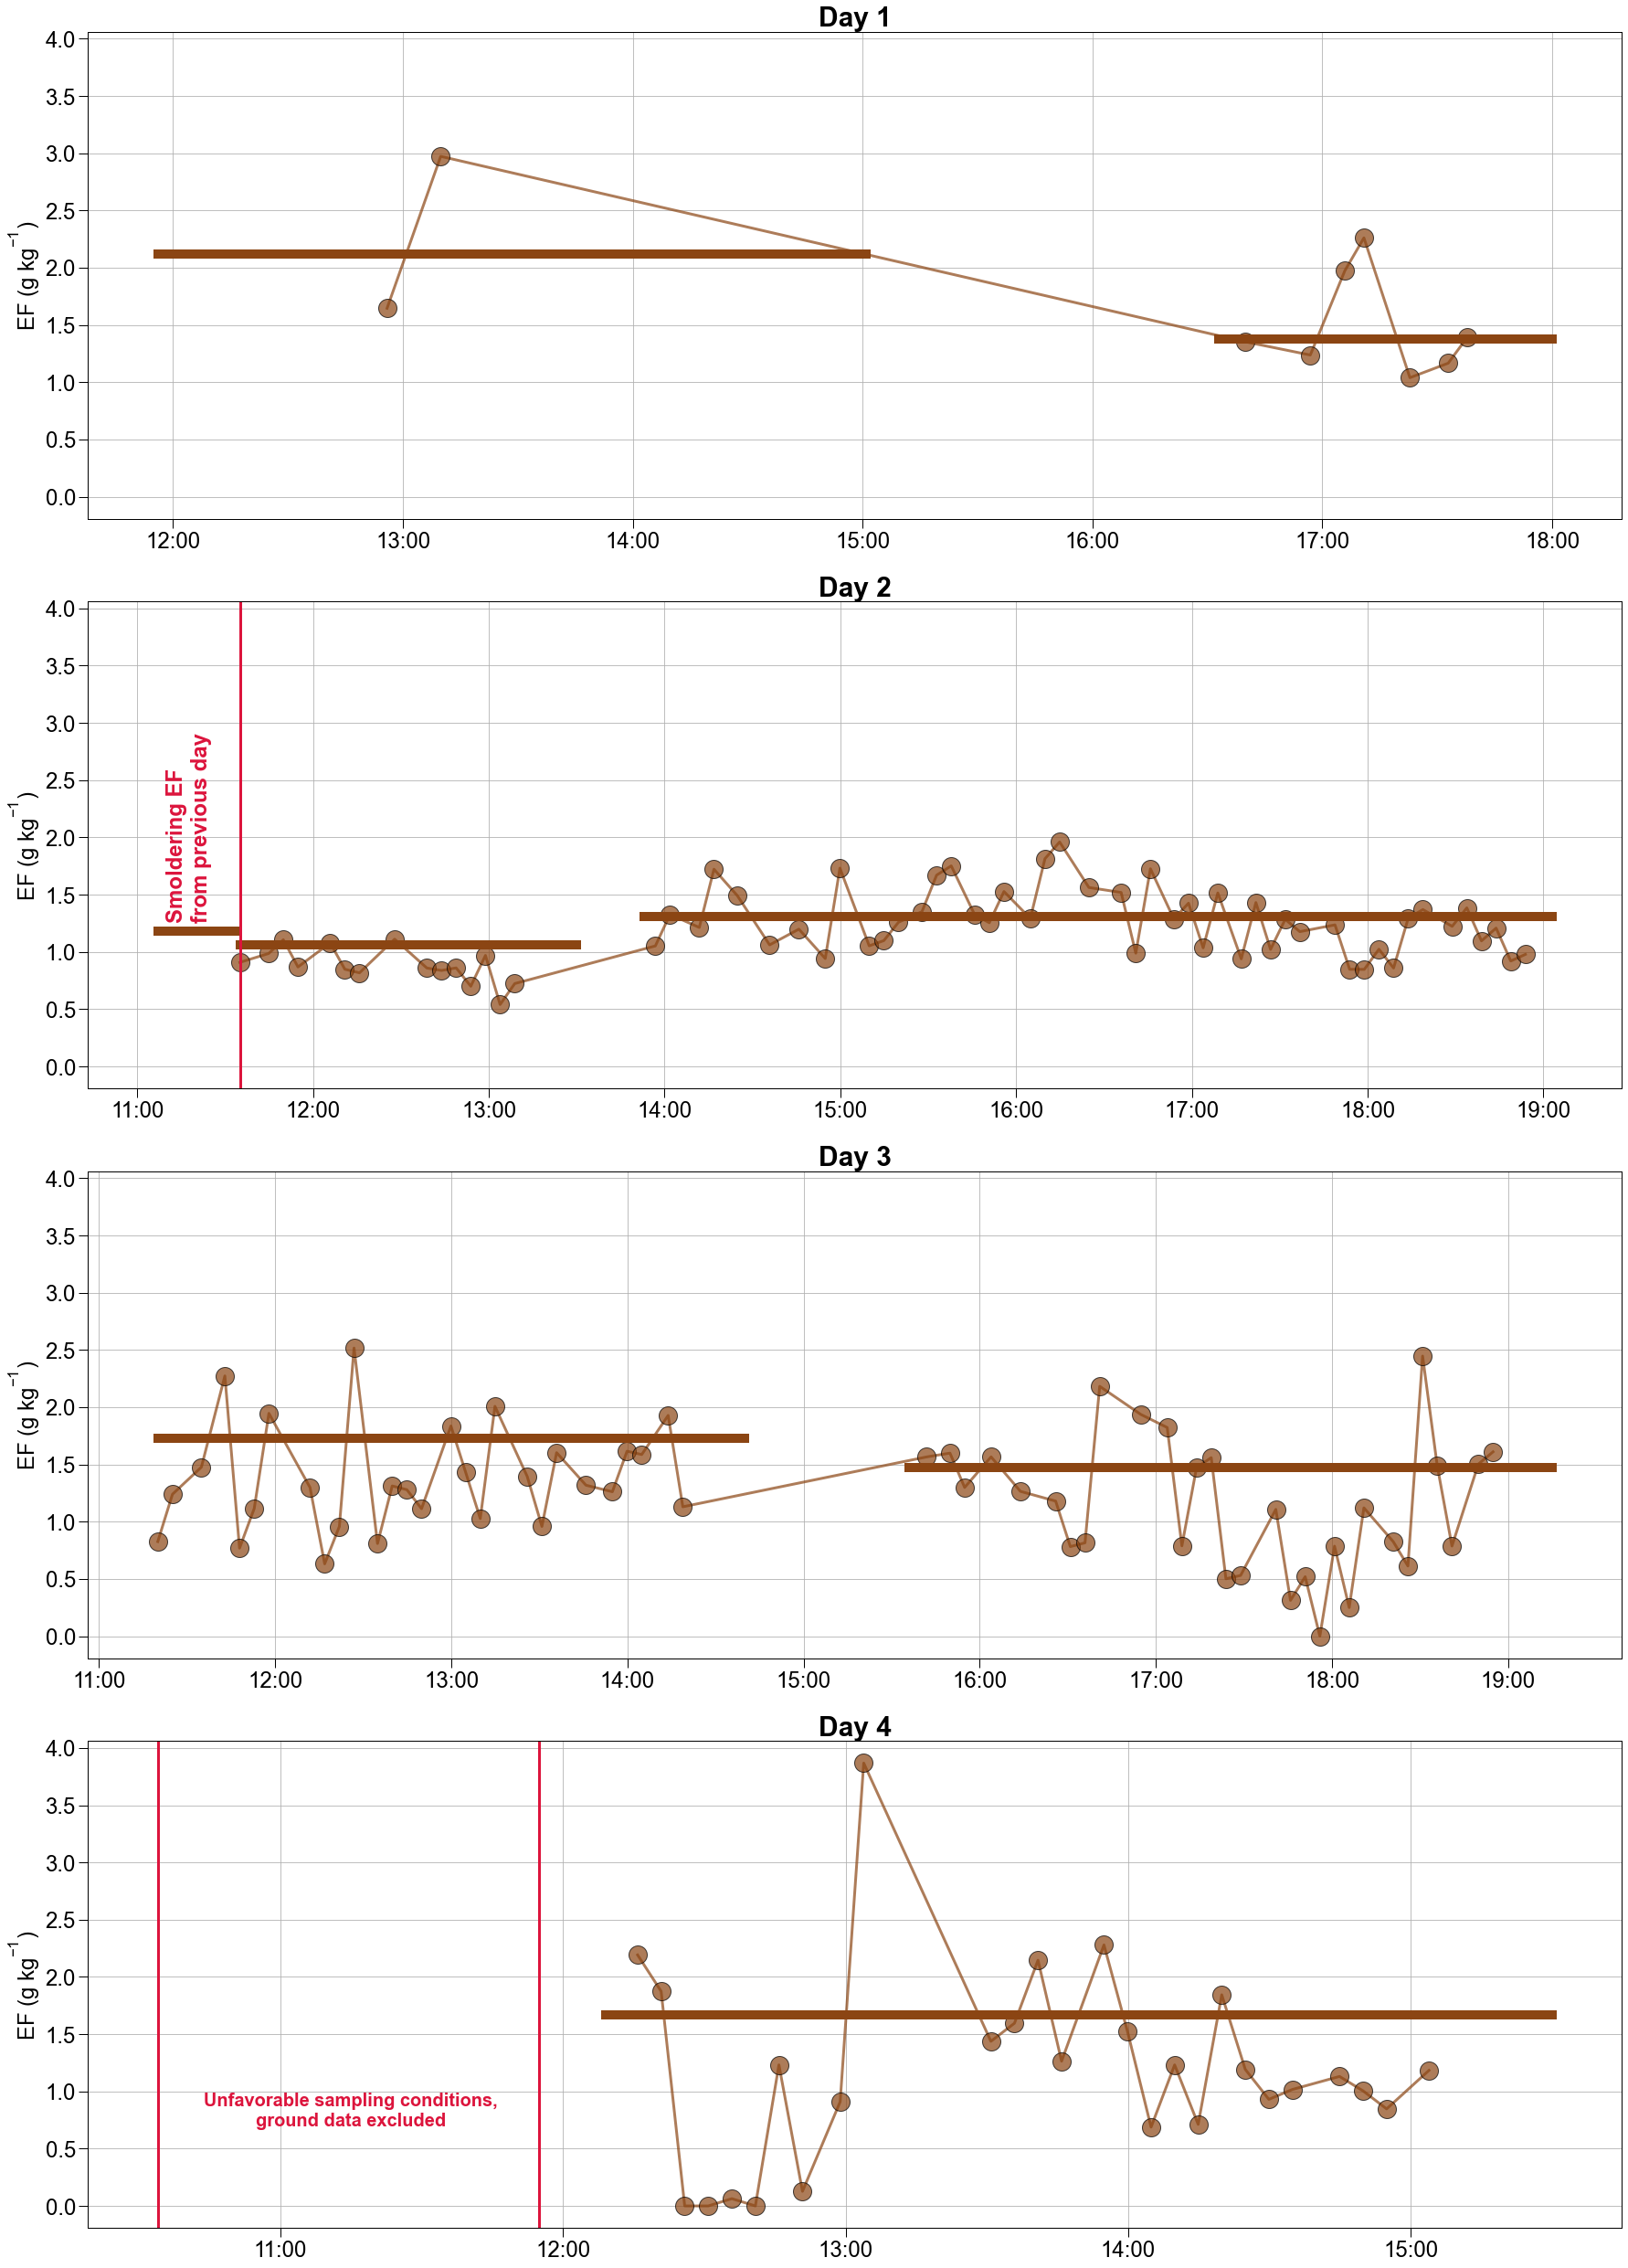

In [110]:
timeFormat = DateFormatter('%H:%M')
fig,ax = plt.subplots(4,1,figsize=(25,35),sharey=True)

for i in np.arange(4):
    ax[i].grid(True)
    ax[i].xaxis.set_major_formatter(timeFormat)
    ax[i].set_title('Day '+ str(i+1),fontsize=30,fontweight='bold') 
    ax[i].set_ylabel('EF (g kg$^{-1}$)')
    
# ground 10-min EF by day
d1,d2,d3,d4 = getDailyDf(EF5)

# sampling location EF by day
dS1,dS2,dS3,dS4 = getDailyDf(dfS.set_index('start time'))

dfs = [d1,d2,d3,d4]
dSs = [dS1,dS2,dS3,dS4]

# 10 minute EF
for i,df in enumerate(dfs):
    ax[i].plot(df.BrC_EF,'o-',color=brc,label = 'Ground (AE33)',ms = 20,markeredgecolor='k',alpha=0.7) # ground AE33
    
# ground by samp loc
l=0
for i,df in enumerate(dSs):
    for j,row in df.iterrows():
        if (i==3)&(l==0): 
            l+=1
            continue
        else:
            ax[i].plot([row.name,row['end time']],[row.BrC_EF,row.BrC_EF],'-',lw=10,color=brc)
    
            
    
# next day smolder
ax[1].plot([dfS.loc[2,'start time'],dfS.loc[2,'end time']],[dfS.loc[2,'BrC_EF'],dfS.loc[2,'BrC_EF']],lw=10,color=brc)
#ax[1].plot([dfS.loc[2,'start time'],dfS.loc[2,'end time']],[dfS.loc[2,'BCabcd_EF'],dfS.loc[2,'BCabcd_EF']],lw=10,color=abcd) (no ABCD sample)
ax[1].axvline(dfS.loc[3,'start time'],color='#DC143C')
ax[1].annotate('Smoldering EF\nfrom previous day',rotation=90,xy=(pd.to_datetime('2021-04-21 11:10:00'),1.3),fontweight='bold',color='#DC143C')


# dropped sample
ax[3].axvline(dfS.loc[7,'start time'],color='#DC143C')
ax[3].axvline(dfS.loc[7,'end time'],color='#DC143C')
ax[3].annotate('Unfavorable sampling conditions,\nground data excluded',xy=(pd.to_datetime('2021-04-23 11:15:00'),0.7),
               fontsize = 20,fontweight='bold',color='#DC143C',ha='center')

fig.tight_layout()
path='/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/plots/'
#fig.savefig(path+'BrC_evolution.png')

# Rank Order Plots Subsample Emission Factors

In [111]:
from scipy.stats import norm

def rankOrder(df,column):
    dfr = df[[column]]
    dfr = dfr.sort_values(by=column,ascending=True) # sort the EFs
    dfr['rank'] = range(1,len(dfr)+1) # rank order
    dfr['perRank'] = (dfr['rank'] - 0.5) / len(dfr)
    dfr['z_score'] = norm.ppf(dfr['perRank'])
    return dfr

def find_nearest_z_score(df, bc_ef_value):
    # Calculate the absolute difference between the given BC_EF and all BC_EF values
    df['diff'] = abs(df['BC_EF'] - bc_ef_value)
    
    # Find the row with the smallest difference
    nearest_row = df.loc[df['diff'].idxmin()]
    
    # Return the z_score from the nearest row
    return nearest_row['z_score']

## Black Carbon

In [112]:
EF1r = rankOrder(EF1,'BC_EF')
EF5r = rankOrder(EF5,'BC_EF')
EF10r = rankOrder(EF10,'BC_EF')
EF_ATNr = rankOrder(EF_ATN,'BC_EF')
droneR = rankOrder(drone,'BC_EF')

1-minute 0.30016350830858085
5-minute 0.29899191687441223
10-minute 0.31062371956701323
Attenuation
Cycle 0.6479308015759764


/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_7771/1407275706.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks())


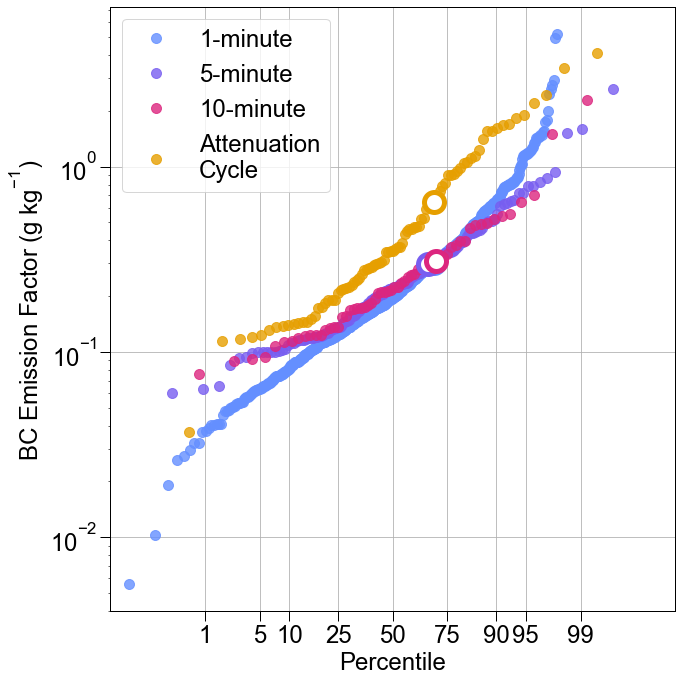

In [114]:
fig,ax = plt.subplots(figsize=(10,10))

dfs = [EF1r,EF5r,EF10r,EF_ATNr,droneR]
labels = ['1-minute','5-minute','10-minute','Attenuation\nCycle']

colors = ['#648FFF','#785EF0','#DC267F','#E69F00']
for i,df in enumerate(dfs[:-1]):
    ax.plot(df.z_score,df.BC_EF,'o',label = labels[i],alpha=0.8,ms=10,color=colors[i])
    
    avg = df.describe().loc['mean','BC_EF']
    z_avg = find_nearest_z_score(df,avg)
    ax.plot(z_avg,avg,'o',color='white',markeredgecolor=colors[i],ms=20,zorder=10,mew=5)
    print(labels[i],avg)
    
ax.set_xlim([-3.5,3.5])
ax.set_yticklabels(ax.get_yticks())

percents = [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]
z_scores = norm.ppf(percents)
xticks = ['1','5','10','25','50','75','90','95','99']

ax.set_xticks(z_scores)
ax.set_xticklabels(xticks)
ax.set_yscale('log')

ax.legend(loc='upper left')
ax.grid(True)
ax.set_xlabel('Percentile')
ax.set_ylabel('BC Emission Factor (g kg$^{-1}$)')

fig.tight_layout()
path = '/Users/jdabutler/Library/Mobile Documents/com~apple~CloudDocs/Documents/_CURRENT WORK/_ch 1/plots_shortcut/'
fig.savefig(path+'timeBasis.png')

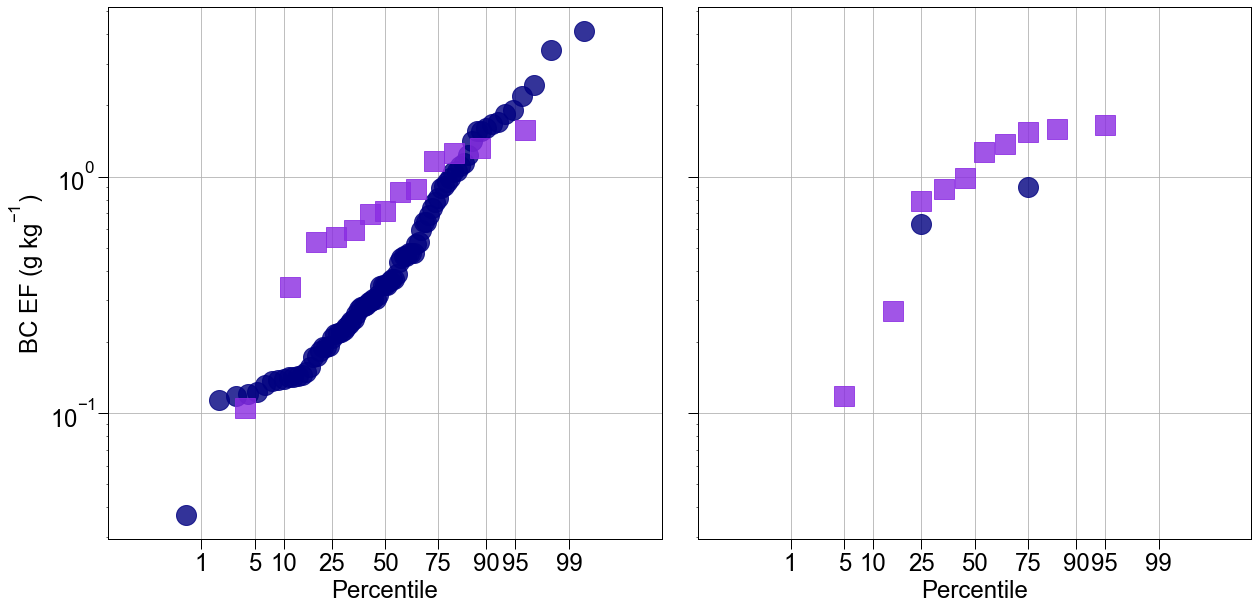

In [117]:
control = True

if control ==True:
    ATN_sm = rankOrder(EF_ATN.loc[EF_ATN.MCE<0.9],'BC_EF')
    ATN_fl = rankOrder(EF_ATN.loc[EF_ATN.MCE>0.9],'BC_EF')
else:
    ATN_sm = rankOrder(EF5.loc[EF5.MCE<0.9],'BC_EF')
    ATN_fl = rankOrder(EF5.loc[EF5.MCE>0.9],'BC_EF')

drone_sm = rankOrder(drone.loc[drone.MCE<0.9],'BC_EF')
drone_fl = rankOrder(drone.loc[drone.MCE>0.9],'BC_EF')

fig,ax = plt.subplots(1,2,figsize=(18,9),sharey=True)

dfs = [ATN_sm,drone_sm,ATN_fl,drone_fl]
fcolors = [BC6,aerial,BC6,aerial]
labels = ['Ground Smolder','Aerial Smolder','Ground Flaming','Aerial Flaming']
markSize = 20
for i,df in enumerate(dfs):
    if i==0:
        ax[0].plot(df.z_score,df.BC_EF,'o',label = labels[i],alpha=0.8,ms=markSize,color=fcolors[i])
    elif i==1:
        ax[0].plot(df.z_score,df.BC_EF,'s',label = labels[i],alpha=0.8,ms=markSize,color=fcolors[i])
    elif i==2:
        ax[1].plot(df.z_score,df.BC_EF,'o',label = labels[i],alpha=0.8,ms=markSize,color=fcolors[i])
    else:
        ax[1].plot(df.z_score,df.BC_EF,'s',label = labels[i],alpha=0.8,ms=markSize,color=fcolors[i])

percents = [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]
z_scores = norm.ppf(percents)
xticks = ['1','5','10','25','50','75','90','95','99']

for j in range(2):
    ax[j].set_xticks(z_scores)
    ax[j].set_xticklabels(xticks)
    ax[j].set_yscale('log')
    ax[j].set_xlim([-3.5,3.5])
    #ax[j].legend(loc='upper left')
    ax[j].grid(True)
    ax[j].set_xlabel('Percentile')
    
ax[0].set_ylabel('BC EF (g kg$^{-1}$)')

fig.tight_layout()

## MCE

Text(0, 0.5, 'MCE')

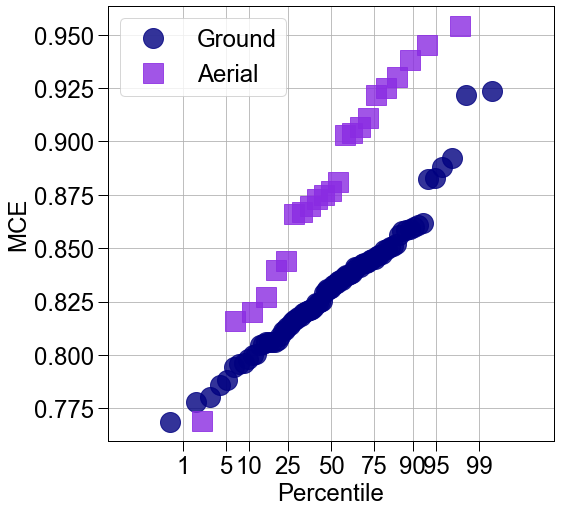

In [118]:
gMCE = rankOrder(EF_ATN,'MCE')
aMCE = rankOrder(drone,'MCE')

fig,ax = plt.subplots(figsize=(8,8))

markSize = 20
ax.plot(gMCE.z_score,gMCE.MCE,'o',label = 'Ground',alpha=0.8,ms=markSize,color=BC6)
ax.plot(aMCE.z_score,aMCE.MCE,'s',label = 'Aerial',alpha=0.8,ms=markSize,color=aerial)
    
ax.set_xlim([-3.5,3.5])

percents = [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]
z_scores = norm.ppf(percents)
xticks = ['1','5','10','25','50','75','90','95','99']

ax.set_xticks(z_scores)
ax.set_xticklabels(xticks)
#ax.set_yscale('log')

ax.legend(loc='upper left')
ax.grid(True)
ax.set_xlabel('Percentile')
ax.set_ylabel('MCE')

# Save DataFrames as CSVs

In [127]:
path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_EF datasets/'
#dfS.to_csv(path+'SampLoc_BC-BrC_EFs.csv')